<ipython-input-179-2b5aac4805db>:4: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  violations_df = pd.read_csv(file_path)


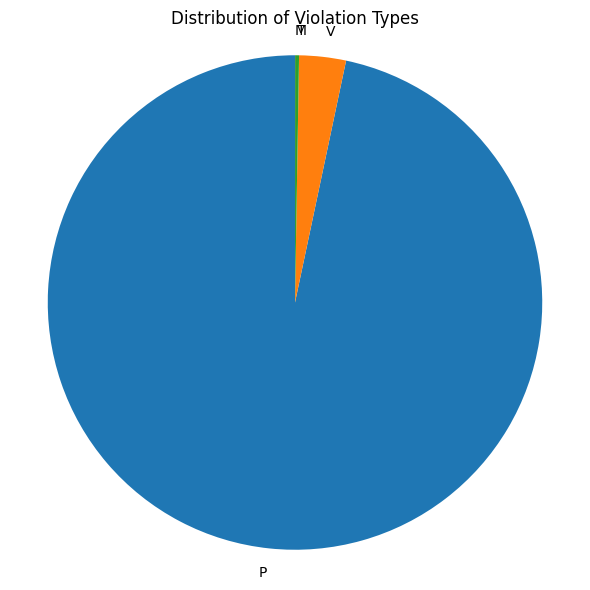

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/Parking_Violations_Issued_in_September_2024.csv'
violations_df = pd.read_csv(file_path)

violation_counts = violations_df['VIOLATION_TYPE_DESC'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(violation_counts, labels=violation_counts.index, startangle=90, textprops={'fontsize': 10})
plt.title('Distribution of Violation Types')
plt.axis('equal')

plt.tight_layout()
plt.show()

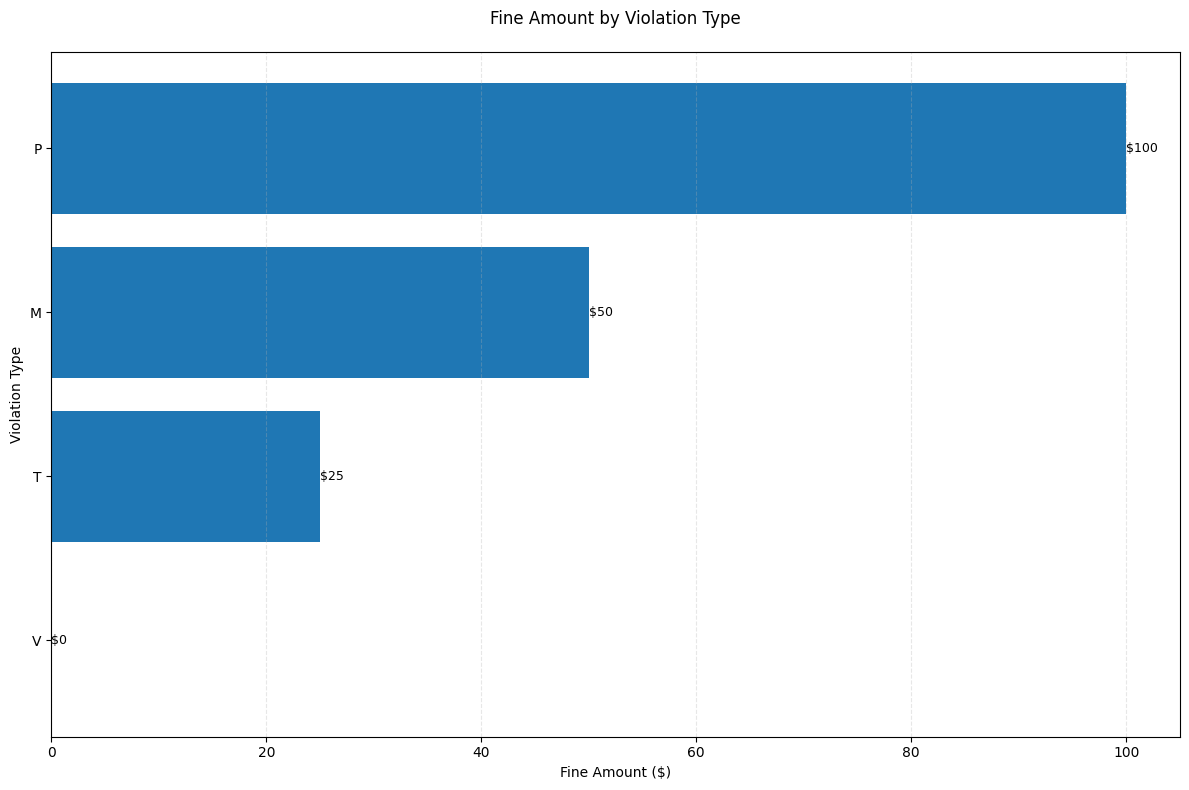

In [177]:
violation_fines = violations_df.groupby('VIOLATION_TYPE_DESC')['FINE_AMOUNT'].first().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(violation_fines.index, violation_fines.values)

plt.title('Fine Amount by Violation Type', fontsize=12, pad=20)
plt.xlabel('Fine Amount ($)', fontsize=10)
plt.ylabel('Violation Type', fontsize=10)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'${int(width)}',
             ha='left', va='center', fontsize=9)
plt.tight_layout()

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


<ipython-input-114-c344863a4ff8>:5: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  violations_df = pd.read_csv(file_path)


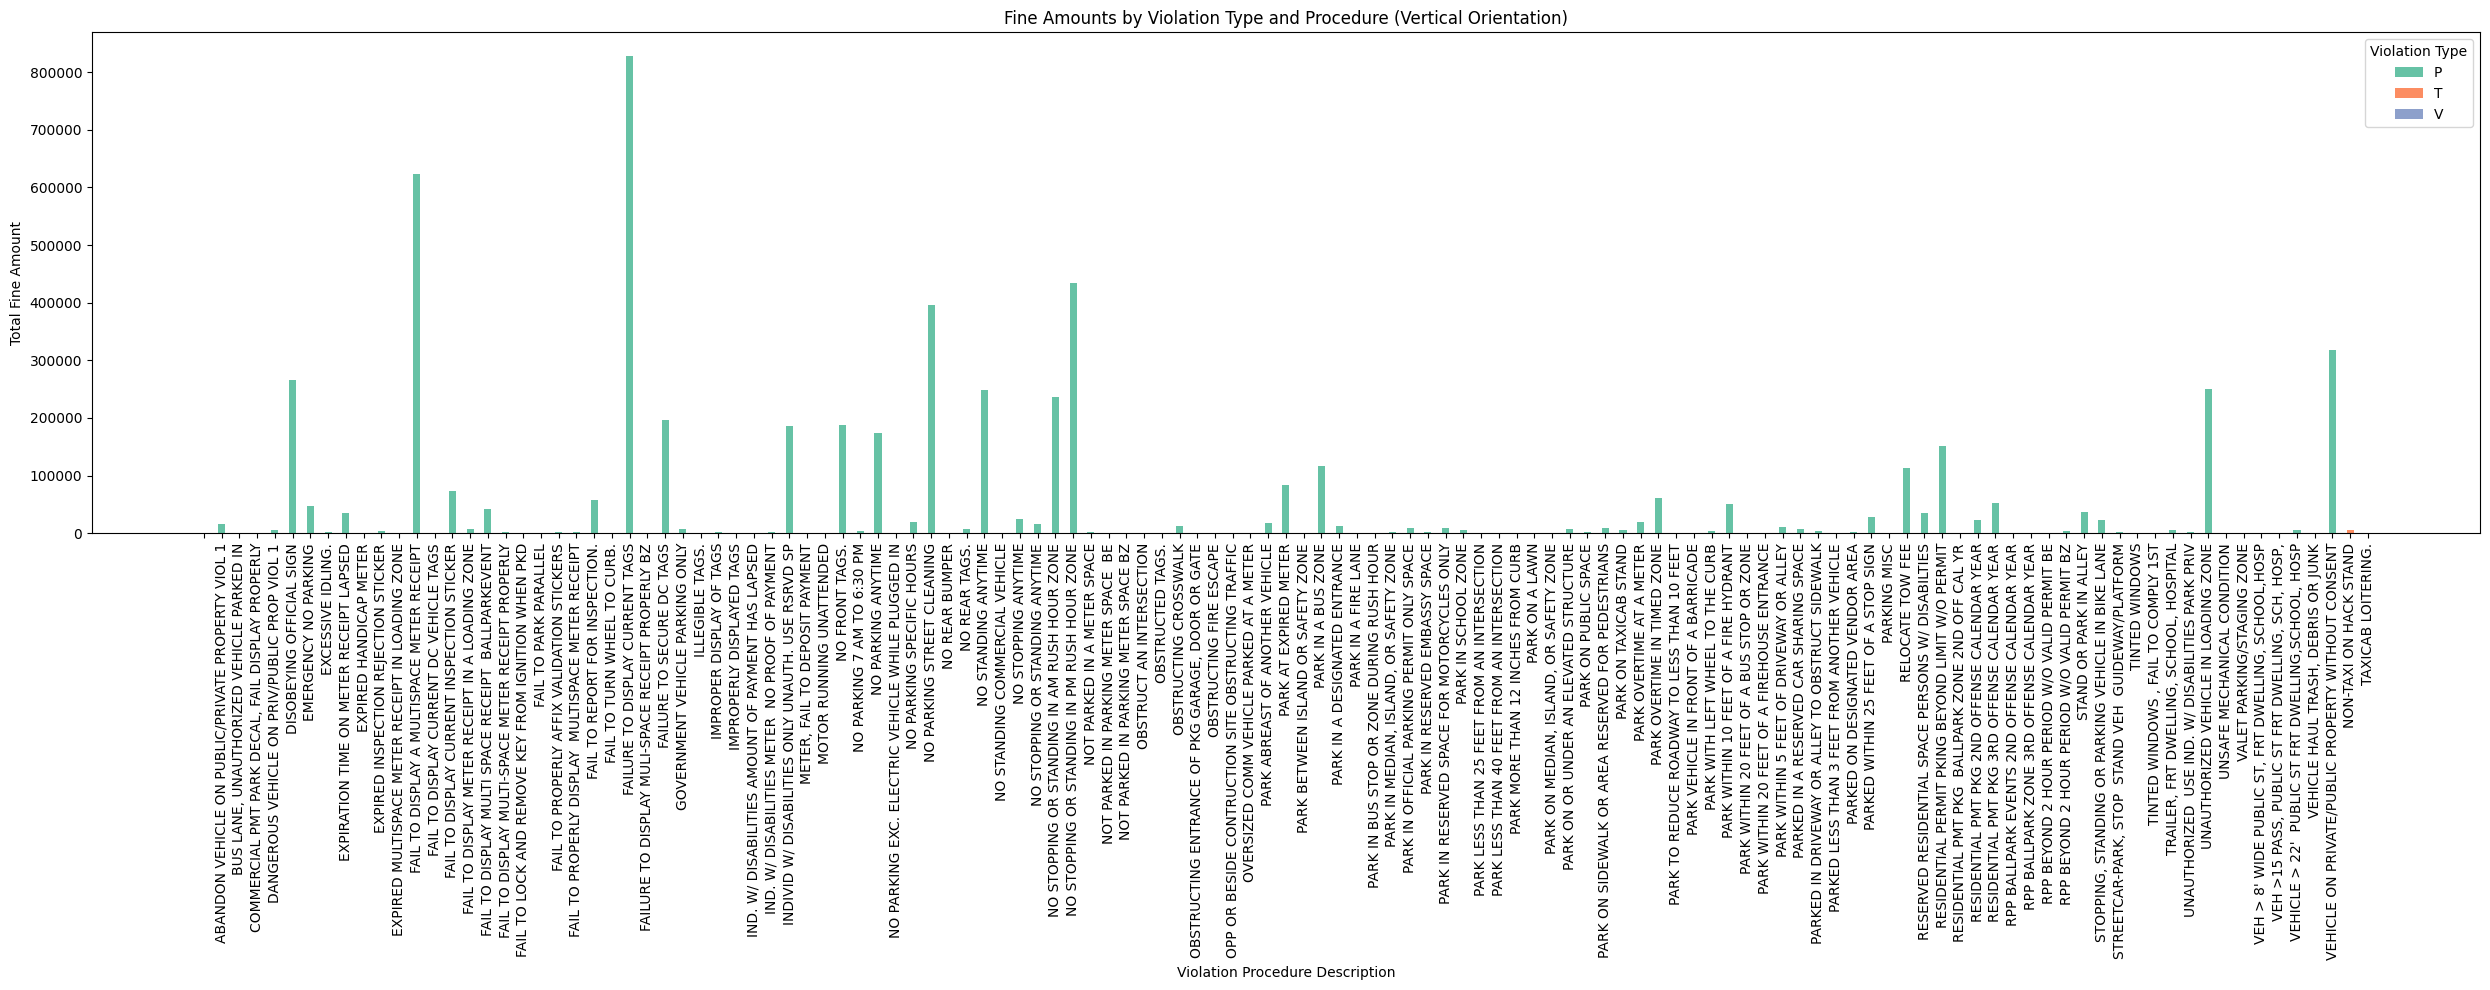

In [114]:
# Plot Total Fine Amounts by Violation Type and Procedure Description
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/Parking_Violations_Issued_in_September_2024.csv'
violations_df = pd.read_csv(file_path)
violations_filtered = violations_df[['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC', 'FINE_AMOUNT']].dropna(subset=['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC', 'FINE_AMOUNT'])
violations_filtered['FINE_AMOUNT'] = pd.to_numeric(violations_filtered['FINE_AMOUNT'], errors='coerce')
violations_filtered = violations_filtered.dropna(subset=['FINE_AMOUNT'])
violation_summary = violations_filtered.groupby(['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC'])['FINE_AMOUNT'].sum().reset_index()
violation_types = violation_summary['VIOLATION_TYPE_DESC'].unique()
colors = plt.get_cmap("Set2")(range(len(violation_types)))

plt.figure(figsize=(25, 10))
bar_width = 0.4
positions = range(len(violation_summary))

for i, v_type in enumerate(violation_types):
    type_data = violation_summary[violation_summary['VIOLATION_TYPE_DESC'] == v_type]
    plt.bar(
        x=type_data['VIOLATION_PROC_DESC'],
        height=type_data['FINE_AMOUNT'],
        width=bar_width,
        label=v_type,
        color=colors[i]
    )
plt.title("Fine Amounts by Violation Type and Procedure (Vertical Orientation)")
plt.xlabel("Violation Procedure Description")
plt.ylabel("Total Fine Amount")
plt.xticks(rotation=90)
plt.legend(title='Violation Type', loc='upper right')
plt.tight_layout()
plt.show()

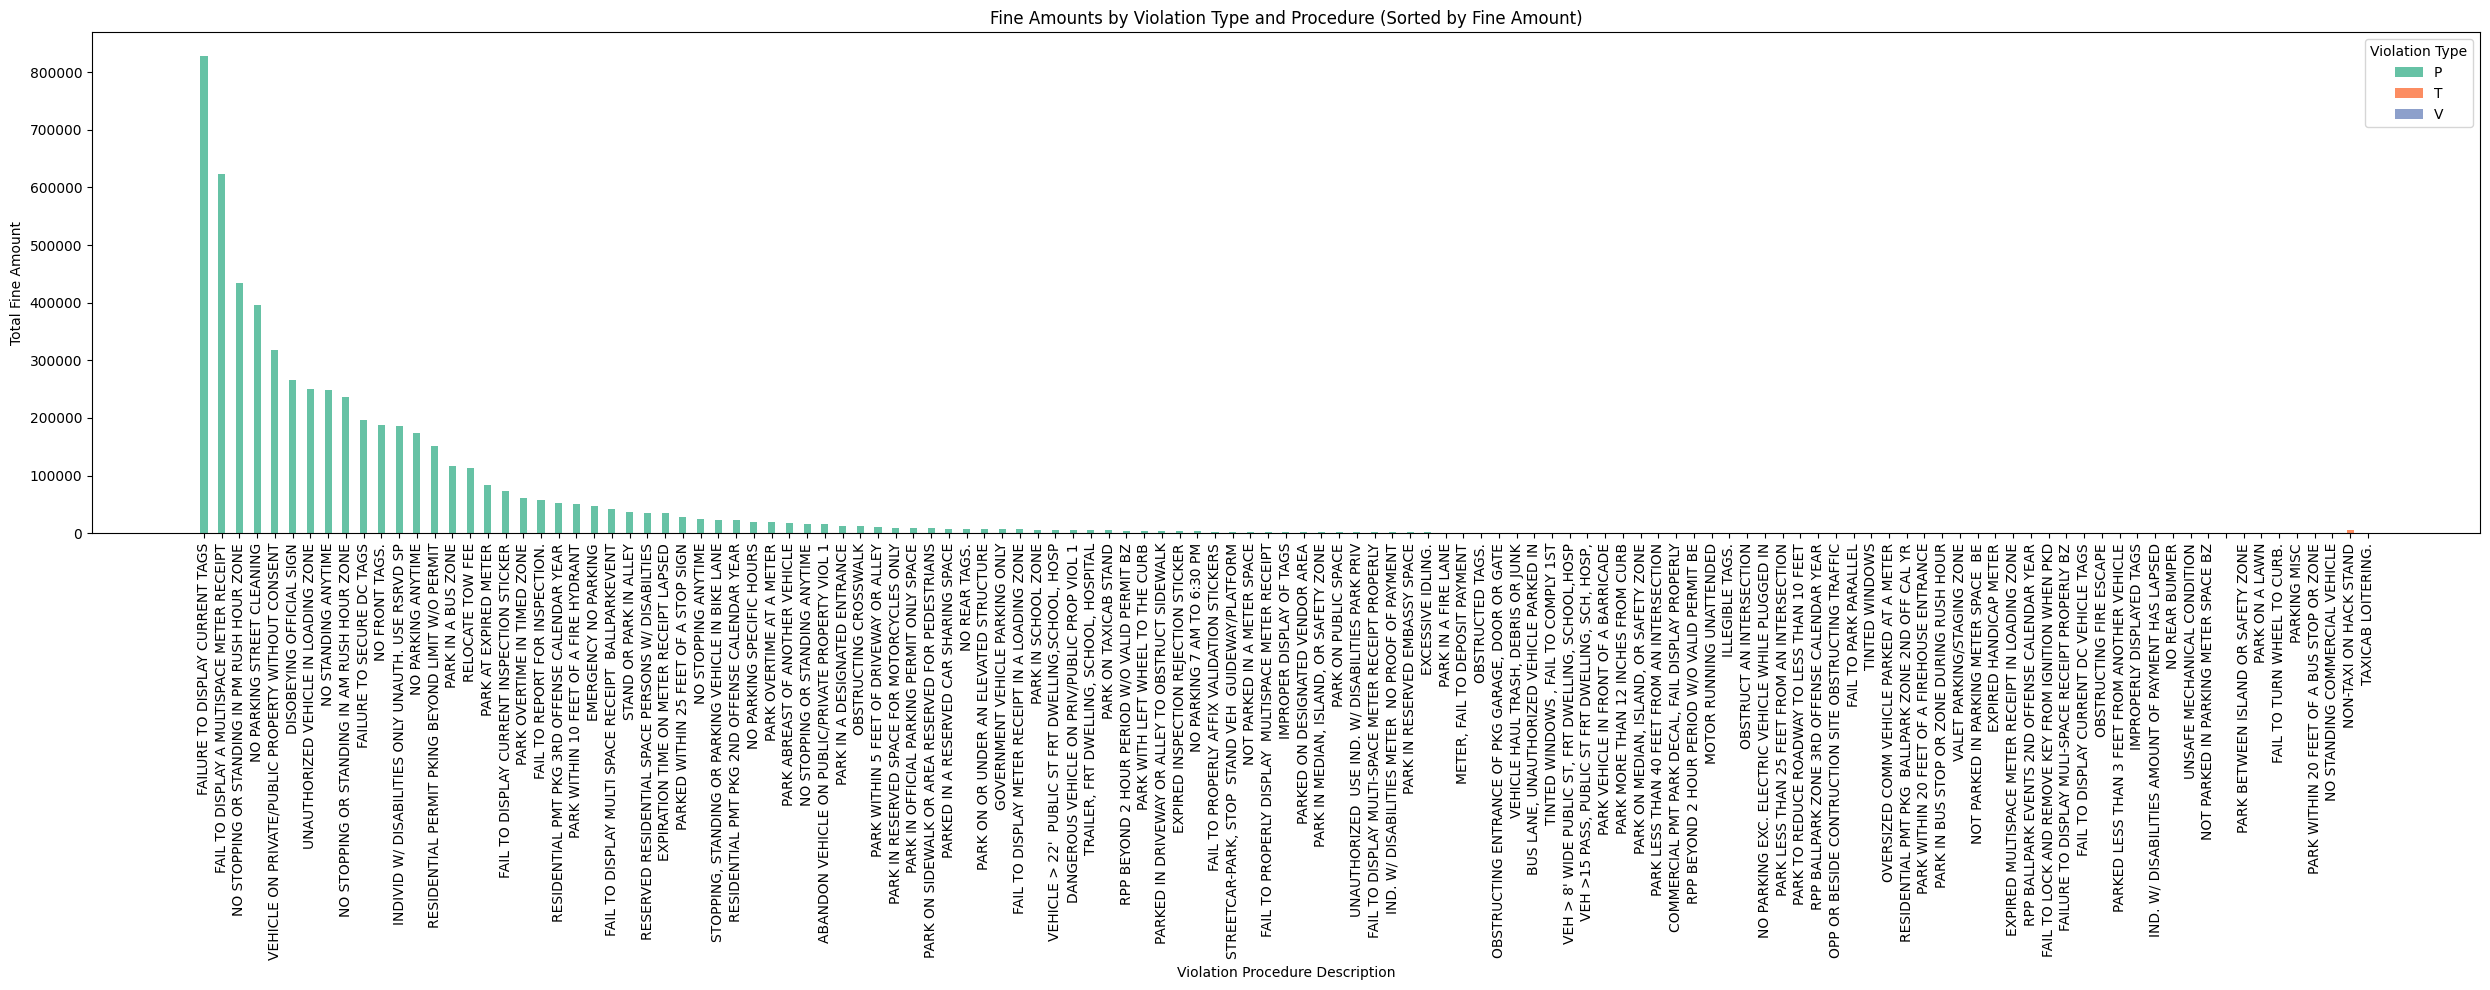

In [115]:
# Plot Fine Amounts by Violation Type and Procedure Description (Sorted)

violations_filtered = violations_df[['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC', 'FINE_AMOUNT']].dropna(subset=['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC', 'FINE_AMOUNT'])
violations_filtered['FINE_AMOUNT'] = pd.to_numeric(violations_filtered['FINE_AMOUNT'], errors='coerce')
violations_filtered = violations_filtered.dropna(subset=['FINE_AMOUNT'])

violation_summary = violations_filtered.groupby(['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC'])['FINE_AMOUNT'].sum().reset_index()
violation_summary = violation_summary.sort_values(by='FINE_AMOUNT', ascending=False)

violation_types = violation_summary['VIOLATION_TYPE_DESC'].unique()
colors = plt.get_cmap("Set2")(range(len(violation_types)))
bar_width = 0.4

plt.figure(figsize=(25, 10))
for i, v_type in enumerate(violation_types):
    type_data = violation_summary[violation_summary['VIOLATION_TYPE_DESC'] == v_type]
    plt.bar(
        x=type_data['VIOLATION_PROC_DESC'],
        height=type_data['FINE_AMOUNT'],
        width=bar_width,
        label=v_type,
        color=colors[i]
    )
plt.title("Fine Amounts by Violation Type and Procedure (Sorted by Fine Amount)")
plt.xlabel("Violation Procedure Description")
plt.ylabel("Total Fine Amount")
plt.xticks(rotation=90)
plt.legend(title='Violation Type', loc='upper right')
plt.tight_layout()
plt.show()

In [116]:
violations_df['VIOLATION_TYPE_DESC'].unique()

array(['P', 'V', 'M', 'T'], dtype=object)

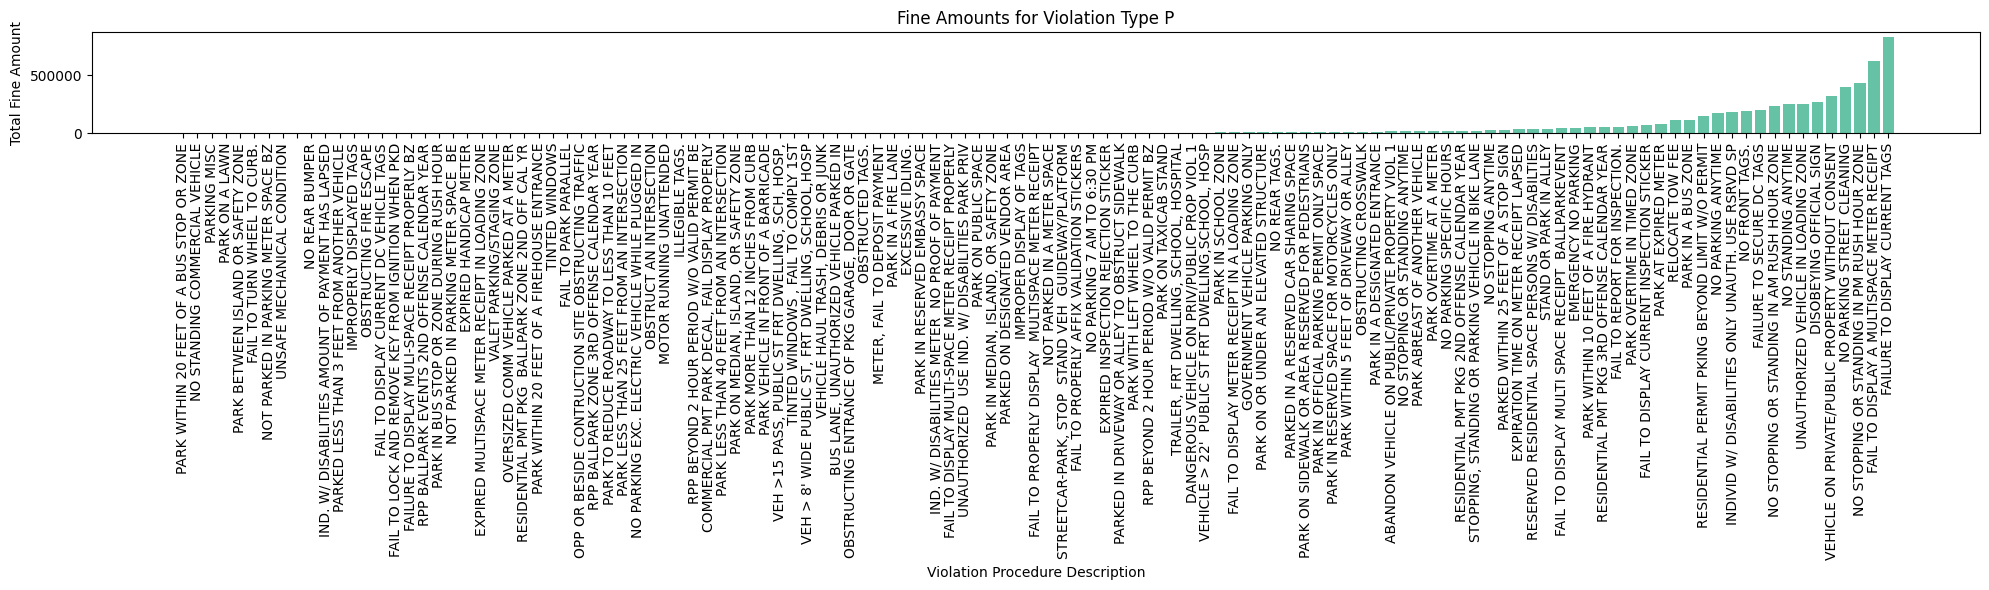

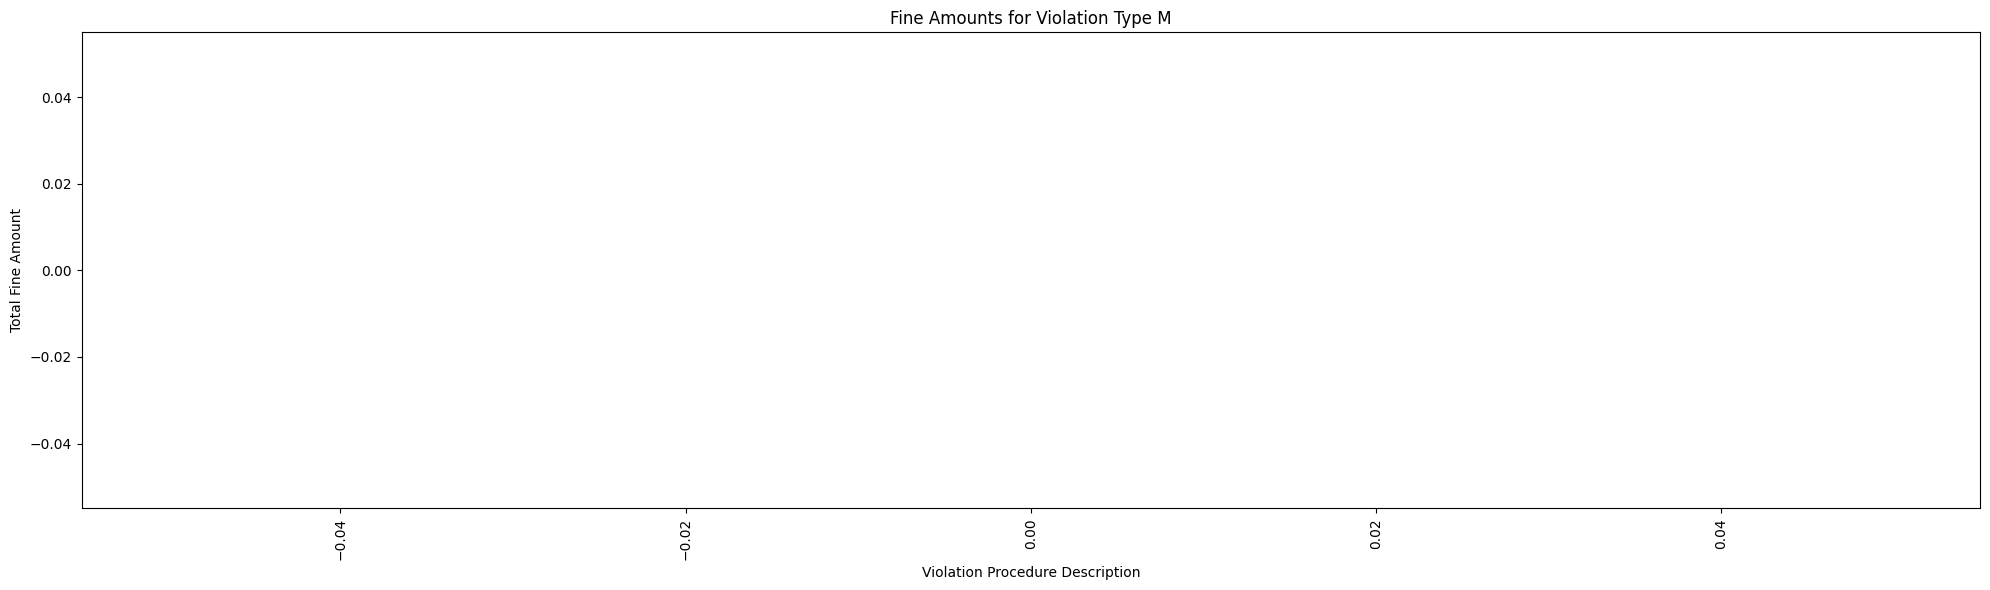

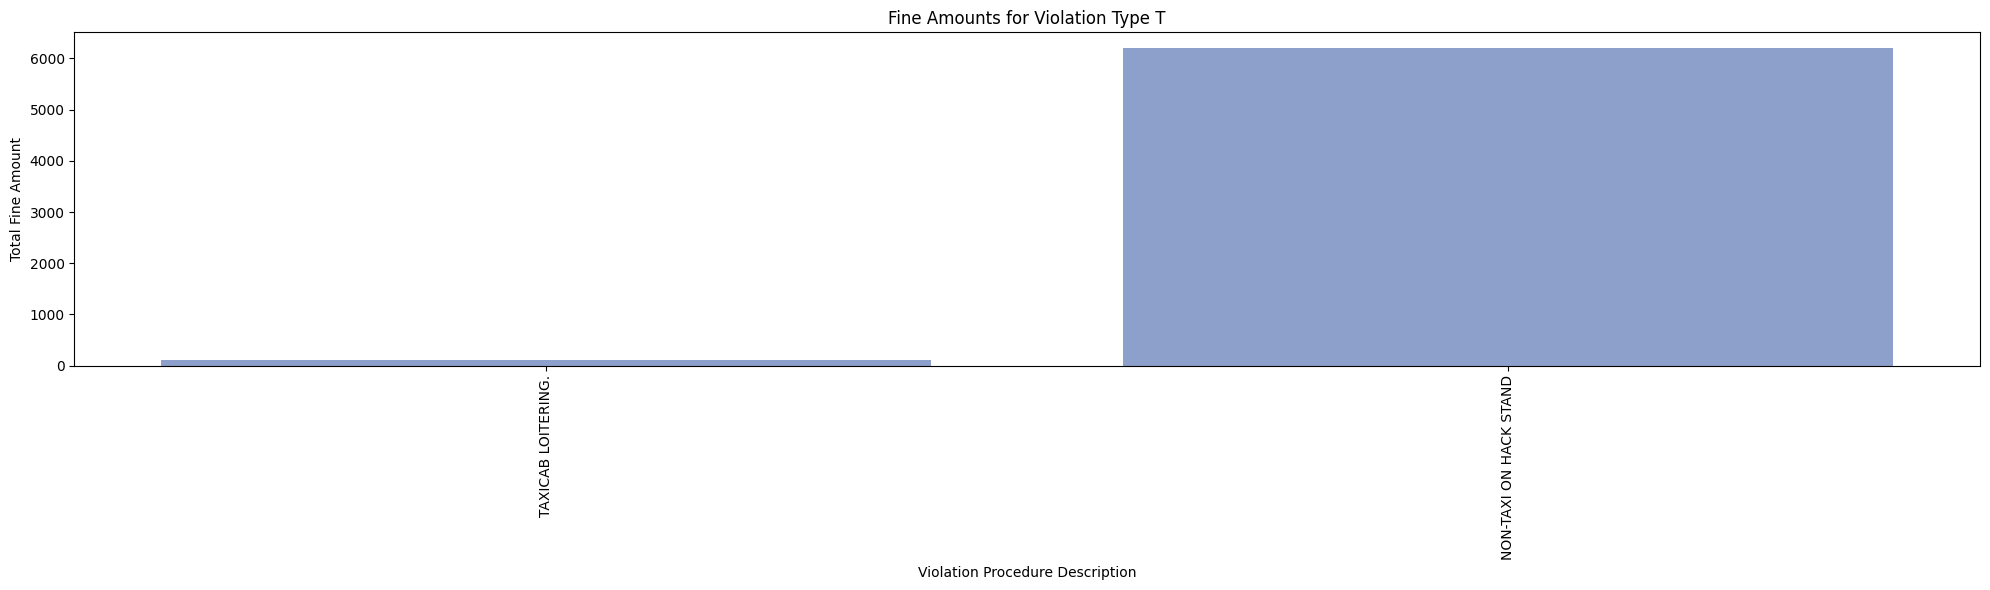

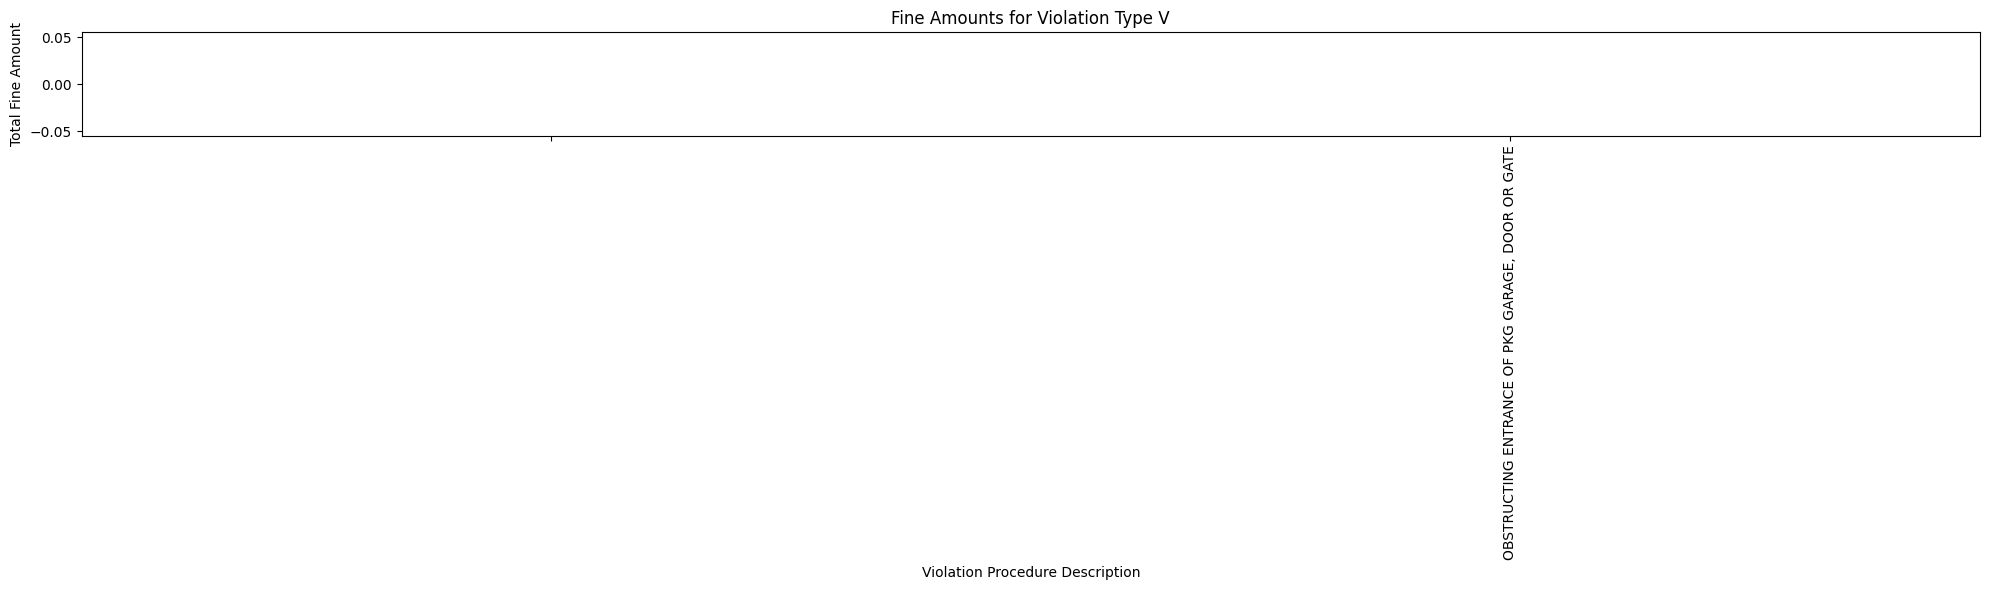

In [117]:
# Plot Fine Amounts by Violation Type and Procedure Description
violations_filtered = violations_df[['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC', 'FINE_AMOUNT']].dropna(subset=['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC', 'FINE_AMOUNT'])
violations_filtered['FINE_AMOUNT'] = pd.to_numeric(violations_filtered['FINE_AMOUNT'], errors='coerce')
violations_filtered = violations_filtered.dropna(subset=['FINE_AMOUNT'])
violation_summary = violations_filtered.groupby(['VIOLATION_TYPE_DESC', 'VIOLATION_PROC_DESC'])['FINE_AMOUNT'].sum().reset_index()

violation_types = ['P', 'M', 'T', 'V']
colors = plt.get_cmap("Set2")(range(len(violation_types)))

for i, violation_type in enumerate(violation_types):
    plt.figure(figsize=(20, 6))
    violation_data = violation_summary[violation_summary['VIOLATION_TYPE_DESC'] == violation_type].sort_values(by='FINE_AMOUNT', ascending=True)

    plt.bar(
        x=violation_data['VIOLATION_PROC_DESC'],
        height=violation_data['FINE_AMOUNT'],
        color=colors[i]
    )

    plt.title(f"Fine Amounts for Violation Type {violation_type}")
    plt.ylabel("Total Fine Amount")
    plt.xlabel("Violation Procedure Description")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


Fine Amounts by Location for Violation Type P:
                                  LOCATION  FINE_AMOUNT
2512     900 BLOCK NEW HAMPSHIRE AVE NW *         7515
3696        1300 BLOCK H ST NW NORTH SIDE         7560
3681        1300 BLOCK G ST NW NORTH SIDE         7715
1710     600 BLOCK VIRGINIA AVE SW SOUTH*         7730
2334       900 BLOCK 22ND ST NW EAST SIDE         7810
2965    1100 BLOCK CONSTITUTION AVE NW S*         7830
2964    1100 BLOCK CONSTITUTION AVE NW N*         7865
974          400 BLOCK F ST NW SOUTH SIDE         7890
150        100 BLOCK EYE ST SE SOUTH SIDE         7900
5693        2100 BLOCK K ST NW SOUTH SIDE         7930
5592    2000 BLOCK VIRGINIA AVE NW NORTH*         8140
8329    5900 BLOCK GEORGIA AVE NW EAST S*         8360
8614        UNIT BLOCK E ST NW SOUTH SIDE         8410
3627    1300 BLOCK CONNECTICUT AVE NW EA*         8500
3172      1200 BLOCK 20TH ST NW EAST SIDE         8580
311          130 BLOCK M ST NE NORTH SIDE         8750
5157        1800 

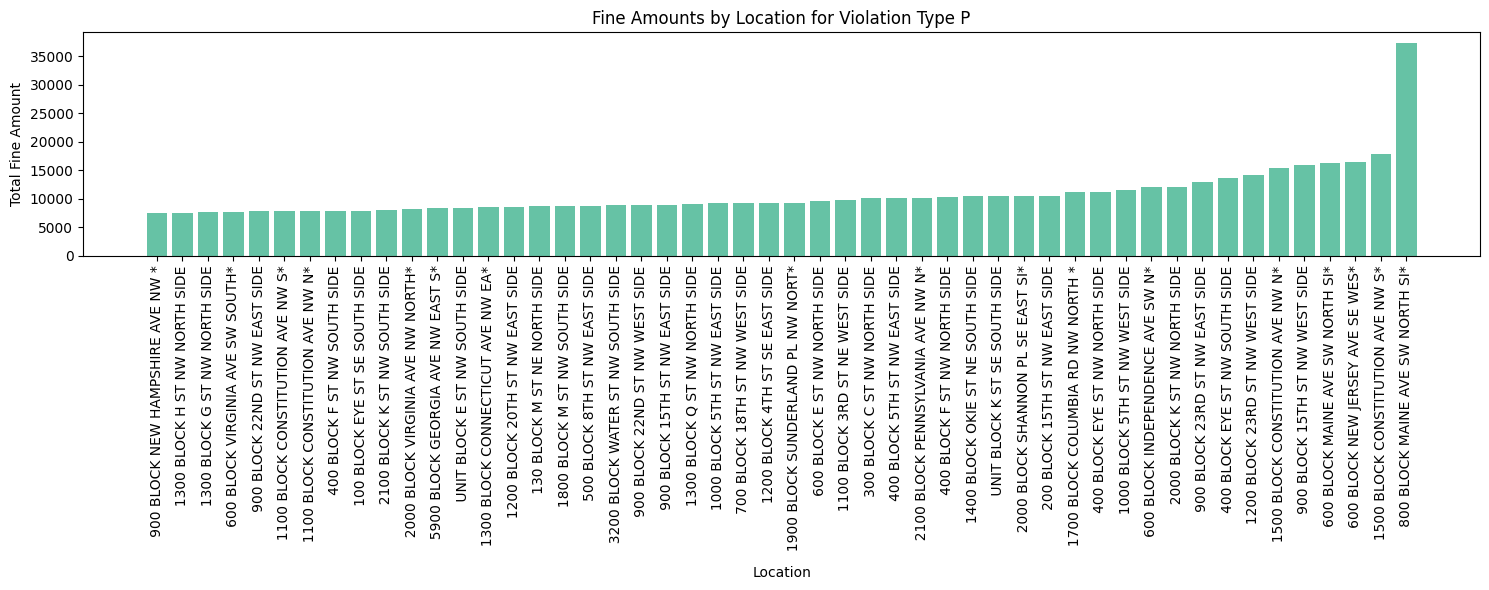

Fine Amounts by Location for Violation Type M:
                         LOCATION  FINE_AMOUNT
0            247 BLK 11TH ST  SE           25
2     6TH ST AND VIRGINIA AVE SW           25
4             FRONT 800 H ST  NE           25
3  BLOCK 1143 CONNECTICUT AVE NW           50
5   INTERSECTION 3RD ST+ K ST NW           50
1                    50 D ST  NW          200 



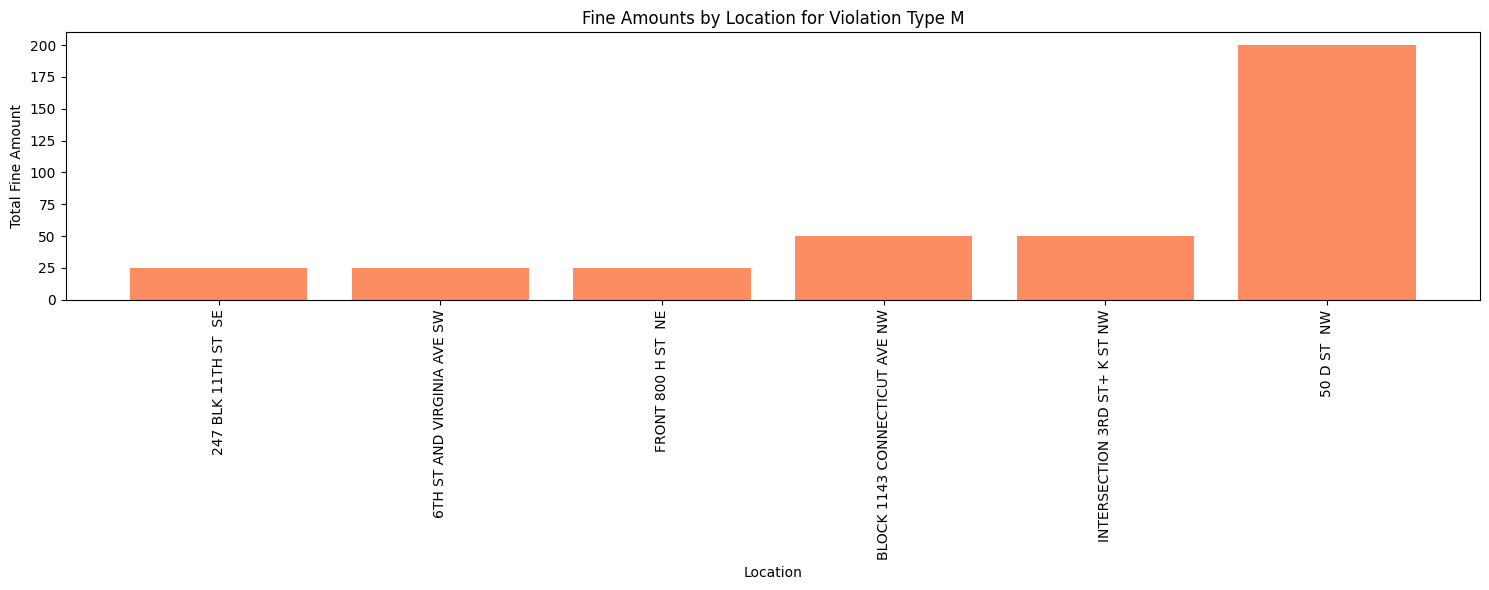

Fine Amounts by Location for Violation Type T:
                                   LOCATION  FINE_AMOUNT
11568                                                25
11598           BLOCK 1330 MARYLAND AVE SW           25
11600       BLOCK 1400 M ST NW  RIGHT LANE           25
11602        BLOCK 1400 M ST SW NORTH SIDE           25
11603  BLOCK 1400 PENNSYLVANIA AVE NW  LE*           25
...                                    ...          ...
11639              BLOCK 900 MADISON DR NW          300
11599                   BLOCK 1400 M ST NW          325
11590  BLOCK 1200 MADISON DR NW  LEFT LANE          325
11589             BLOCK 1200 MADISON DR NW          400
11619                   BLOCK 3000 K ST NW          625

[80 rows x 2 columns] 



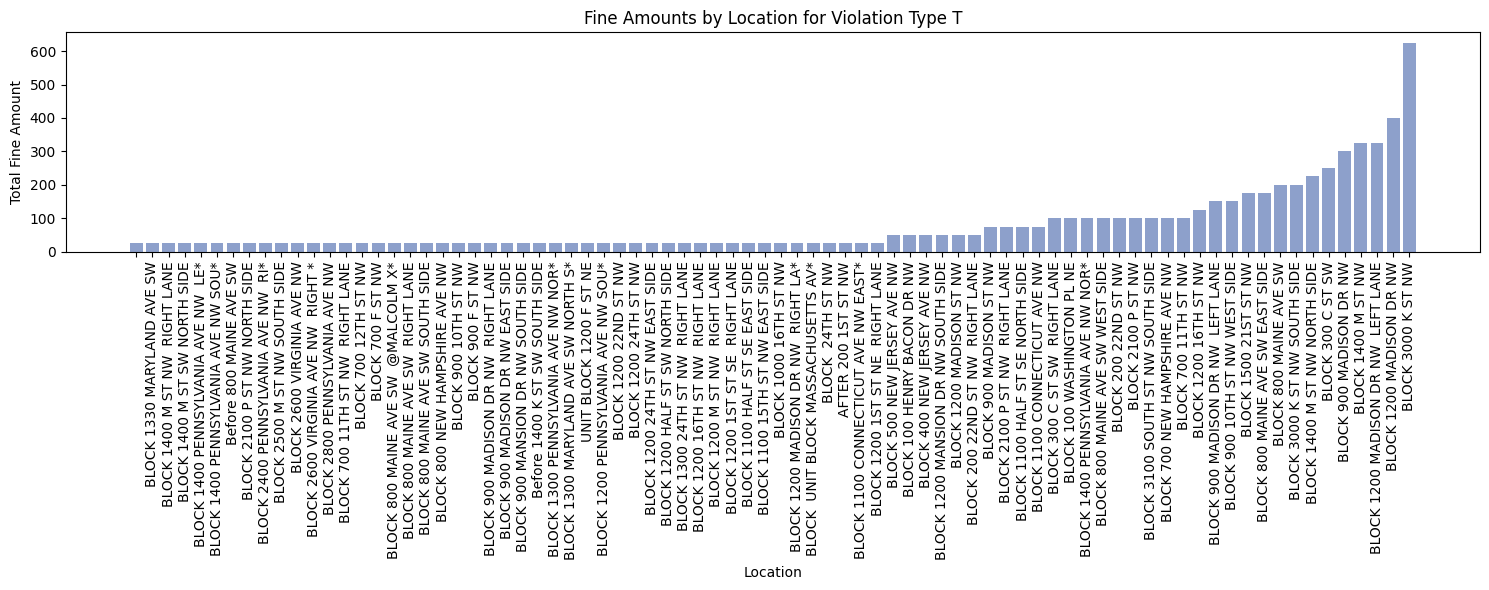

Fine Amounts by Location for Violation Type V:
                                   LOCATION  FINE_AMOUNT
12193         1100 BLOCK R ST NW EAST SIDE            0
12192    1100 BLOCK QUEEN ST NE SOUTH SIDE            0
12191    1100 BLOCK QUEEN ST NE NORTH SIDE            0
12190     1100 BLOCK PENN ST NE SOUTH SIDE            0
12189     1100 BLOCK PENN ST NE NORTH SIDE            0
12188        1100 BLOCK P ST NW SOUTH SIDE            0
12187     1100 BLOCK OWEN PL NE NORTH SIDE            0
12186     1100 BLOCK OTIS PL NW SOUTH SIDE            0
12185    1100 BLOCK OATES ST NE SOUTH SIDE            0
12195    1100 BLOCK SYCAMORE DR SE WEST S*            0
12184    1100 BLOCK OATES ST NE NORTH SIDE            0
12182    1100 BLOCK NORTH CAPITOL ST NE E*            0
12181     1100 BLOCK NEAL ST NE SOUTH SIDE            0
12180    1100 BLOCK MORSE ST NE SOUTH SIDE            0
12179    1100 BLOCK MORSE ST NE NORTH SIDE            0
12178    1100 BLOCK MONTELLO AVE NE WEST *            0


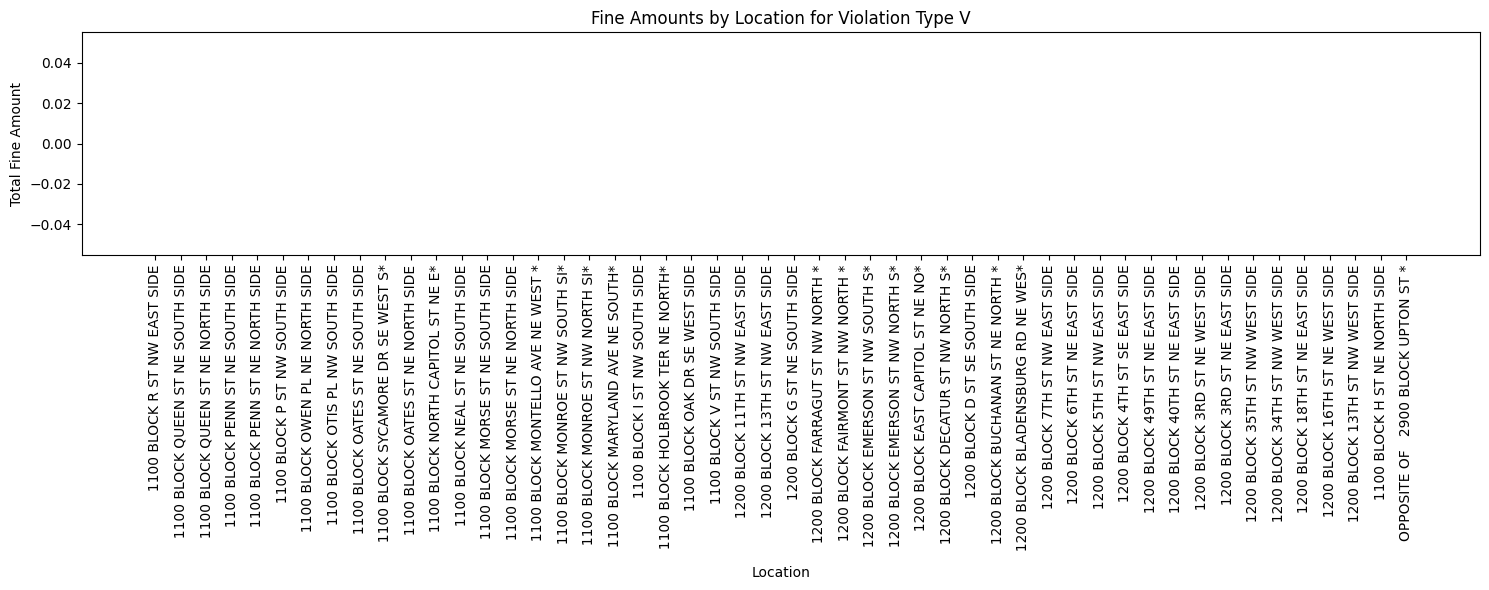

In [118]:
# Plot Fine Amounts by Location for Each Violation Type
violations_filtered = violations_df[['VIOLATION_TYPE_DESC', 'LOCATION', 'FINE_AMOUNT']].dropna(subset=['VIOLATION_TYPE_DESC', 'LOCATION', 'FINE_AMOUNT'])
violations_filtered['FINE_AMOUNT'] = pd.to_numeric(violations_filtered['FINE_AMOUNT'], errors='coerce')
violations_filtered = violations_filtered.dropna(subset=['FINE_AMOUNT'])

violation_summary = violations_filtered.groupby(['VIOLATION_TYPE_DESC', 'LOCATION'])['FINE_AMOUNT'].sum().reset_index()
violation_types = ['P', 'M', 'T', 'V']
colors = plt.get_cmap("Set2")(range(len(violation_types)))

for i, violation_type in enumerate(violation_types):
    violation_data = violation_summary[violation_summary['VIOLATION_TYPE_DESC'] == violation_type].sort_values(by='FINE_AMOUNT', ascending=True)

    if violation_type in ['P', 'V']:
        violation_data = violation_data.tail(50)

    print(f"Fine Amounts by Location for Violation Type {violation_type}:\n", violation_data[['LOCATION', 'FINE_AMOUNT']], "\n")

    plt.figure(figsize=(15, 6))
    plt.bar(
        x=violation_data['LOCATION'],
        height=violation_data['FINE_AMOUNT'],
        color=colors[i]
    )

    plt.title(f"Fine Amounts by Location for Violation Type {violation_type}")
    plt.ylabel("Total Fine Amount")
    plt.xlabel("Location")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


Violation Counts by Location for Violation Type P:
                                  LOCATION  VIOLATION_COUNT
5394    1900 BLOCK SUNDERLAND PL NW NORT*              129
2512     900 BLOCK NEW HAMPSHIRE AVE NW *              131
1709     600 BLOCK VIRGINIA AVE SW NORTH*              133
3181      1200 BLOCK 23RD ST NW WEST SIDE              133
8689        UNIT BLOCK L ST SE NORTH SIDE              133
583        300 BLOCK 15TH ST NW EAST SIDE              133
2808    1000 BLOCK THOMAS JEFFERSON ST N*              133
909         400 BLOCK 5TH ST NW EAST SIDE              133
2334       900 BLOCK 22ND ST NW EAST SIDE              137
974          400 BLOCK F ST NW SOUTH SIDE              137
910         400 BLOCK 5TH ST NW WEST SIDE              137
5538        2000 BLOCK K ST NW NORTH SIDE              141
4145        1400 BLOCK P ST NW SOUTH SIDE              143
5495    2000 BLOCK CONSTITUTION AVE NW S*              143
1639     600 BLOCK MARYLAND AVE SW SOUTH*              144
150 

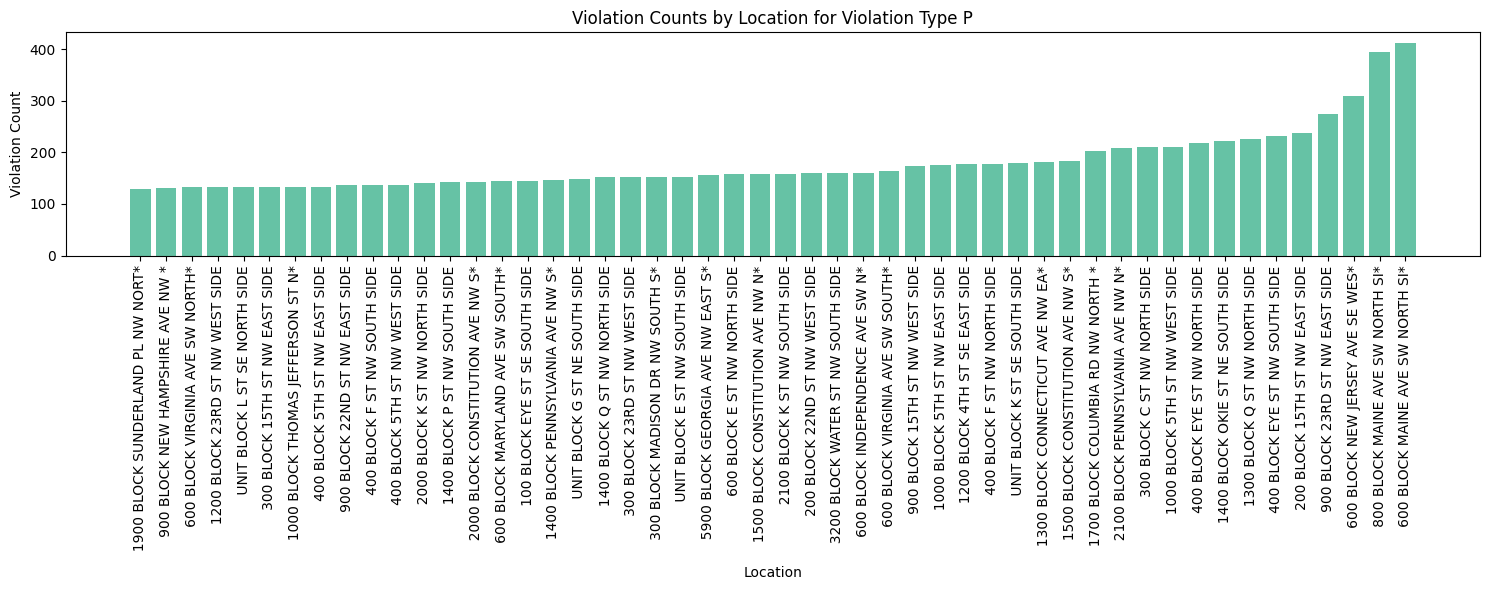

Violation Counts by Location for Violation Type M:
                         LOCATION  VIOLATION_COUNT
0            247 BLK 11TH ST  SE                1
1                    50 D ST  NW                1
2     6TH ST AND VIRGINIA AVE SW                1
3  BLOCK 1143 CONNECTICUT AVE NW                1
4             FRONT 800 H ST  NE                1
5   INTERSECTION 3RD ST+ K ST NW                1 



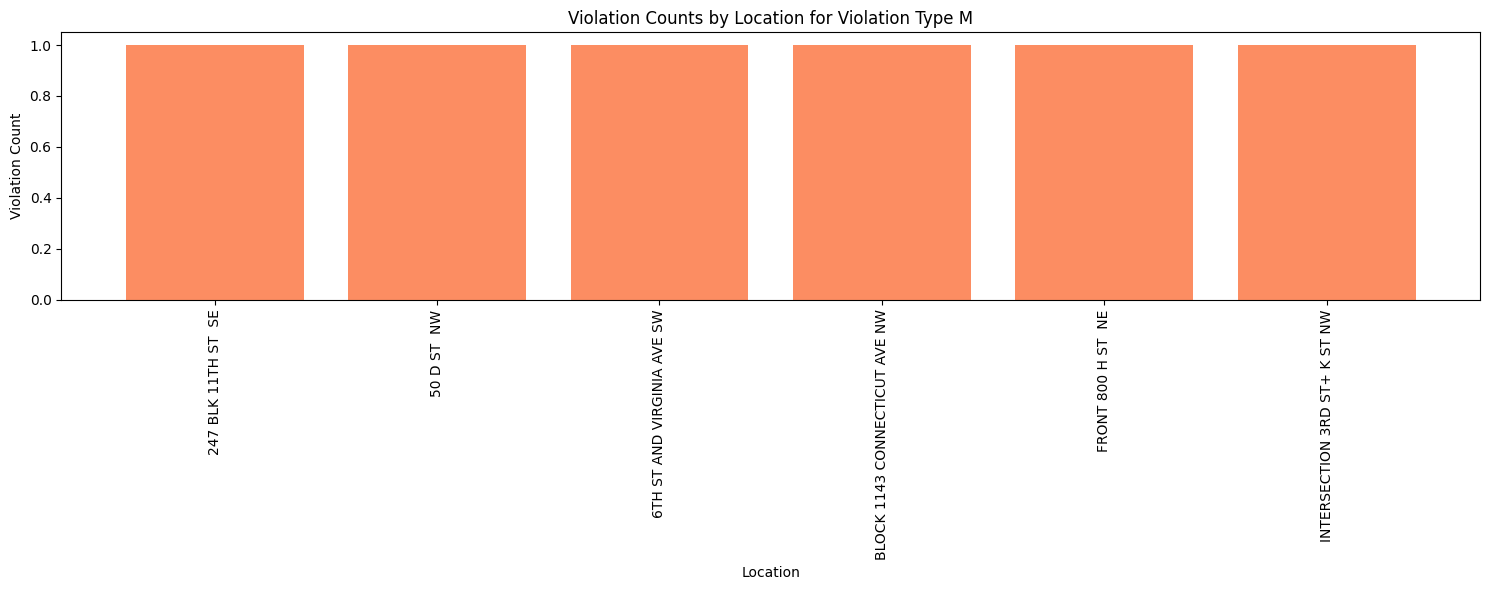

Violation Counts by Location for Violation Type T:
                                   LOCATION  VIOLATION_COUNT
11584                BLOCK 1200 22ND ST NW                1
11585                BLOCK 1200 24TH ST NW                1
11586      BLOCK 1200 24TH ST NW EAST SIDE                1
11587     BLOCK 1200 HALF ST SW NORTH SIDE                1
11595    BLOCK 1300 24TH ST NW  RIGHT LANE                1
11581    BLOCK 1200 16TH ST NW  RIGHT LANE                1
11588       BLOCK 1200 M ST NW  RIGHT LANE                1
11583     BLOCK 1200 1ST ST SE  RIGHT LANE                1
11578      BLOCK 1100 HALF ST SE EAST SIDE                1
11575      BLOCK 1100 15TH ST NW EAST SIDE                1
11574                BLOCK 1000 16TH ST NW                1
11591  BLOCK 1200 MADISON DR NW  RIGHT LA*                1
11571  BLOCK  UNIT BLOCK MASSACHUSETTS AV*                1
11570                    BLOCK  24TH ST NW                1
11569                  AFTER 200 1ST ST NW      

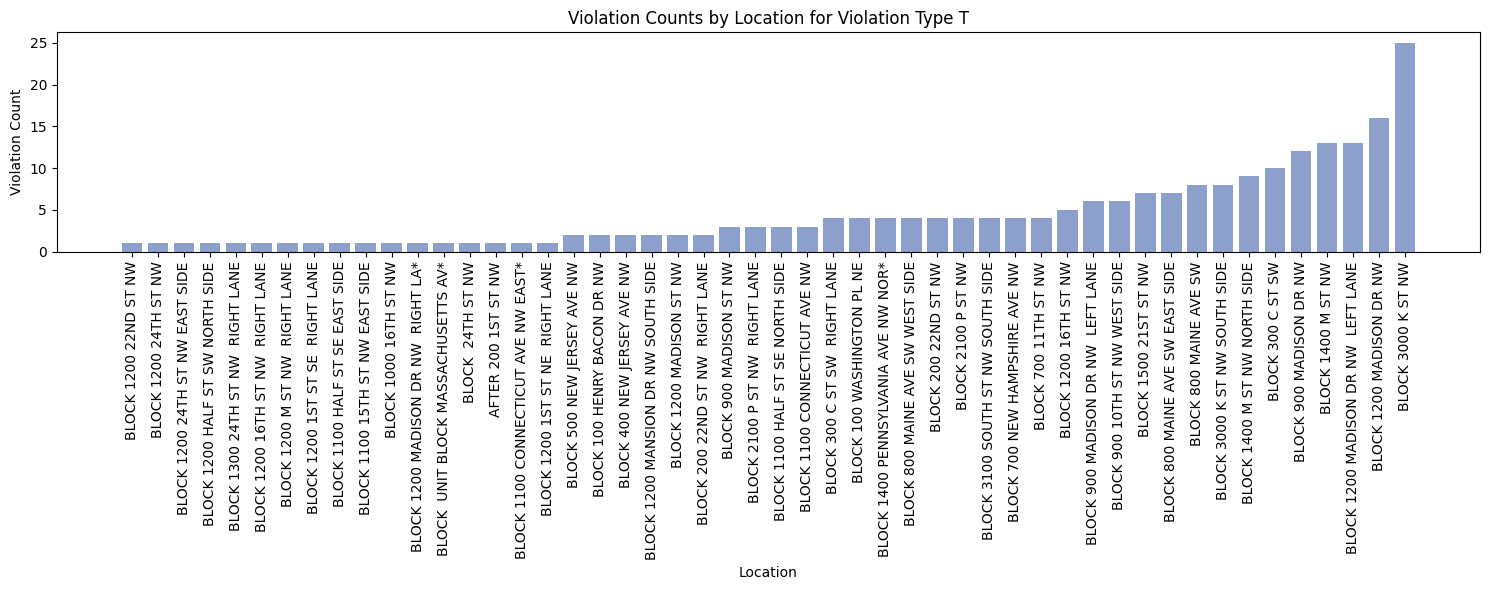

Violation Counts by Location for Violation Type V:
                                   LOCATION  VIOLATION_COUNT
12201      1200 BLOCK 18TH ST NE EAST SIDE                5
12284       1300 BLOCK 6TH ST NE WEST SIDE                6
12996    3500 BLOCK NEW HAMPSHIRE AVE NW *                6
12088     900 BLOCK SYCAMORE DR SE WEST S*                6
13214    6100 BLOCK EASTERN AVE NE SOUTH *                6
13296        UNIT BLOCK O ST NW SOUTH SIDE                6
12427    1500 BLOCK PENNSYLVANIA AVE SE N*                6
12465        1600 BLOCK K ST NE SOUTH SIDE                6
12442      1600 BLOCK 32ND ST NW EAST SIDE                6
13266   UNIT BLOCK CHANNING ST NW SOUTH S*                6
13271   UNIT BLOCK GALVESTON PL SW NORTH *                6
13272   UNIT BLOCK GALVESTON PL SW SOUTH *                6
12019         800 BLOCK H ST NE SOUTH SIDE                6
12225        1200 BLOCK H ST NE NORTH SIDE                6
11702         100 BLOCK V ST NW SOUTH SIDE      

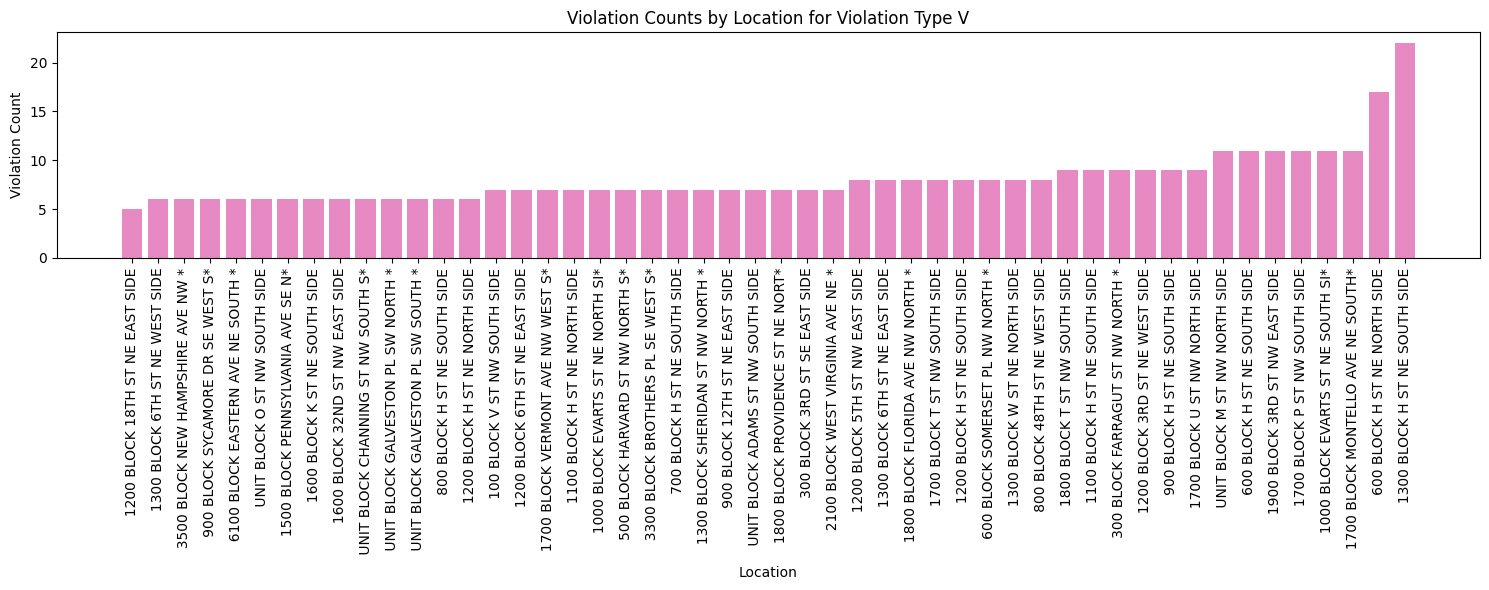

In [119]:
# Plot Violation Counts by Location for Each Violation Type

violations_filtered = violations_df[['VIOLATION_TYPE_DESC', 'LOCATION']].dropna(subset=['VIOLATION_TYPE_DESC', 'LOCATION'])
violation_counts = violations_filtered.groupby(['VIOLATION_TYPE_DESC', 'LOCATION']).size().reset_index(name='VIOLATION_COUNT')
violation_types = ['P', 'M', 'T', 'V']
colors = plt.get_cmap("Set2")(range(len(violation_types)))

for i, violation_type in enumerate(violation_types):
    violation_data = violation_counts[violation_counts['VIOLATION_TYPE_DESC'] == violation_type].sort_values(by='VIOLATION_COUNT', ascending=True)
    violation_data = violation_data.tail(50)

    print(f"Violation Counts by Location for Violation Type {violation_type}:\n", violation_data[['LOCATION', 'VIOLATION_COUNT']], "\n")

    plt.figure(figsize=(15, 6))
    plt.bar(
        x=violation_data['LOCATION'],
        height=violation_data['VIOLATION_COUNT'],
        color=colors[i]
    )
    plt.title(f"Violation Counts by Location for Violation Type {violation_type}")
    plt.ylabel("Violation Count")
    plt.xlabel("Location")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

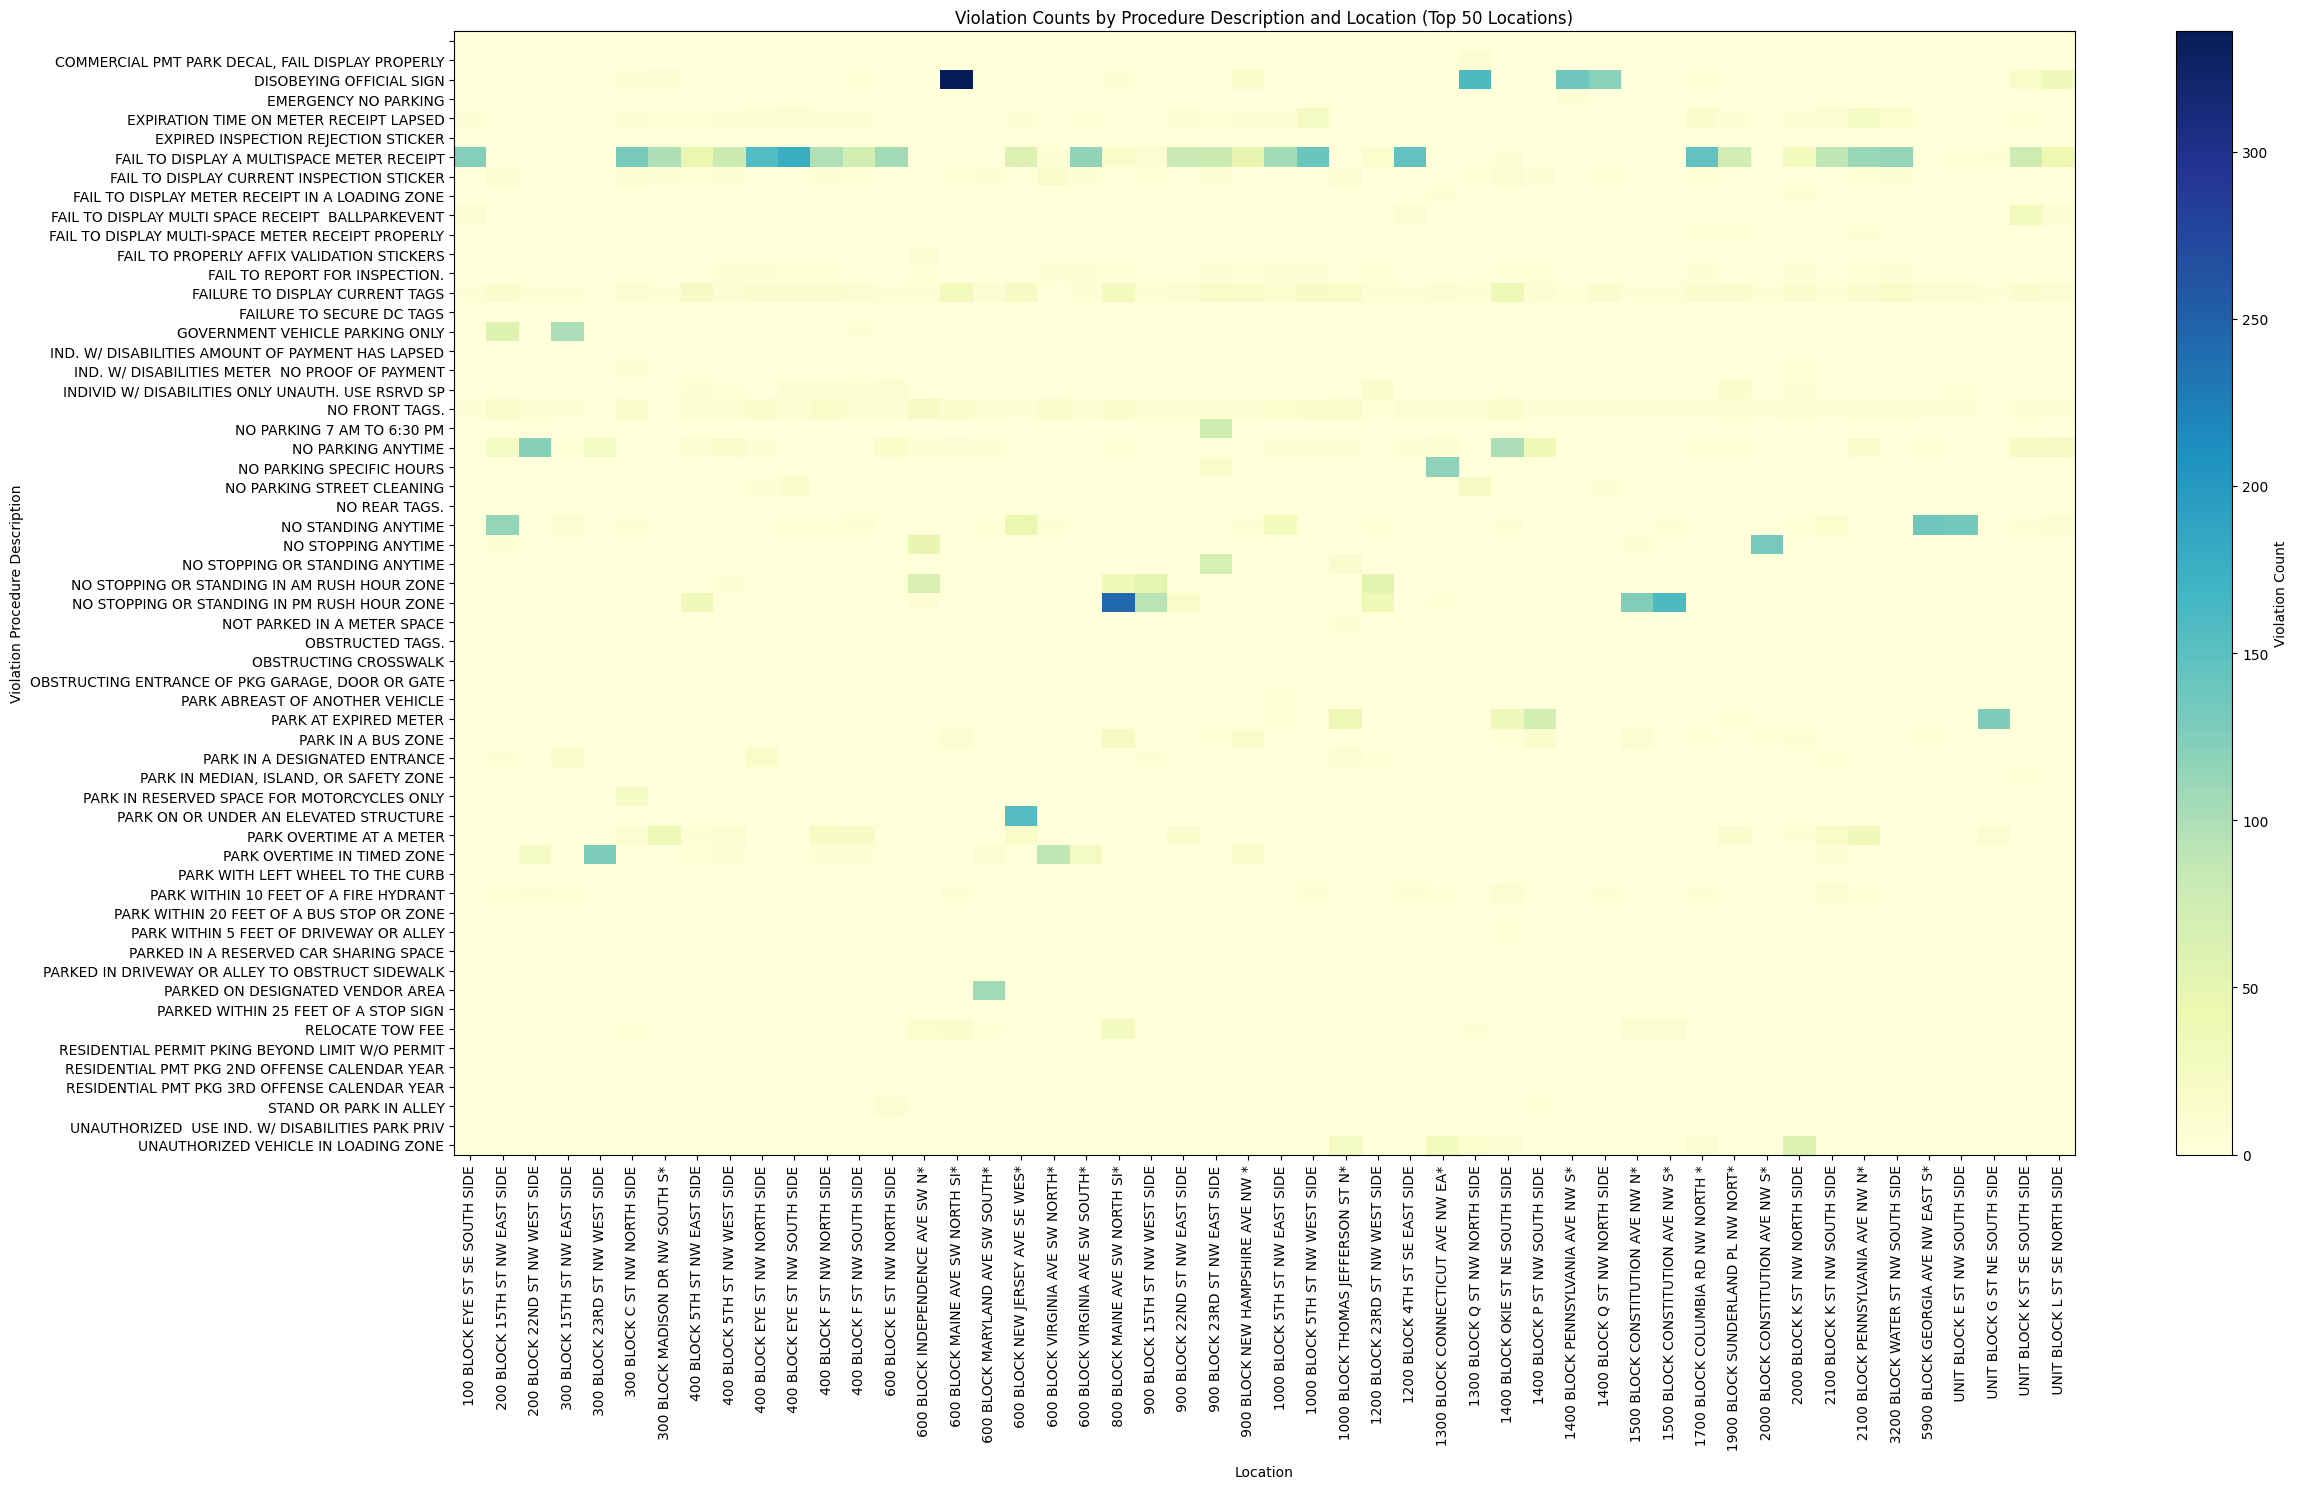

In [120]:
violations_filtered = violations_df[['VIOLATION_PROC_DESC', 'LOCATION']].dropna(subset=['VIOLATION_PROC_DESC', 'LOCATION'])
violation_counts = violations_filtered.groupby(['VIOLATION_PROC_DESC', 'LOCATION']).size().reset_index(name='VIOLATION_COUNT')
top_50_locations = violation_counts.groupby('LOCATION')['VIOLATION_COUNT'].sum().nlargest(50).index
violation_counts_top50 = violation_counts[violation_counts['LOCATION'].isin(top_50_locations)]
violation_pivot = violation_counts_top50.pivot(index="VIOLATION_PROC_DESC", columns="LOCATION", values="VIOLATION_COUNT").fillna(0)

plt.figure(figsize=(25, 15))
plt.imshow(violation_pivot, cmap="YlGnBu", aspect='auto')

plt.title("Violation Counts by Procedure Description and Location (Top 50 Locations)")
plt.xlabel("Location")
plt.ylabel("Violation Procedure Description")
plt.xticks(ticks=range(len(violation_pivot.columns)), labels=violation_pivot.columns, rotation=90)
plt.yticks(ticks=range(len(violation_pivot.index)), labels=violation_pivot.index)
plt.colorbar(label='Violation Count')
plt.tight_layout()
plt.show()

Total Fine Amount Collected by Each Agency:
                     ISSUING_AGENCY_NAME  FINE_AMOUNT
0                           BOLLING AFB          330
1            COMMAND INFORMATION CENTER           30
2                                  DDOT       129570
3            DEPARTMENT OF PUBLIC WORKS      5409155
4       DPT. OF GENERAL SERVICES GUARDS           75
5                                   FBI          125
6   FEDERAL PROTECTIVE SERVICES (US GV)          125
7                          METRO POLICE         7525
8    METRO POLICE DPT-PROPERTY DIVISION          480
9    METROPOLITAN POLICE DPT-DISTRICT 1        42490
10   METROPOLITAN POLICE DPT-DISTRICT 2        14900
11   METROPOLITAN POLICE DPT-DISTRICT 3        11010
12   METROPOLITAN POLICE DPT-DISTRICT 4        12490
13   METROPOLITAN POLICE DPT-DISTRICT 5        18475
14   METROPOLITAN POLICE DPT-DISTRICT 6         5020
15   METROPOLITAN POLICE DPT-DISTRICT 7         3175
16                    MPD RESERVE CORPS         1125
1

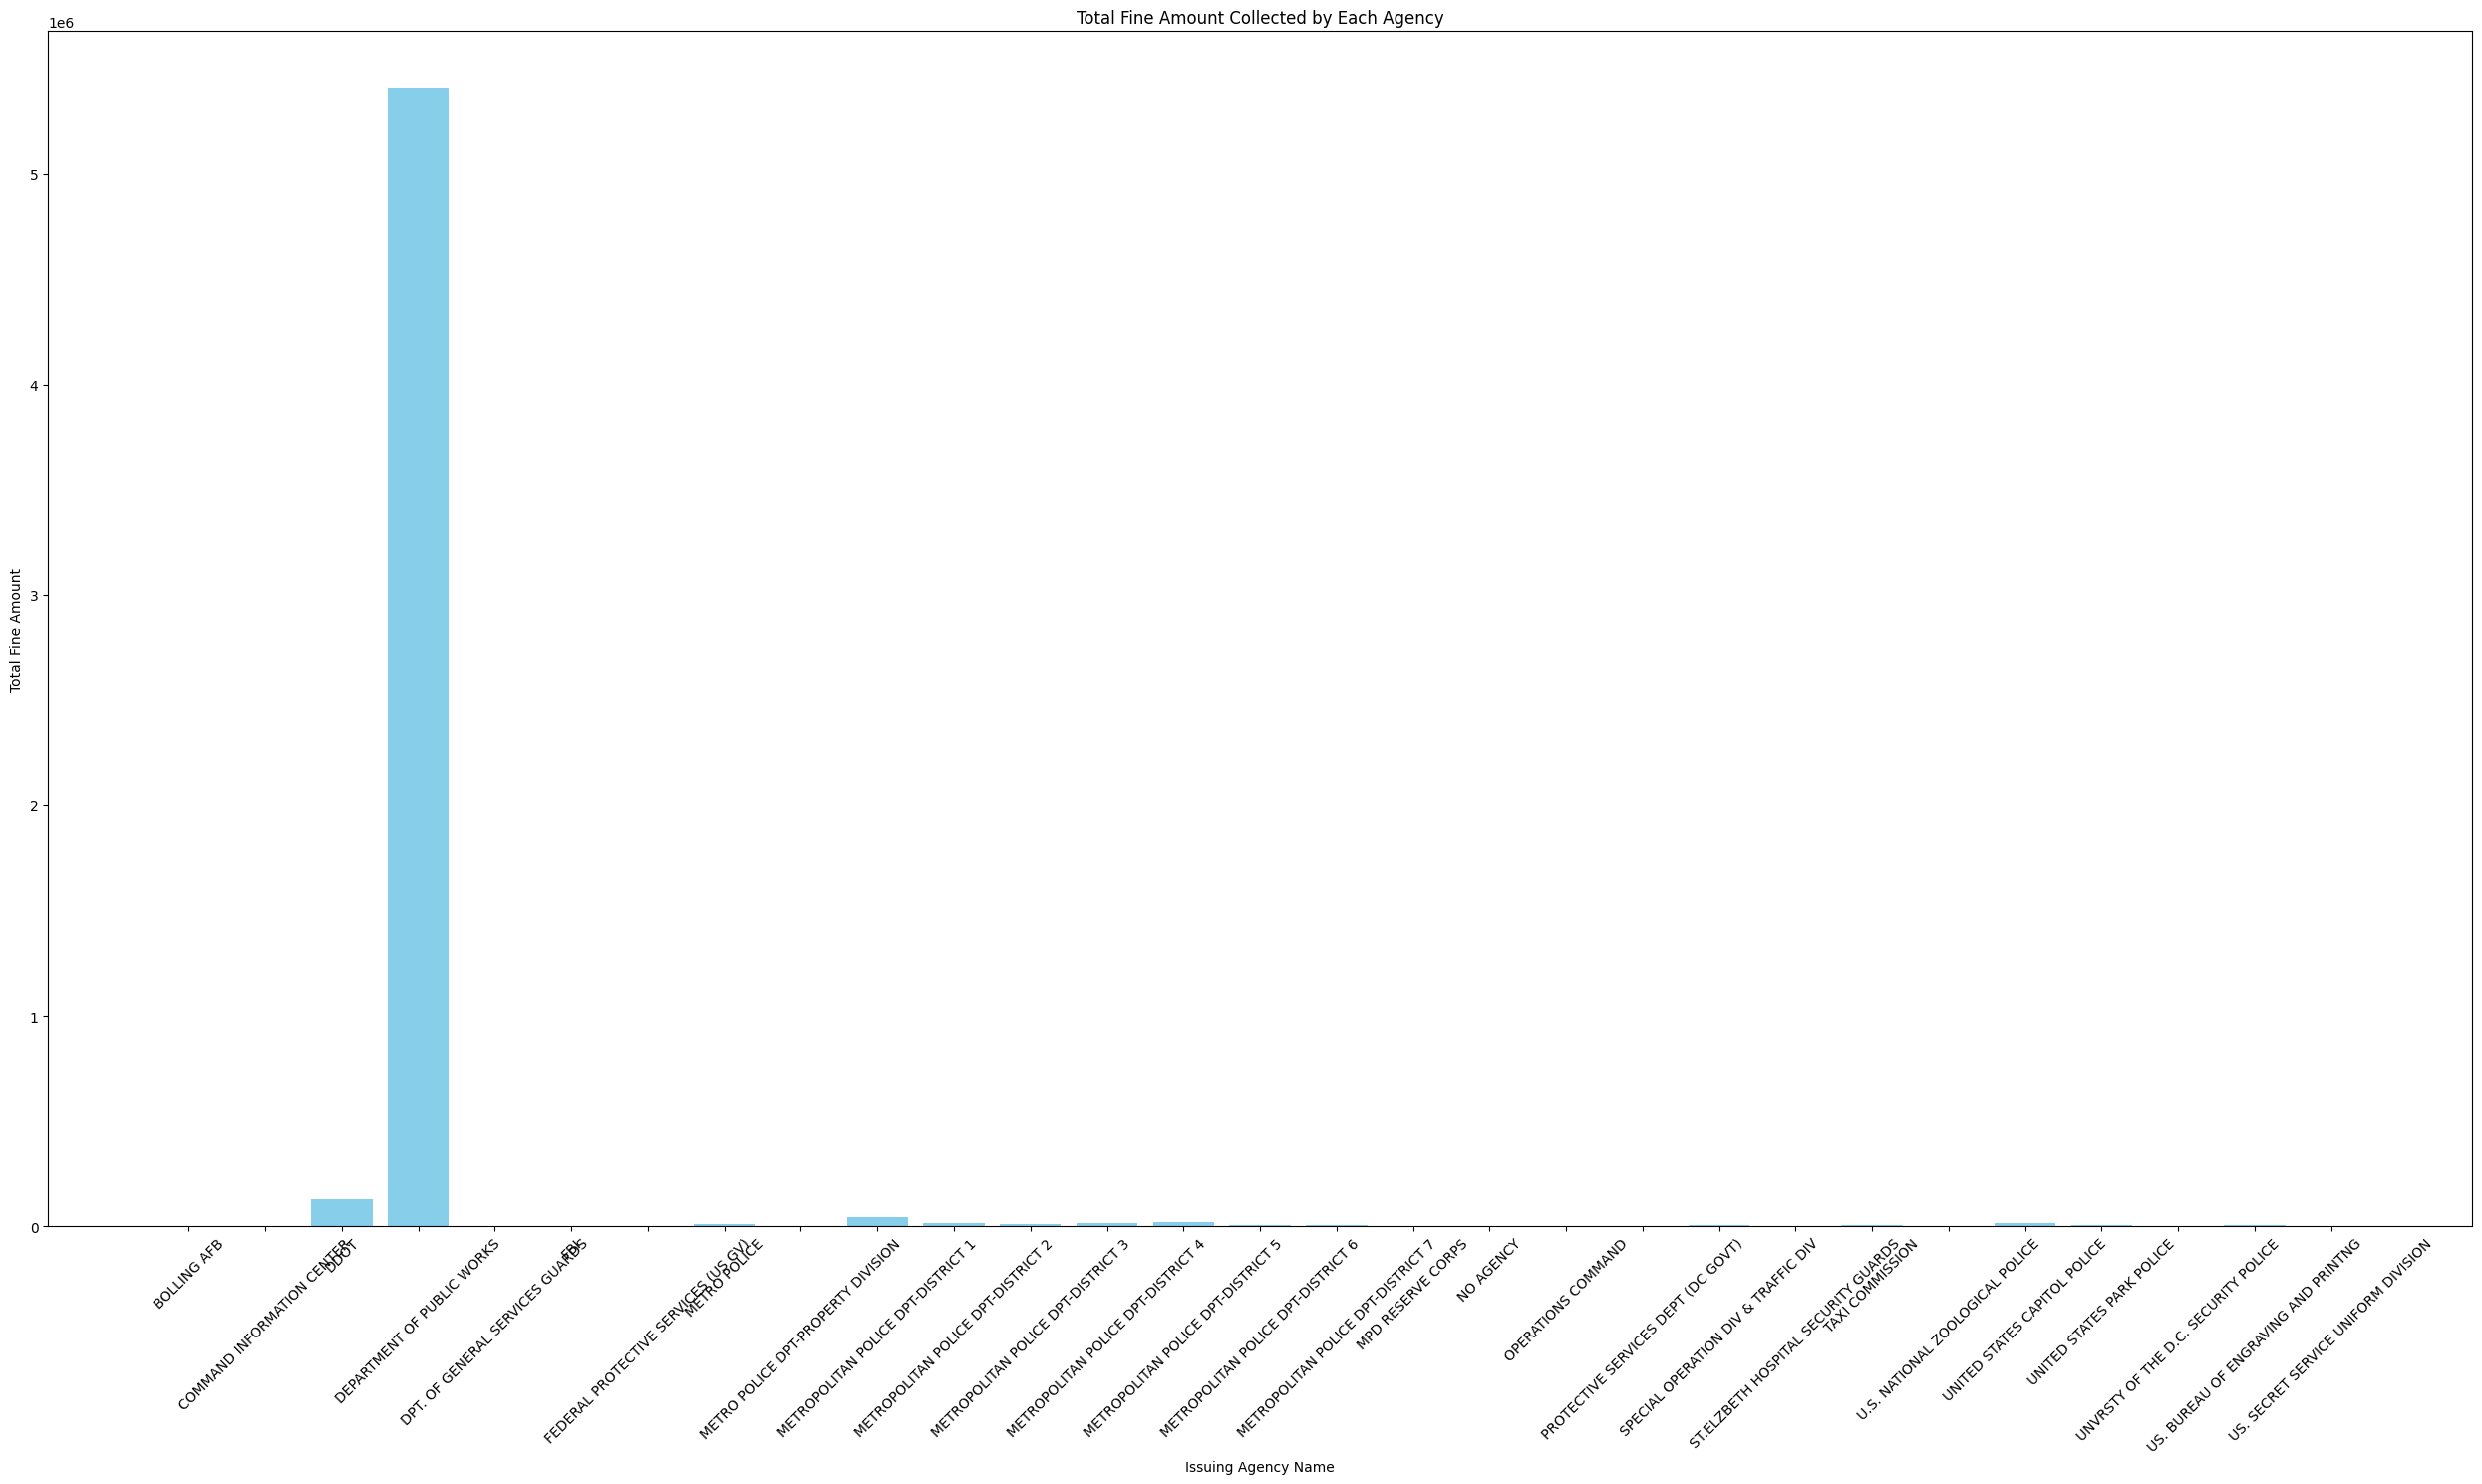

In [121]:
#Total fine amounts by agency
violations_df['FINE_AMOUNT'] = pd.to_numeric(violations_df['FINE_AMOUNT'], errors='coerce')

violations_filtered = violations_df[['ISSUING_AGENCY_NAME', 'FINE_AMOUNT']].dropna(subset=['ISSUING_AGENCY_NAME', 'FINE_AMOUNT'])

agency_fine_totals = violations_filtered.groupby('ISSUING_AGENCY_NAME')['FINE_AMOUNT'].sum().reset_index()

print("Total Fine Amount Collected by Each Agency:\n", agency_fine_totals)

plt.figure(figsize=(25, 15))
plt.bar(agency_fine_totals['ISSUING_AGENCY_NAME'], agency_fine_totals['FINE_AMOUNT'], color='skyblue')
plt.title("Total Fine Amount Collected by Each Agency")
plt.xlabel("Issuing Agency Name")
plt.ylabel("Total Fine Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

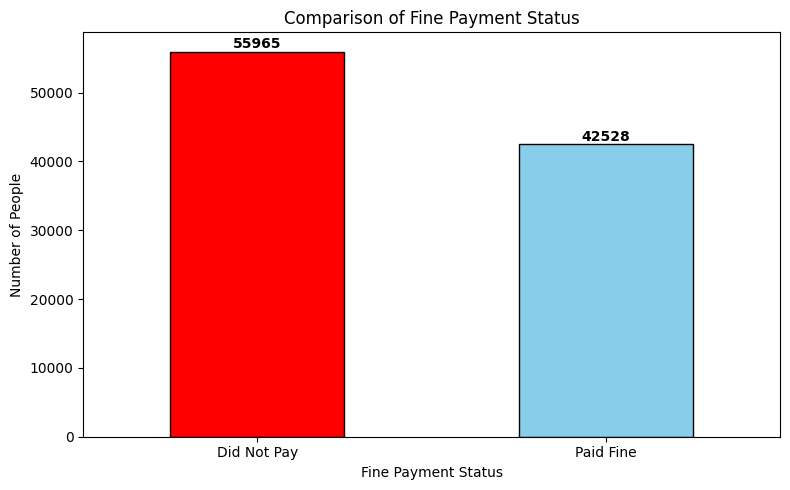

In [122]:
#Compariion of Fine Payment Status
violations_df['Paid_Fine'] = violations_df.apply(lambda row: 1 if row['TOTAL_PAID'] > 0 or row['PENALTY_1'] > 0 else 0, axis=1)
paid_counts = violations_df['Paid_Fine'].value_counts()

plt.figure(figsize=(8, 5))
bar_plot = paid_counts.plot(
    kind='bar',
    color=['Red', 'skyblue'],
    edgecolor='black'
)
plt.xlabel('Fine Payment Status')
plt.ylabel('Number of People')
plt.title('Comparison of Fine Payment Status')
plt.xticks(ticks=[0, 1], labels=['Did Not Pay', 'Paid Fine'], rotation=0)

for index, value in enumerate(paid_counts):
    plt.text(index, value + 50, str(value), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

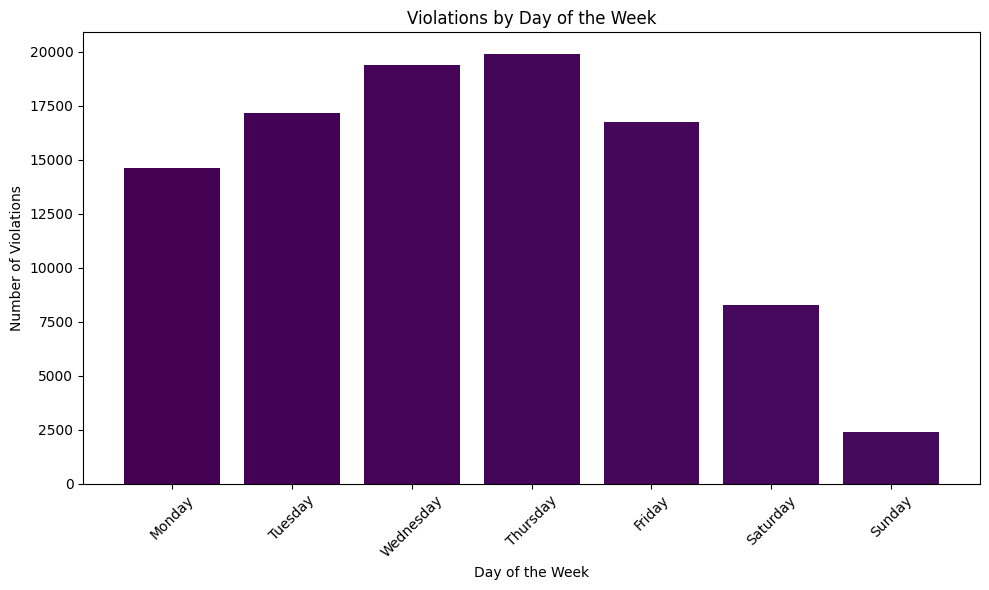

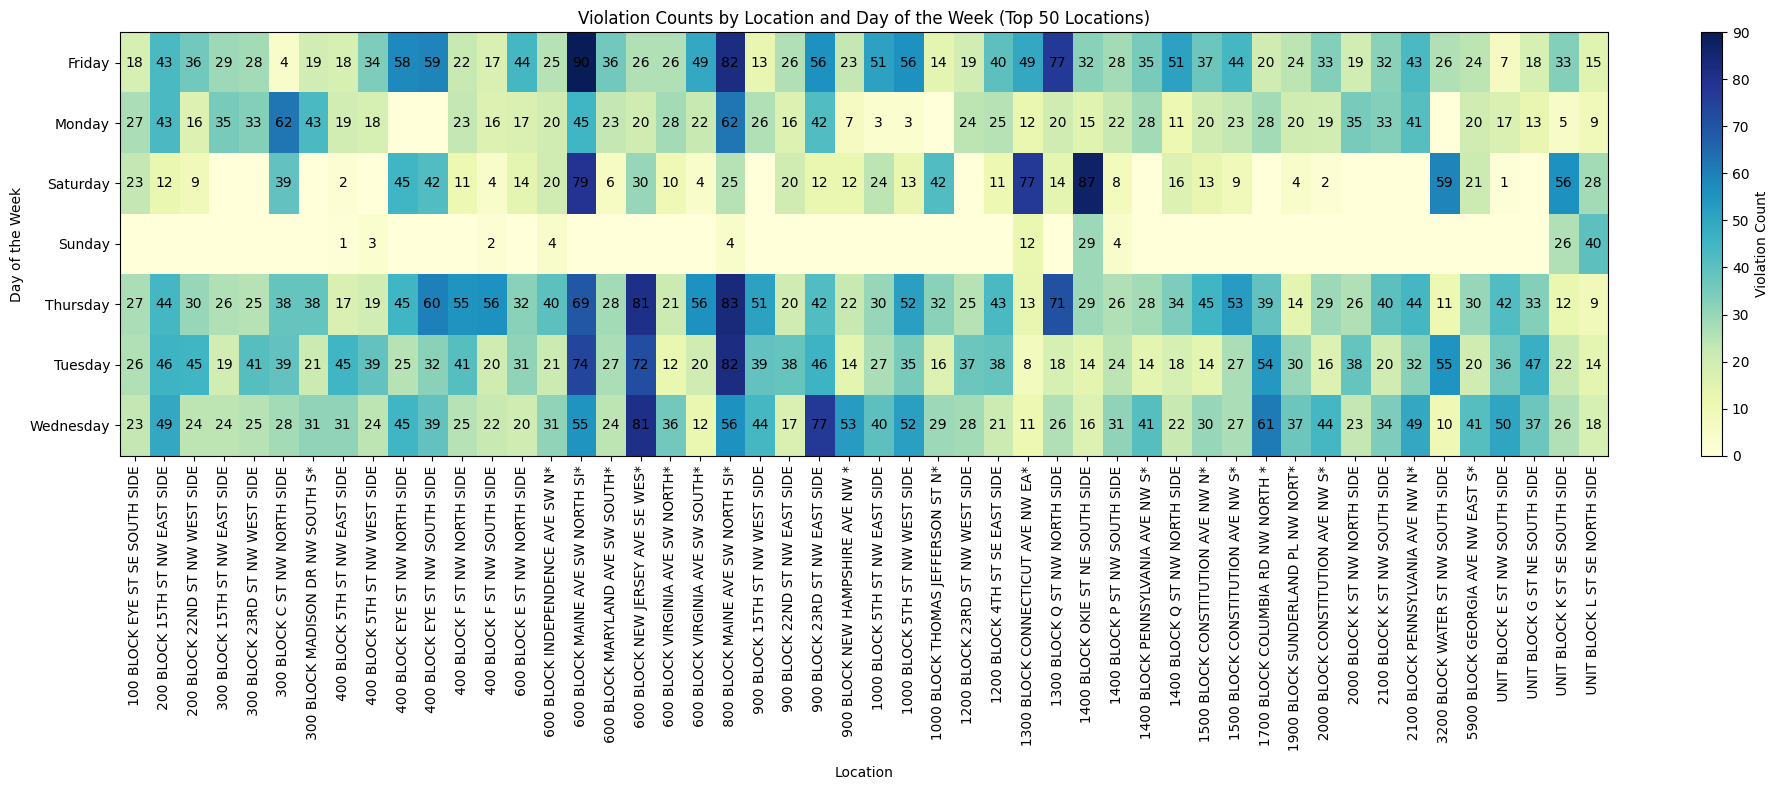

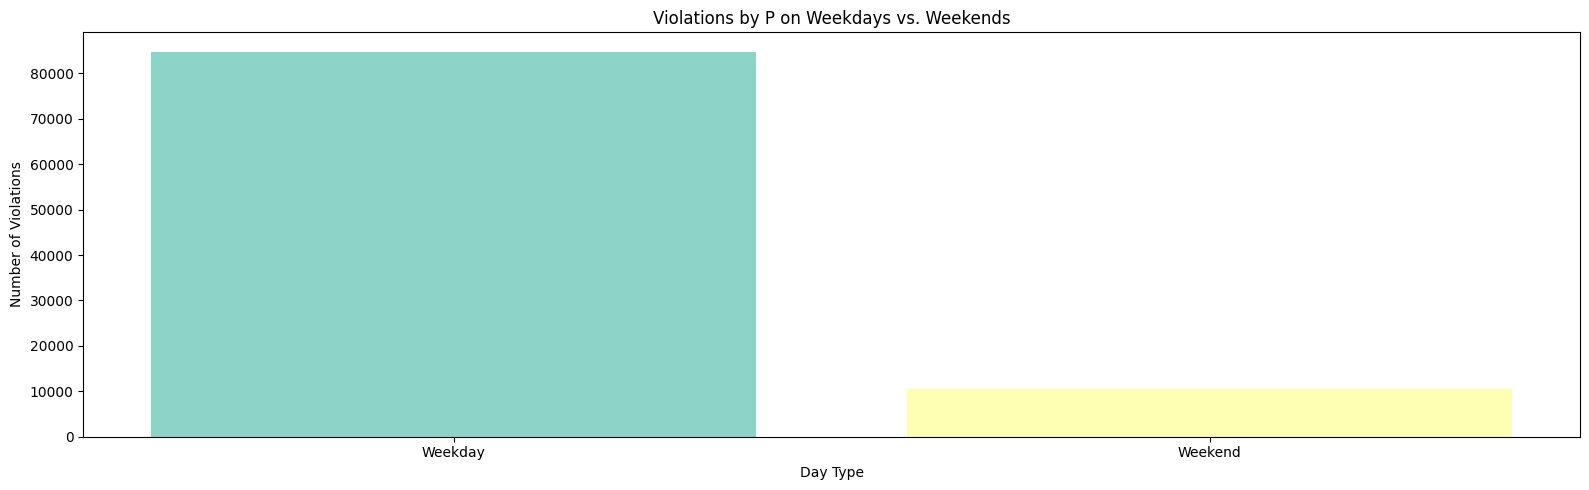

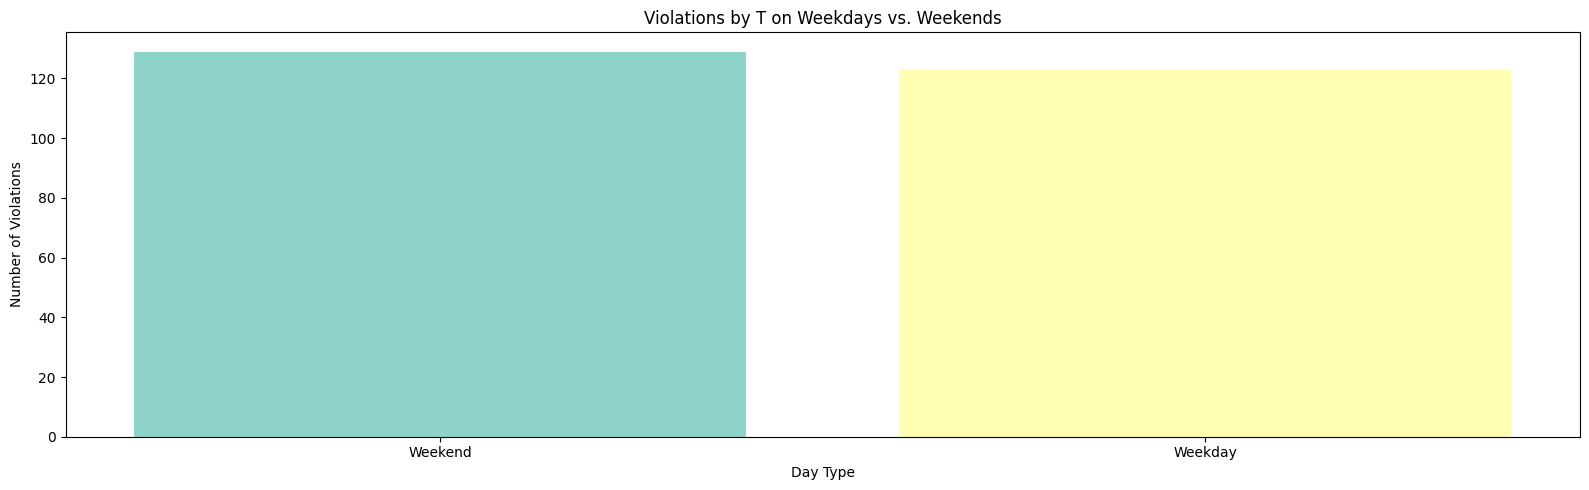

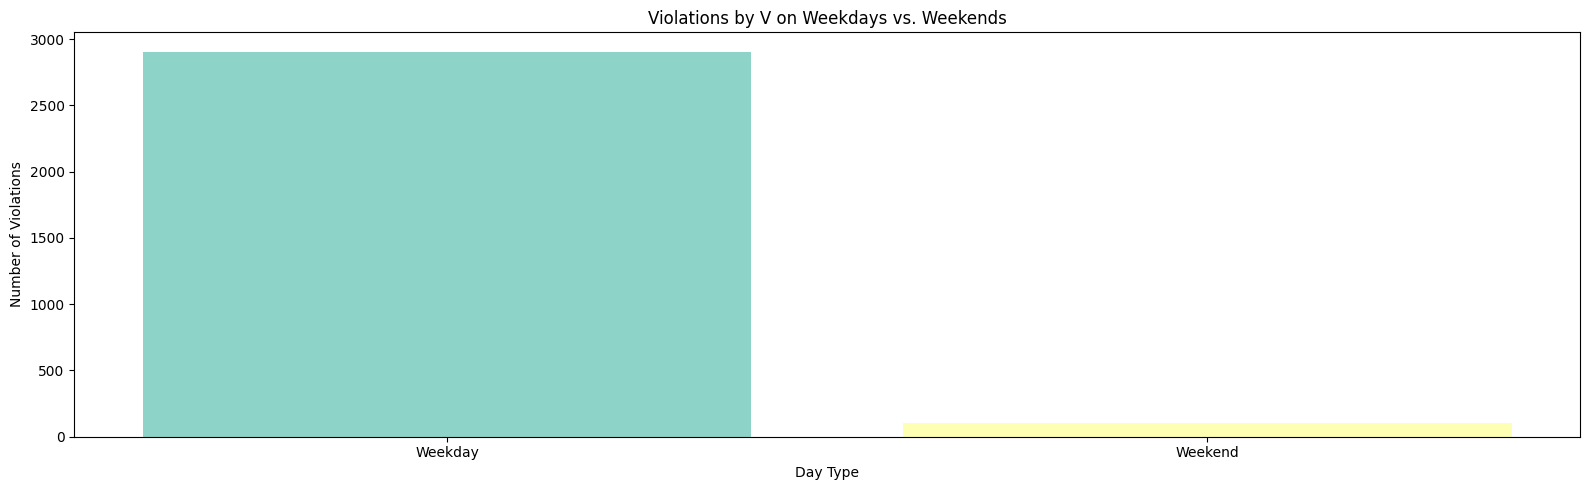

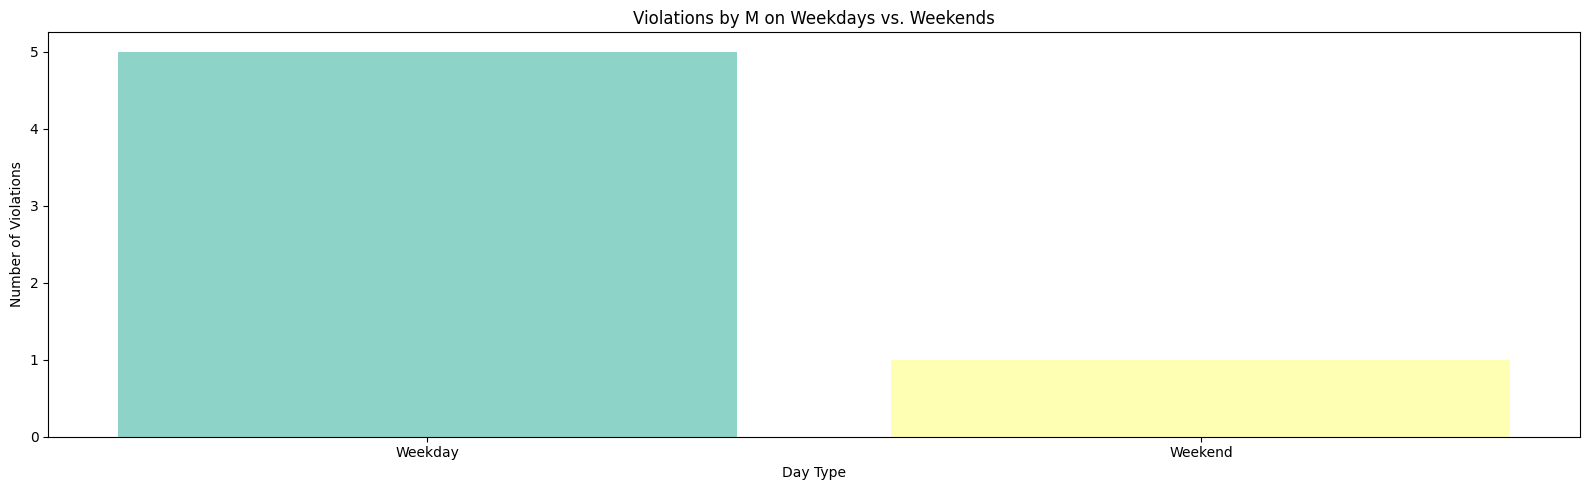

In [123]:
#Weekends Vs Weekdays Violations Analysis

violations_df['ISSUE_DATE'] = pd.to_datetime(violations_df['ISSUE_DATE'], errors='coerce')
violations_df['Date'] = violations_df['ISSUE_DATE'].dt.date
violations_df['Time'] = violations_df['ISSUE_DATE'].dt.time
violations_df['Day_of_Week'] = violations_df['ISSUE_DATE'].dt.day_name()

plt.figure(figsize=(10, 6))
day_counts = violations_df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.bar(day_counts.index, day_counts.values, color=plt.cm.viridis(range(len(day_counts))))
plt.title("Violations by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_50_locations = violations_df['LOCATION'].value_counts().nlargest(50).index
violations_top50 = violations_df[violations_df['LOCATION'].isin(top_50_locations)]

plt.figure(figsize=(20, 8))
location_day_counts = violations_top50.groupby(['Day_of_Week', 'LOCATION']).size().unstack().fillna(0)
plt.imshow(location_day_counts, cmap="YlGnBu", aspect='auto')
plt.title("Violation Counts by Location and Day of the Week (Top 50 Locations)")
plt.xlabel("Location")
plt.ylabel("Day of the Week")
plt.xticks(ticks=range(len(location_day_counts.columns)), labels=location_day_counts.columns, rotation=90)
plt.yticks(ticks=range(len(location_day_counts.index)), labels=location_day_counts.index)
plt.colorbar(label='Violation Count')
for i in range(len(location_day_counts.index)):
    for j in range(len(location_day_counts.columns)):
        count = int(location_day_counts.iloc[i, j])
        if count > 0:
            plt.text(j, i, count, ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

violations_df['Weekend'] = violations_df['Day_of_Week'].isin(['Saturday', 'Sunday']).map({True: 'Weekend', False: 'Weekday'})

violation_types = ['P', 'T', 'V', 'M']
for v_type in violation_types:
    plt.figure(figsize=(16, 5))
    v_data = violations_df[violations_df['VIOLATION_TYPE_DESC'] == v_type]
    weekend_counts = v_data['Weekend'].value_counts()

    plt.bar(weekend_counts.index, weekend_counts.values, color=plt.cm.Set3(range(len(weekend_counts))))
    plt.title(f"Violations by {v_type} on Weekdays vs. Weekends")
    plt.xlabel("Day Type")
    plt.ylabel("Number of Violations")
    plt.tight_layout()
    plt.show()


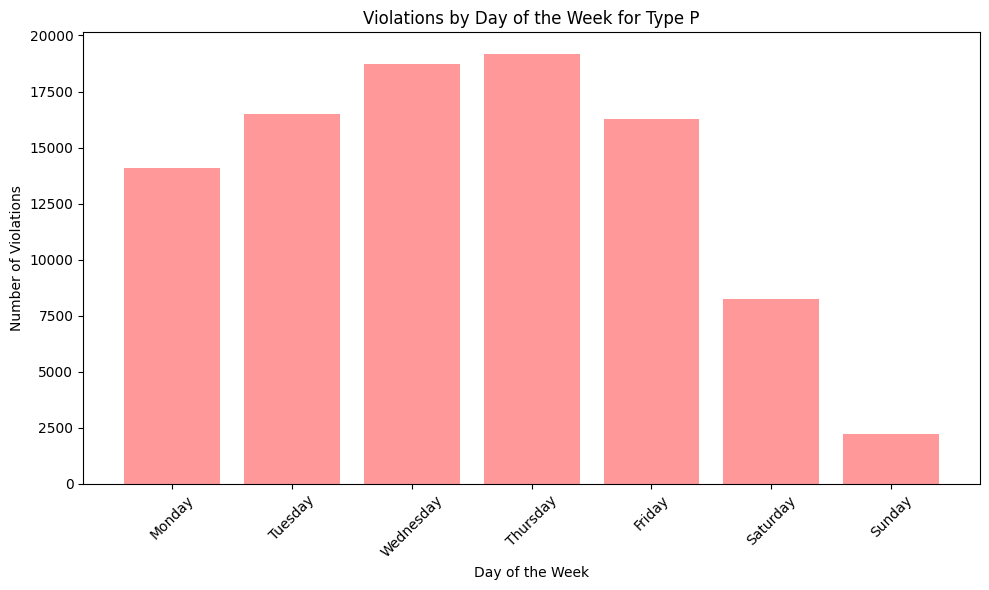

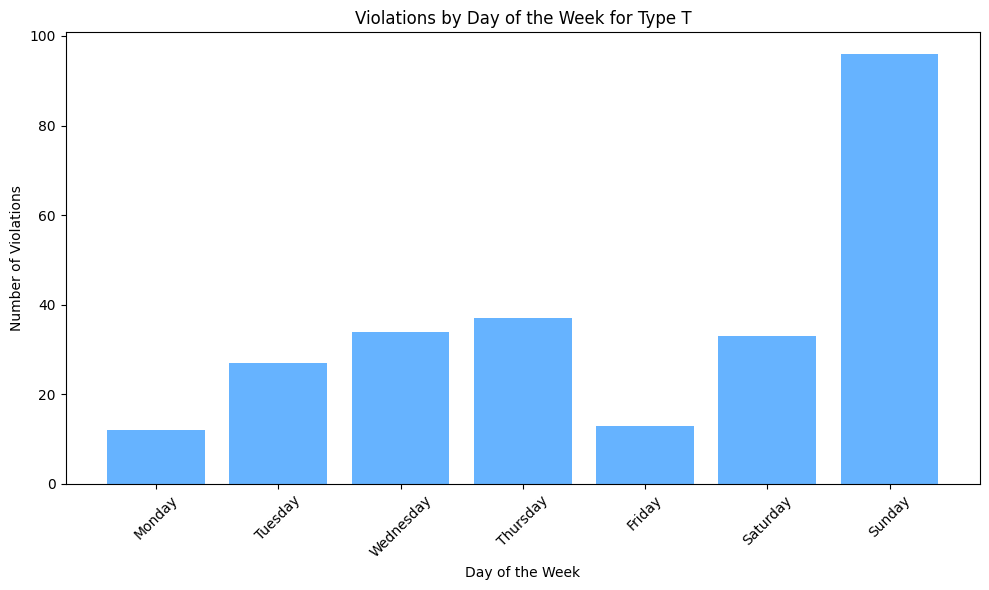

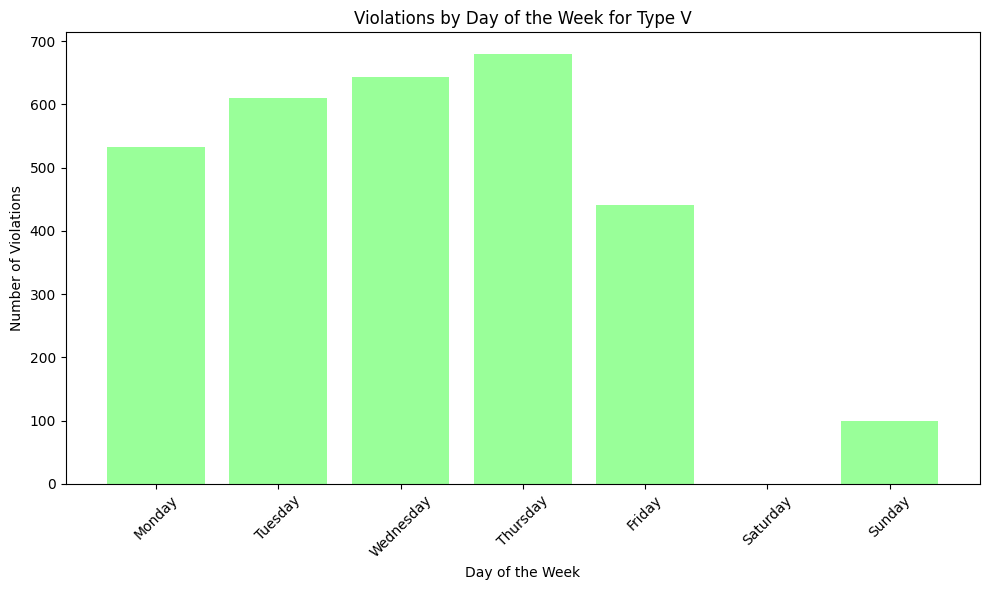

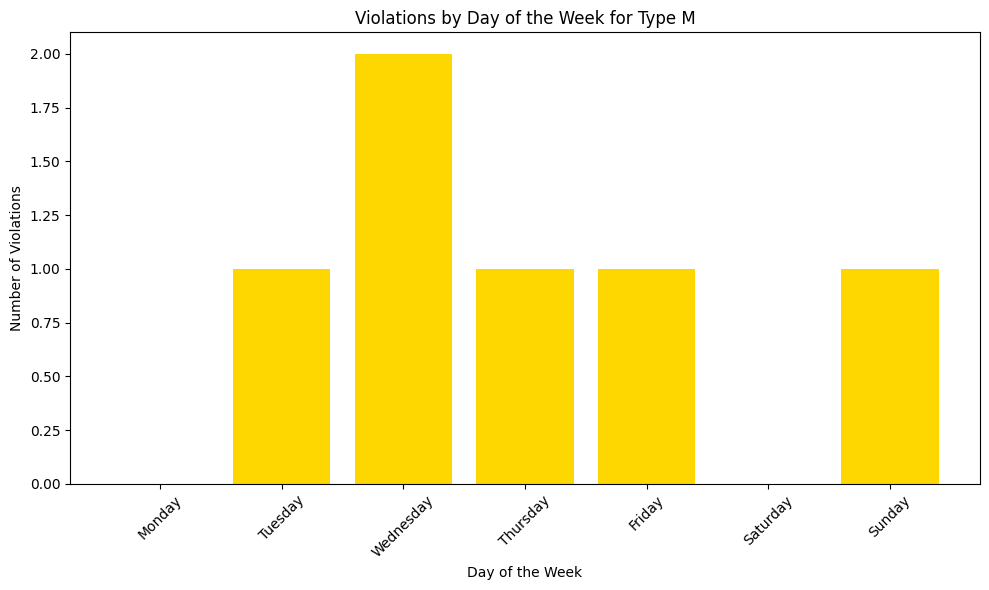

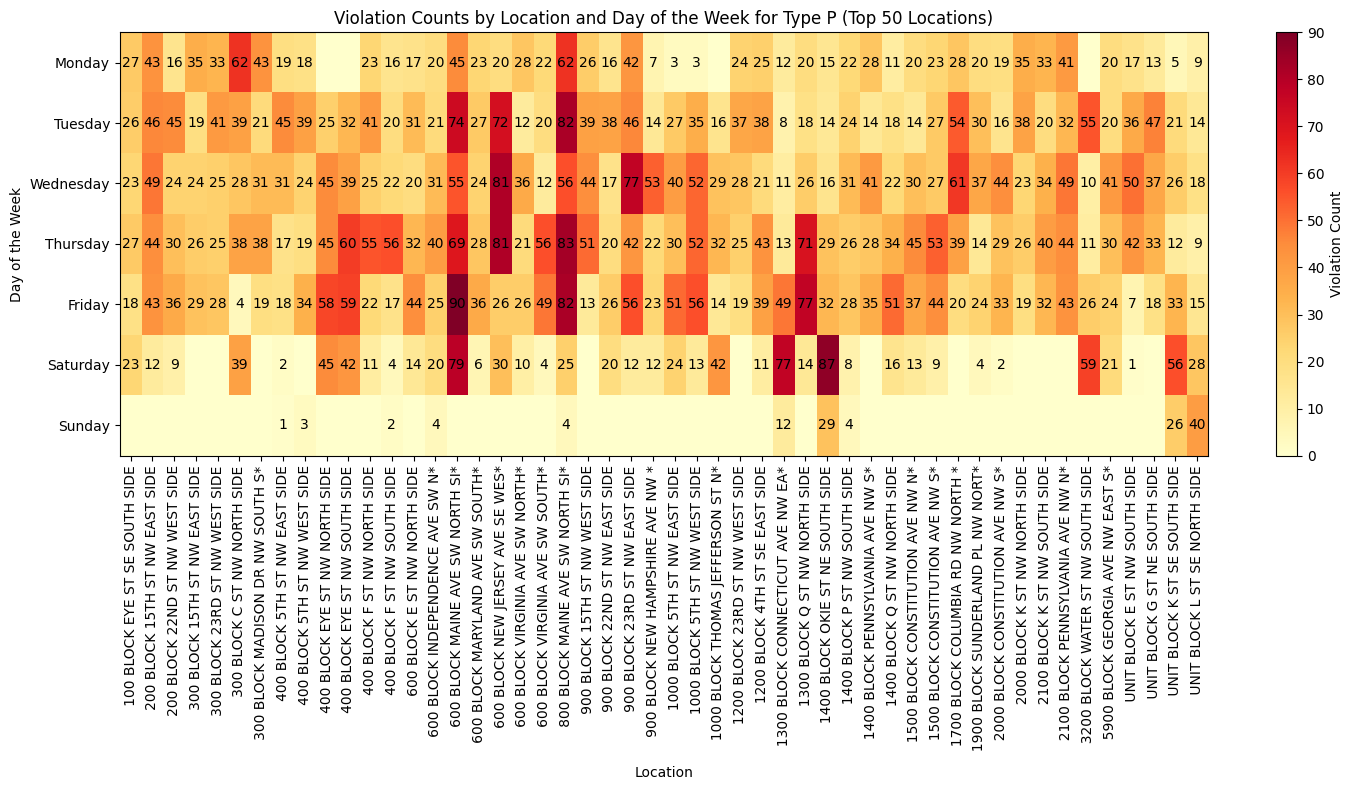

No data available for violation type T in the top 50 locations.


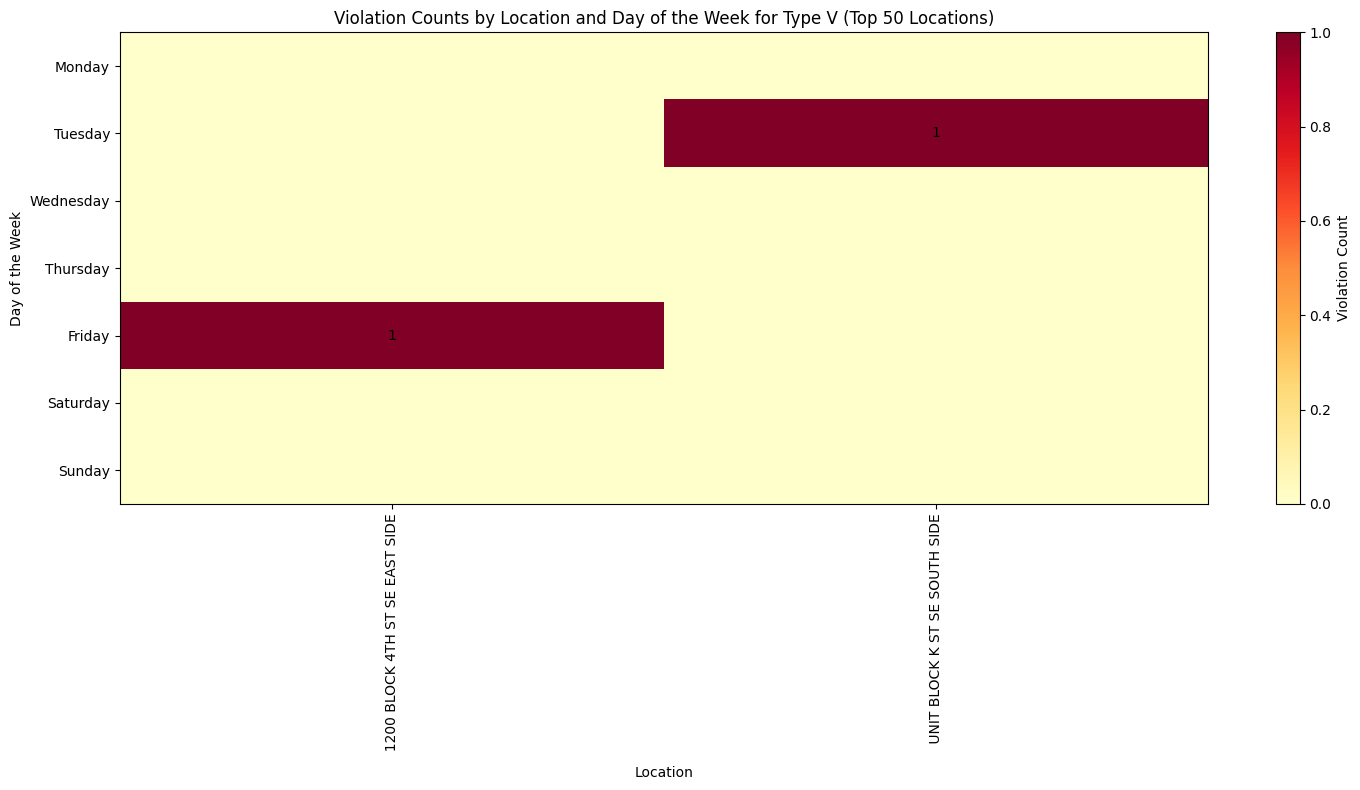

No data available for violation type M in the top 50 locations.


In [124]:
#Violations by Day of the Week with Sub-categorization

violations_df['ISSUE_DATE'] = pd.to_datetime(violations_df['ISSUE_DATE'], errors='coerce')
violations_df['Date'] = violations_df['ISSUE_DATE'].dt.date
violations_df['Time'] = violations_df['ISSUE_DATE'].dt.time
violations_df['Day_of_Week'] = violations_df['ISSUE_DATE'].dt.day_name()

violation_types = ['P', 'T', 'V', 'M']
bar_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']  # Specify custom colors for each type

for v_type, color in zip(violation_types, bar_colors):
    plt.figure(figsize=(10, 6))
    v_data = violations_df[violations_df['VIOLATION_TYPE_DESC'] == v_type]
    day_counts = v_data['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).fillna(0)

    plt.bar(day_counts.index, day_counts.values, color=color)
    plt.title(f"Violations by Day of the Week for Type {v_type}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Violations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

top_50_locations = violations_df['LOCATION'].value_counts().nlargest(50).index
violations_top50 = violations_df[violations_df['LOCATION'].isin(top_50_locations)]

for v_type in violation_types:
    v_data_top50 = violations_top50[violations_top50['VIOLATION_TYPE_DESC'] == v_type]

    if not v_data_top50.empty:
        plt.figure(figsize=(15, 8))
        location_day_counts = (
            v_data_top50
            .groupby(['Day_of_Week', 'LOCATION'])
            .size()
            .unstack()
            .fillna(0)
            .reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
        )

        plt.imshow(location_day_counts, cmap="YlOrRd", aspect='auto')
        plt.title(f"Violation Counts by Location and Day of the Week for Type {v_type} (Top 50 Locations)")
        plt.xlabel("Location")
        plt.ylabel("Day of the Week")
        plt.xticks(ticks=range(len(location_day_counts.columns)), labels=location_day_counts.columns, rotation=90)
        plt.yticks(ticks=range(len(location_day_counts.index)), labels=location_day_counts.index)
        plt.colorbar(label='Violation Count')
        for i in range(len(location_day_counts.index)):
            for j in range(len(location_day_counts.columns)):
                count = int(location_day_counts.iloc[i, j])
                if count > 0:
                    plt.text(j, i, count, ha='center', va='center', color='black')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for violation type {v_type} in the top 50 locations.")


Data Cleaning, Descriptive Statistics, Correlation Analysis, Model Training and Model Testing/ Evaluation


In [125]:
import pandas as pd
file_path = '/content/Parking_Violations_Issued_in_September_2024.csv'
df = pd.read_csv(file_path)
print(df.head())

   OBJECTID  TICKET_NUMBER VIOLATION_TYPE_DESC              ISSUE_DATE  \
0  83487425      260566401                   P  2024/09/05 04:00:00+00   
1  83487426      266969312                   P  2024/09/18 04:00:00+00   
2  83487445      266974724                   P  2024/09/01 04:00:00+00   
3  83487446      266974735                   P  2024/09/08 04:00:00+00   
4  83487447      266974746                   P  2024/09/08 04:00:00+00   

   ISSUE_TIME  ISSUING_AGENCY_CODE                  ISSUING_AGENCY_NAME  \
0         657                   54  ST.ELZBETH HOSPITAL SECURITY GUARDS   
1         133                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
2        1020                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
3        1051                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
4        1108                   59  US. BUREAU OF ENGRAVING AND PRINTNG   

  ISSUING_AGENCY_SHORT VIOLATION_CODE              VIOLATION_PROC_DESC  ...  \
0                  SEH   

<ipython-input-125-ab17f8e91a8b>:3: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [126]:
df. head()

OBJECTID  TICKET_NUMBER VIOLATION_TYPE_DESC              ISSUE_DATE  \
0  83487425      260566401                   P  2024/09/05 04:00:00+00   
1  83487426      266969312                   P  2024/09/18 04:00:00+00   
2  83487445      266974724                   P  2024/09/01 04:00:00+00   
3  83487446      266974735                   P  2024/09/08 04:00:00+00   
4  83487447      266974746                   P  2024/09/08 04:00:00+00   

   ISSUE_TIME  ISSUING_AGENCY_CODE                  ISSUING_AGENCY_NAME  \
0         657                   54  ST.ELZBETH HOSPITAL SECURITY GUARDS   
1         133                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
2        1020                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
3        1051                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
4        1108                   59  US. BUREAU OF ENGRAVING AND PRINTNG   

  ISSUING_AGENCY_SHORT VIOLATION_CODE              VIOLATION_PROC_DESC  ...  \
0                  SEH           P170  FAILURE TO DISPLAY CURRENT TAGS  ...   
1                  BEP           P055               NO PARKING ANYTIME  ...   
2                  BEP           P012         DISOBEYING OFFICIAL SIGN  ...   
3                  BEP           P170  FAILURE TO DISPLAY CURRENT TAGS  ...   
4                  BEP           P170  FAILURE TO DISPLAY CURRENT TAGS  ...   

  PENALTY_2 PENALTY_3  PENALTY_4  PENALTY_5      XCOORD      YCOORD LATITUDE  \
0         0         0          0          0         NaN         NaN      NaN   
1         0         0          0          0         NaN         NaN      NaN   
2         0         0          0          0  397076.780  135370.390   38.886   
3         0         0          0          0  397328.708  135348.587   38.886   
4         0         0          0          0  397328.637  135237.646   38.885   

  LONGITUDE    MAR_ID       GIS_LAST_MOD_DTTM  
0       NaN       NaN  2024/10/16 14:04:18+00  
1       NaN       NaN  2024/10/16 14:04:18+00  
2   -77.034  810050.0  2024/10/16 14:04:18+00  
3   -77.031  805720.0  2024/10/16 14:04:18+00  
4   -77.031  801948.0  2024/10/16 14:04:18+00  

[5 rows x 31 columns]

In [127]:
df.columns

Index(['OBJECTID', 'TICKET_NUMBER', 'VIOLATION_TYPE_DESC', 'ISSUE_DATE',
       'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME',
       'ISSUING_AGENCY_SHORT', 'VIOLATION_CODE', 'VIOLATION_PROC_DESC',
       'LOCATION', 'PLATE_STATE', 'VEHICLE_TYPE', 'MULTI_OWNER_NUMBER',
       'DISPOSITION_CODE', 'DISPOSITION_TYPE', 'DISPOSITION_DESC',
       'DISPOSITION_DATE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1',
       'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'XCOORD', 'YCOORD',
       'LATITUDE', 'LONGITUDE', 'MAR_ID', 'GIS_LAST_MOD_DTTM'],
      dtype='object')

In [128]:
df.describe()

OBJECTID  TICKET_NUMBER    ISSUE_TIME  ISSUING_AGENCY_CODE  \
count  9.849300e+04   9.849300e+04  98493.000000         98493.000000   
mean   8.353837e+07   8.117554e+09   1279.409349            14.955834   
std    2.863504e+04   9.154449e+08    532.987181             2.564396   
min    8.348742e+07   2.605664e+08      0.000000             0.000000   
25%    8.351366e+07   8.270404e+09   1007.000000            15.000000   
50%    8.353854e+07   8.270752e+09   1238.000000            15.000000   
75%    8.356316e+07   8.271058e+09   1634.000000            15.000000   
max    8.358778e+07   8.271938e+09   2359.000000            75.000000   

       VEHICLE_TYPE  MULTI_OWNER_NUMBER  DISPOSITION_CODE   FINE_AMOUNT  \
count           0.0        9.849300e+04      98493.000000  98493.000000   
mean            NaN        4.031885e+07          3.245682     57.804311   
std             NaN        1.911803e+08         19.911205     42.445052   
min             NaN        0.000000e+00          0.000000      0.000000   
25%             NaN        0.000000e+00          0.000000     30.000000   
50%             NaN        0.000000e+00          0.000000     50.000000   
75%             NaN        0.000000e+00          0.000000    100.000000   
max             NaN        9.507155e+08        146.000000   1000.000000   

         TOTAL_PAID     PENALTY_1  PENALTY_2  PENALTY_3  PENALTY_4  PENALTY_5  \
count  98493.000000  98493.000000    98493.0    98493.0    98493.0    98493.0   
mean      19.799681     13.354096        0.0        0.0        0.0        0.0   
std       33.631550     32.540495        0.0        0.0        0.0        0.0   
min        0.000000      0.000000        0.0        0.0        0.0        0.0   
25%        0.000000      0.000000        0.0        0.0        0.0        0.0   
50%        0.000000      0.000000        0.0        0.0        0.0        0.0   
75%       30.000000      0.000000        0.0        0.0        0.0        0.0   
max      500.000000   1000.000000        0.0        0.0        0.0        0.0   

              XCOORD         YCOORD      LATITUDE     LONGITUDE         MAR_ID  
count   97559.000000   97559.000000  97559.000000  97559.000000   97559.000000  
mean   397897.647693  137588.921950     38.906169    -77.024267  788483.108006  
std      2170.219789    2282.570175      0.020555      0.025034  108167.924256  
min    390467.870000  127956.750000     38.819000    -77.110000  -37320.000000  
25%    396523.970000  136402.060000     38.895000    -77.040000  803415.000000  
50%    397750.790000  137425.670000     38.905000    -77.026000  807446.000000  
75%    399081.140000  138713.470000     38.916000    -77.011000  811836.000000  
max    407795.708000  146973.440000     38.991000    -76.910000  913853.000000

In [129]:
df.isnull().sum()

OBJECTID                    0
TICKET_NUMBER               0
VIOLATION_TYPE_DESC         0
ISSUE_DATE                  0
ISSUE_TIME                  0
ISSUING_AGENCY_CODE         0
ISSUING_AGENCY_NAME         0
ISSUING_AGENCY_SHORT        0
VIOLATION_CODE              0
VIOLATION_PROC_DESC         8
LOCATION                    0
PLATE_STATE                 0
VEHICLE_TYPE            98493
MULTI_OWNER_NUMBER          0
DISPOSITION_CODE            0
DISPOSITION_TYPE            0
DISPOSITION_DESC        95241
DISPOSITION_DATE        95241
FINE_AMOUNT                 0
TOTAL_PAID                  0
PENALTY_1                   0
PENALTY_2                   0
PENALTY_3                   0
PENALTY_4                   0
PENALTY_5                   0
XCOORD                    934
YCOORD                    934
LATITUDE                  934
LONGITUDE                 934
MAR_ID                    934
GIS_LAST_MOD_DTTM           0
dtype: int64

In [130]:
column_explanations = {
    'OBJECTID': "Unique identifier for each record in the dataset.",
    'TICKET_NUMBER': "Unique identifier for the parking violation ticket.",
    'VIOLATION_TYPE_DESC': "Description of the type of parking violation (e.g., No Parking, Expired Meter).",
    'ISSUE_DATE': "Date when the parking violation was issued.",
    'ISSUE_TIME': "Time when the parking violation was issued.",
    'ISSUING_AGENCY_CODE': "Code representing the agency that issued the ticket.",
    'ISSUING_AGENCY_NAME': "Full name of the agency that issued the ticket.",
    'ISSUING_AGENCY_SHORT': "Abbreviated name of the issuing agency.",
    'VIOLATION_CODE': "Specific code for the parking violation.",
    'VIOLATION_PROC_DESC': "Description of the violation procedure.",
    'LOCATION': "Location where the violation occurred.",
    'PLATE_STATE': "State of the vehicle's license plate.",
    'VEHICLE_TYPE': "Type of vehicle (e.g., car, truck).",
    'MULTI_OWNER_NUMBER': "Identifier for multiple vehicle owners (if applicable).",
    'DISPOSITION_CODE': "Code indicating the resolution of the violation.",
    'DISPOSITION_TYPE': "Type of disposition (e.g., paid, dismissed).",
    'DISPOSITION_DESC': "Description of the disposition of the violation.",
    'DISPOSITION_DATE': "Date when the violation was resolved.",
    'FINE_AMOUNT': "Amount of the fine for the violation.",
    'TOTAL_PAID': "Total amount paid for the violation.",
    'PENALTY_1': "First penalty associated with the violation (if applicable).",
    'PENALTY_2': "Second penalty associated with the violation (if applicable).",
    'PENALTY_3': "Third penalty associated with the violation (if applicable).",
    'PENALTY_4': "Fourth penalty associated with the violation (if applicable).",
    'PENALTY_5': "Fifth penalty associated with the violation (if applicable).",
    'XCOORD': "X-coordinate of the violation location.",
    'YCOORD': "Y-coordinate of the violation location.",
    'LATITUDE': "Latitude of the violation location.",
    'LONGITUDE': "Longitude of the violation location.",
    'MAR_ID': "Identifier for the violation in the parking management system.",
    'GIS_LAST_MOD_DTTM': "Date and time of the last modification in the GIS system."
}
for col, explanation in column_explanations.items():
  print(f"{col}: {explanation}")

OBJECTID: Unique identifier for each record in the dataset.
TICKET_NUMBER: Unique identifier for the parking violation ticket.
VIOLATION_TYPE_DESC: Description of the type of parking violation (e.g., No Parking, Expired Meter).
ISSUE_DATE: Date when the parking violation was issued.
ISSUE_TIME: Time when the parking violation was issued.
ISSUING_AGENCY_CODE: Code representing the agency that issued the ticket.
ISSUING_AGENCY_NAME: Full name of the agency that issued the ticket.
ISSUING_AGENCY_SHORT: Abbreviated name of the issuing agency.
VIOLATION_CODE: Specific code for the parking violation.
VIOLATION_PROC_DESC: Description of the violation procedure.
LOCATION: Location where the violation occurred.
PLATE_STATE: State of the vehicle's license plate.
VEHICLE_TYPE: Type of vehicle (e.g., car, truck).
MULTI_OWNER_NUMBER: Identifier for multiple vehicle owners (if applicable).
DISPOSITION_CODE: Code indicating the resolution of the violation.
DISPOSITION_TYPE: Type of disposition (e.g.,

In [131]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

OBJECTID                  0.000000
TICKET_NUMBER             0.000000
VIOLATION_TYPE_DESC       0.000000
ISSUE_DATE                0.000000
ISSUE_TIME                0.000000
ISSUING_AGENCY_CODE       0.000000
ISSUING_AGENCY_NAME       0.000000
ISSUING_AGENCY_SHORT      0.000000
VIOLATION_CODE            0.000000
VIOLATION_PROC_DESC       0.008122
LOCATION                  0.000000
PLATE_STATE               0.000000
VEHICLE_TYPE            100.000000
MULTI_OWNER_NUMBER        0.000000
DISPOSITION_CODE          0.000000
DISPOSITION_TYPE          0.000000
DISPOSITION_DESC         96.698243
DISPOSITION_DATE         96.698243
FINE_AMOUNT               0.000000
TOTAL_PAID                0.000000
PENALTY_1                 0.000000
PENALTY_2                 0.000000
PENALTY_3                 0.000000
PENALTY_4                 0.000000
PENALTY_5                 0.000000
XCOORD                    0.948291
YCOORD                    0.948291
LATITUDE                  0.948291
LONGITUDE                 0.948291
MAR_ID                    0.948291
GIS_LAST_MOD_DTTM         0.000000
dtype: float64

In [132]:
df['PLATE_STATE'].unique()

array([' ', 'VA', 'WA', 'MD', 'DC', 'FL', 'NJ', 'GA', 'TX', 'IL', 'MI',
       'WI', 'SC', 'AL', 'WV', 'MO', 'VT', 'CO', 'LA', 'NC', 'NV', 'MN',
       'OK', 'IN', 'OH'], dtype=object)

In [133]:
df['PLATE_STATE'].isnull().sum()

0

In [134]:
df['PLATE_STATE'] = df['PLATE_STATE'].replace(' ', pd.NA)

In [135]:
df['PLATE_STATE']

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
98488    <NA>
98489    <NA>
98490    <NA>
98491    <NA>
98492    <NA>
Name: PLATE_STATE, Length: 98493, dtype: object

In [136]:
df['PLATE_STATE'].isnull().sum()

96742

In [137]:
threshold = 0.10
df = df.dropna(thresh=len(df) * (1-threshold), axis=1)

In [138]:
df.columns

Index(['OBJECTID', 'TICKET_NUMBER', 'VIOLATION_TYPE_DESC', 'ISSUE_DATE',
       'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME',
       'ISSUING_AGENCY_SHORT', 'VIOLATION_CODE', 'VIOLATION_PROC_DESC',
       'LOCATION', 'MULTI_OWNER_NUMBER', 'DISPOSITION_CODE',
       'DISPOSITION_TYPE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1',
       'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'XCOORD', 'YCOORD',
       'LATITUDE', 'LONGITUDE', 'MAR_ID', 'GIS_LAST_MOD_DTTM'],
      dtype='object')

In [139]:
df.isnull().sum()

OBJECTID                  0
TICKET_NUMBER             0
VIOLATION_TYPE_DESC       0
ISSUE_DATE                0
ISSUE_TIME                0
ISSUING_AGENCY_CODE       0
ISSUING_AGENCY_NAME       0
ISSUING_AGENCY_SHORT      0
VIOLATION_CODE            0
VIOLATION_PROC_DESC       8
LOCATION                  0
MULTI_OWNER_NUMBER        0
DISPOSITION_CODE          0
DISPOSITION_TYPE          0
FINE_AMOUNT               0
TOTAL_PAID                0
PENALTY_1                 0
PENALTY_2                 0
PENALTY_3                 0
PENALTY_4                 0
PENALTY_5                 0
XCOORD                  934
YCOORD                  934
LATITUDE                934
LONGITUDE               934
MAR_ID                  934
GIS_LAST_MOD_DTTM         0
dtype: int64

In [140]:
df.shape

(98493, 27)

In [141]:
df = df.dropna(subset=['XCOORD'])

In [142]:
df.shape

(97559, 27)

In [143]:
df.isnull().sum()

OBJECTID                0
TICKET_NUMBER           0
VIOLATION_TYPE_DESC     0
ISSUE_DATE              0
ISSUE_TIME              0
ISSUING_AGENCY_CODE     0
ISSUING_AGENCY_NAME     0
ISSUING_AGENCY_SHORT    0
VIOLATION_CODE          0
VIOLATION_PROC_DESC     7
LOCATION                0
MULTI_OWNER_NUMBER      0
DISPOSITION_CODE        0
DISPOSITION_TYPE        0
FINE_AMOUNT             0
TOTAL_PAID              0
PENALTY_1               0
PENALTY_2               0
PENALTY_3               0
PENALTY_4               0
PENALTY_5               0
XCOORD                  0
YCOORD                  0
LATITUDE                0
LONGITUDE               0
MAR_ID                  0
GIS_LAST_MOD_DTTM       0
dtype: int64

In [144]:
df['VIOLATION_PROC_DESC'].unique()

array(['DISOBEYING OFFICIAL SIGN', 'FAILURE TO DISPLAY CURRENT TAGS',
       'PARK MORE THAN 12 INCHES FROM CURB',
       'NO STOPPING OR STANDING IN AM RUSH HOUR ZONE', 'NO FRONT TAGS.',
       'INDIVID W/ DISABILITIES ONLY UNAUTH. USE RSRVD SP', nan,
       'PARK IN A BUS ZONE', 'NO PARKING ANYTIME',
       'METER, FAIL TO DEPOSIT PAYMENT',
       'UNAUTHORIZED VEHICLE IN LOADING ZONE',
       'VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CONSENT',
       'PARK IN OFFICIAL PARKING PERMIT ONLY SPACE',
       'PARK ON SIDEWALK OR AREA RESERVED FOR PEDESTRIANS',
       'GOVERNMENT VEHICLE PARKING ONLY', 'PARK AT EXPIRED METER',
       'PARK IN RESERVED EMBASSY SPACE', 'STAND OR PARK IN ALLEY',
       'FAIL TO DISPLAY CURRENT INSPECTION STICKER',
       'OBSTRUCTING CROSSWALK',
       'NO STOPPING OR STANDING IN PM RUSH HOUR ZONE',
       'PARK WITHIN 10 FEET OF A FIRE HYDRANT', 'NO STANDING ANYTIME',
       'PARK IN BUS STOP OR ZONE DURING RUSH HOUR',
       'IMPROPER DISPLAY OF TAGS', 'I

In [145]:
df['VIOLATION_PROC_DESC'] = df['VIOLATION_PROC_DESC'].replace(' ', pd.NA)

In [146]:
df['VIOLATION_PROC_DESC'].isnull().sum()

2970

In [147]:
df['VIOLATION_PROC_DESC'].count()

94589

In [148]:
null_violation_rows = df[df['VIOLATION_PROC_DESC'].isnull()]
null_violation_rows

OBJECTID  TICKET_NUMBER VIOLATION_TYPE_DESC              ISSUE_DATE  \
18     83487461      266974886                   P  2024/09/21 04:00:00+00   
36     83487481      276512854                   P  2024/09/04 04:00:00+00   
280    83488185      292500600                   M  2024/09/01 04:00:00+00   
398    83488412      293521292                   M  2024/09/18 04:00:00+00   
477    83488569      294974481                   M  2024/09/18 04:00:00+00   
...         ...            ...                 ...                     ...   
95878  83585168     8271539415                   V  2024/09/30 04:00:00+00   
95879  83585169     8271539426                   V  2024/09/30 04:00:00+00   
95880  83585170     8271539430                   V  2024/09/30 04:00:00+00   
95881  83585171     8271539441                   V  2024/09/30 04:00:00+00   
95882  83585172     8271539452                   V  2024/09/30 04:00:00+00   

       ISSUE_TIME  ISSUING_AGENCY_CODE                  ISSUING_AGENCY_NAME  \
18           1050                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
36           1455                   51   PROTECTIVE SERVICES DEPT (DC GOVT)   
280           510                    2   METROPOLITAN POLICE DPT-DISTRICT 2   
398           945                    1   METROPOLITAN POLICE DPT-DISTRICT 1   
477          1400                    1   METROPOLITAN POLICE DPT-DISTRICT 1   
...           ...                  ...                                  ...   
95878         351                   15           DEPARTMENT OF PUBLIC WORKS   
95879         352                   15           DEPARTMENT OF PUBLIC WORKS   
95880         400                   15           DEPARTMENT OF PUBLIC WORKS   
95881         402                   15           DEPARTMENT OF PUBLIC WORKS   
95882         501                   15           DEPARTMENT OF PUBLIC WORKS   

      ISSUING_AGENCY_SHORT VIOLATION_CODE VIOLATION_PROC_DESC  ... PENALTY_2  \
18                     BEP        NO VIOL                 NaN  ...         0   
36                     PSD        NO VIOL                 NaN  ...         0   
280                 MPD-2D        NO VIOL                 NaN  ...         0   
398                 MPD-1D        NO VIOL                 NaN  ...         0   
477                 MPD-1D        NO VIOL                 NaN  ...         0   
...                    ...            ...                 ...  ...       ...   
95878                  DPW           P076                <NA>  ...         0   
95879                  DPW           P076                <NA>  ...         0   
95880                  DPW           P076                <NA>  ...         0   
95881                  DPW           P076                <NA>  ...         0   
95882                  DPW           P076                <NA>  ...         0   

       PENALTY_3  PENALTY_4 PENALTY_5      XCOORD     YCOORD  LATITUDE  \
18             0          0         0  397430.047  135293.16    38.885   
36             0          0         0  397379.120  136343.99    38.895   
280            0          0         0  396456.220  137483.23    38.905   
398            0          0         0  400734.993  135441.54    38.887   
477            0          0         0  400457.480  136955.07    38.900   
...          ...        ...       ...         ...        ...       ...   
95878          0          0         0  397329.970  138713.44    38.916   
95879          0          0         0  397329.970  138713.44    38.916   
95880          0          0         0  397497.840  138634.14    38.916   
95881          0          0         0  397497.840  138634.14    38.916   
95882          0          0         0  400489.360  137318.79    38.904   

       LONGITUDE    MAR_ID       GIS_LAST_MOD_DTTM  
18       -77.030  803859.0  2024/10/16 14:04:18+00  
36       -77.030  293198.0  2024/10/16 14:04:18+00  
280      -77.041  814800.0  2024/10/16 14:04:19+00  
398      -76.992  801421.0  2024/10/16 14:04:19+00  
477   

In [149]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(' ', pd.NA)

In [150]:
df.isnull().sum()

OBJECTID                   0
TICKET_NUMBER              0
VIOLATION_TYPE_DESC        0
ISSUE_DATE                 0
ISSUE_TIME                 0
ISSUING_AGENCY_CODE        0
ISSUING_AGENCY_NAME        0
ISSUING_AGENCY_SHORT       0
VIOLATION_CODE             0
VIOLATION_PROC_DESC     2970
LOCATION                   0
MULTI_OWNER_NUMBER         0
DISPOSITION_CODE           0
DISPOSITION_TYPE           0
FINE_AMOUNT                0
TOTAL_PAID                 0
PENALTY_1                  0
PENALTY_2                  0
PENALTY_3                  0
PENALTY_4                  0
PENALTY_5                  0
XCOORD                     0
YCOORD                     0
LATITUDE                   0
LONGITUDE                  0
MAR_ID                     0
GIS_LAST_MOD_DTTM          0
dtype: int64

In [151]:
df = df.dropna(subset=['VIOLATION_PROC_DESC'])

In [152]:
df.shape

(94589, 27)

In [153]:
df.isnull().sum()

OBJECTID                0
TICKET_NUMBER           0
VIOLATION_TYPE_DESC     0
ISSUE_DATE              0
ISSUE_TIME              0
ISSUING_AGENCY_CODE     0
ISSUING_AGENCY_NAME     0
ISSUING_AGENCY_SHORT    0
VIOLATION_CODE          0
VIOLATION_PROC_DESC     0
LOCATION                0
MULTI_OWNER_NUMBER      0
DISPOSITION_CODE        0
DISPOSITION_TYPE        0
FINE_AMOUNT             0
TOTAL_PAID              0
PENALTY_1               0
PENALTY_2               0
PENALTY_3               0
PENALTY_4               0
PENALTY_5               0
XCOORD                  0
YCOORD                  0
LATITUDE                0
LONGITUDE               0
MAR_ID                  0
GIS_LAST_MOD_DTTM       0
dtype: int64

In [154]:
import pandas as pd
try:
    df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_DATE'])
    df['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df['GIS_LAST_MOD_DTTM'])
    df['ISSUE_DATE_ONLY'] = df['ISSUE_DATE'].dt.date
    df['ISSUE_TIME_ONLY'] = df['ISSUE_DATE'].dt.time

    df['GIS_LAST_MOD_DATE'] = df['GIS_LAST_MOD_DTTM'].dt.date
    df['GIS_LAST_MOD_TIME'] = df['GIS_LAST_MOD_DTTM'].dt.time

    print(df[['ISSUE_DATE', 'ISSUE_DATE_ONLY', 'ISSUE_TIME_ONLY', 'GIS_LAST_MOD_DTTM', 'GIS_LAST_MOD_DATE', 'GIS_LAST_MOD_TIME']].head())

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except pd.errors.OutOfBoundsDatetime as e:
    print(f"Error converting datetime: {e}. Check the format of your date/time columns.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

                 ISSUE_DATE ISSUE_DATE_ONLY ISSUE_TIME_ONLY  \
2 2024-09-01 04:00:00+00:00      2024-09-01        04:00:00   
3 2024-09-08 04:00:00+00:00      2024-09-08        04:00:00   
4 2024-09-08 04:00:00+00:00      2024-09-08        04:00:00   
5 2024-09-08 04:00:00+00:00      2024-09-08        04:00:00   
6 2024-09-08 04:00:00+00:00      2024-09-08        04:00:00   

          GIS_LAST_MOD_DTTM GIS_LAST_MOD_DATE GIS_LAST_MOD_TIME  
2 2024-10-16 14:04:18+00:00        2024-10-16          14:04:18  
3 2024-10-16 14:04:18+00:00        2024-10-16          14:04:18  
4 2024-10-16 14:04:18+00:00        2024-10-16          14:04:18  
5 2024-10-16 14:04:18+00:00        2024-10-16          14:04:18  
6 2024-10-16 14:04:18+00:00        2024-10-16          14:04:18  


In [155]:
try:
    df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_DATE'])
    df['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df['GIS_LAST_MOD_DTTM'])
    df['ISSUE_YEAR'] = df['ISSUE_DATE'].dt.year
    df['ISSUE_MONTH'] = df['ISSUE_DATE'].dt.month
    df['ISSUE_DAY'] = df['ISSUE_DATE'].dt.day
    df['ISSUE_HOUR'] = df['ISSUE_DATE'].dt.hour
    df['ISSUE_MINUTE'] = df['ISSUE_DATE'].dt.minute
    df['ISSUE_SECOND'] = df['ISSUE_DATE'].dt.second

    df['GIS_YEAR'] = df['GIS_LAST_MOD_DTTM'].dt.year
    df['GIS_MONTH'] = df['GIS_LAST_MOD_DTTM'].dt.month
    df['GIS_DAY'] = df['GIS_LAST_MOD_DTTM'].dt.day
    df['GIS_HOUR'] = df['GIS_LAST_MOD_DTTM'].dt.hour
    df['GIS_MINUTE'] = df['GIS_LAST_MOD_DTTM'].dt.minute
    df['GIS_SECOND'] = df['GIS_LAST_MOD_DTTM'].dt.second
    print(df[['ISSUE_DATE', 'ISSUE_YEAR', 'ISSUE_MONTH', 'ISSUE_DAY', 'ISSUE_HOUR', 'ISSUE_MINUTE', 'ISSUE_SECOND',
             'GIS_LAST_MOD_DTTM', 'GIS_YEAR', 'GIS_MONTH', 'GIS_DAY', 'GIS_HOUR', 'GIS_MINUTE', 'GIS_SECOND']].head())

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except pd.errors.OutOfBoundsDatetime as e:
    print(f"Error converting datetime: {e}. Check the format of your date/time columns.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

                 ISSUE_DATE  ISSUE_YEAR  ISSUE_MONTH  ISSUE_DAY  ISSUE_HOUR  \
2 2024-09-01 04:00:00+00:00        2024            9          1           4   
3 2024-09-08 04:00:00+00:00        2024            9          8           4   
4 2024-09-08 04:00:00+00:00        2024            9          8           4   
5 2024-09-08 04:00:00+00:00        2024            9          8           4   
6 2024-09-08 04:00:00+00:00        2024            9          8           4   

   ISSUE_MINUTE  ISSUE_SECOND         GIS_LAST_MOD_DTTM  GIS_YEAR  GIS_MONTH  \
2             0             0 2024-10-16 14:04:18+00:00      2024         10   
3             0             0 2024-10-16 14:04:18+00:00      2024         10   
4             0             0 2024-10-16 14:04:18+00:00      2024         10   
5             0             0 2024-10-16 14:04:18+00:00      2024         10   
6             0             0 2024-10-16 14:04:18+00:00      2024         10   

   GIS_DAY  GIS_HOUR  GIS_MINUTE  GIS_SECOND

In [156]:
df

OBJECTID  TICKET_NUMBER VIOLATION_TYPE_DESC                ISSUE_DATE  \
2      83487445      266974724                   P 2024-09-01 04:00:00+00:00   
3      83487446      266974735                   P 2024-09-08 04:00:00+00:00   
4      83487447      266974746                   P 2024-09-08 04:00:00+00:00   
5      83487448      266974750                   P 2024-09-08 04:00:00+00:00   
6      83487449      266974761                   P 2024-09-08 04:00:00+00:00   
...         ...            ...                 ...                       ...   
98488  83587778     8271938231                   P 2024-09-30 04:00:00+00:00   
98489  83587779     8271938242                   P 2024-09-30 04:00:00+00:00   
98490  83587780     8271938253                   P 2024-09-30 04:00:00+00:00   
98491  83587781     8271938264                   P 2024-09-30 04:00:00+00:00   
98492  83587782     8271938275                   P 2024-09-30 04:00:00+00:00   

       ISSUE_TIME  ISSUING_AGENCY_CODE                  ISSUING_AGENCY_NAME  \
2            1020                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
3            1051                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
4            1108                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
5            1111                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
6            1113                   59  US. BUREAU OF ENGRAVING AND PRINTNG   
...           ...                  ...                                  ...   
98488        1535                   15           DEPARTMENT OF PUBLIC WORKS   
98489        1638                   15           DEPARTMENT OF PUBLIC WORKS   
98490        1639                   15           DEPARTMENT OF PUBLIC WORKS   
98491        1640                   15           DEPARTMENT OF PUBLIC WORKS   
98492        1641                   15           DEPARTMENT OF PUBLIC WORKS   

      ISSUING_AGENCY_SHORT VIOLATION_CODE  \
2                      BEP           P012   
3                      BEP           P170   
4                      BEP           P170   
5                      BEP           P170   
6                      BEP           P170   
...                    ...            ...   
98488                  DPW           P012   
98489                  DPW           P259   
98490                  DPW           P170   
98491                  DPW           P259   
98492                  DPW           P259   

                                VIOLATION_PROC_DESC  ... ISSUE_DAY  \
2                          DISOBEYING OFFICIAL SIGN  ...         1   
3                   FAILURE TO DISPLAY CURRENT TAGS  ...         8   
4                   FAILURE TO DISPLAY CURRENT TAGS  ...         8   
5                   FAILURE TO DISPLAY CURRENT TAGS  ...         8   
6                   FAILURE TO DISPLAY CURRENT TAGS  ...         8   
...                                             ...  ...       ...   
98488                      DISOBEYING OFFICIAL SIGN  ...        30   
98489  NO STOPPING OR STANDING IN PM RUSH HOUR ZONE  ...        30   
98490               FAILURE TO DISPLAY CURRENT TAGS  ...        30   
98491  NO STOPPING OR STANDING IN PM RUSH HOUR ZONE  ...        30   
98492  NO STOPPING OR STANDING IN PM RUSH HOUR ZONE  ...        30   

       ISSUE_HOUR  ISSUE_MINUTE ISSUE_SECOND  GIS_YEAR  GIS_MONTH  GIS_DAY  \
2               4             0            0      2024         10       16   
3               4             0            0      2024         10       16   
4               4             0            0      2024         10       16   
5               4             0            0      2024         10       16   
6               4             0            0      2024         10       16   
...           ...           ...          ...       ...        ...      ...   
98488           4             0            0      2024         10       16   
98489           4             0            0      2024         10       16   
98490        

In [157]:
df = df.drop(['ISSUE_DATE', 'GIS_LAST_MOD_DTTM'], axis=1, errors='ignore')

In [158]:
df.isnull().sum()

OBJECTID                0
TICKET_NUMBER           0
VIOLATION_TYPE_DESC     0
ISSUE_TIME              0
ISSUING_AGENCY_CODE     0
ISSUING_AGENCY_NAME     0
ISSUING_AGENCY_SHORT    0
VIOLATION_CODE          0
VIOLATION_PROC_DESC     0
LOCATION                0
MULTI_OWNER_NUMBER      0
DISPOSITION_CODE        0
DISPOSITION_TYPE        0
FINE_AMOUNT             0
TOTAL_PAID              0
PENALTY_1               0
PENALTY_2               0
PENALTY_3               0
PENALTY_4               0
PENALTY_5               0
XCOORD                  0
YCOORD                  0
LATITUDE                0
LONGITUDE               0
MAR_ID                  0
ISSUE_DATE_ONLY         0
ISSUE_TIME_ONLY         0
GIS_LAST_MOD_DATE       0
GIS_LAST_MOD_TIME       0
ISSUE_YEAR              0
ISSUE_MONTH             0
ISSUE_DAY               0
ISSUE_HOUR              0
ISSUE_MINUTE            0
ISSUE_SECOND            0
GIS_YEAR                0
GIS_MONTH               0
GIS_DAY                 0
GIS_HOUR                0
GIS_MINUTE              0
GIS_SECOND              0
dtype: int64

In [159]:
df.shape

(94589, 41)

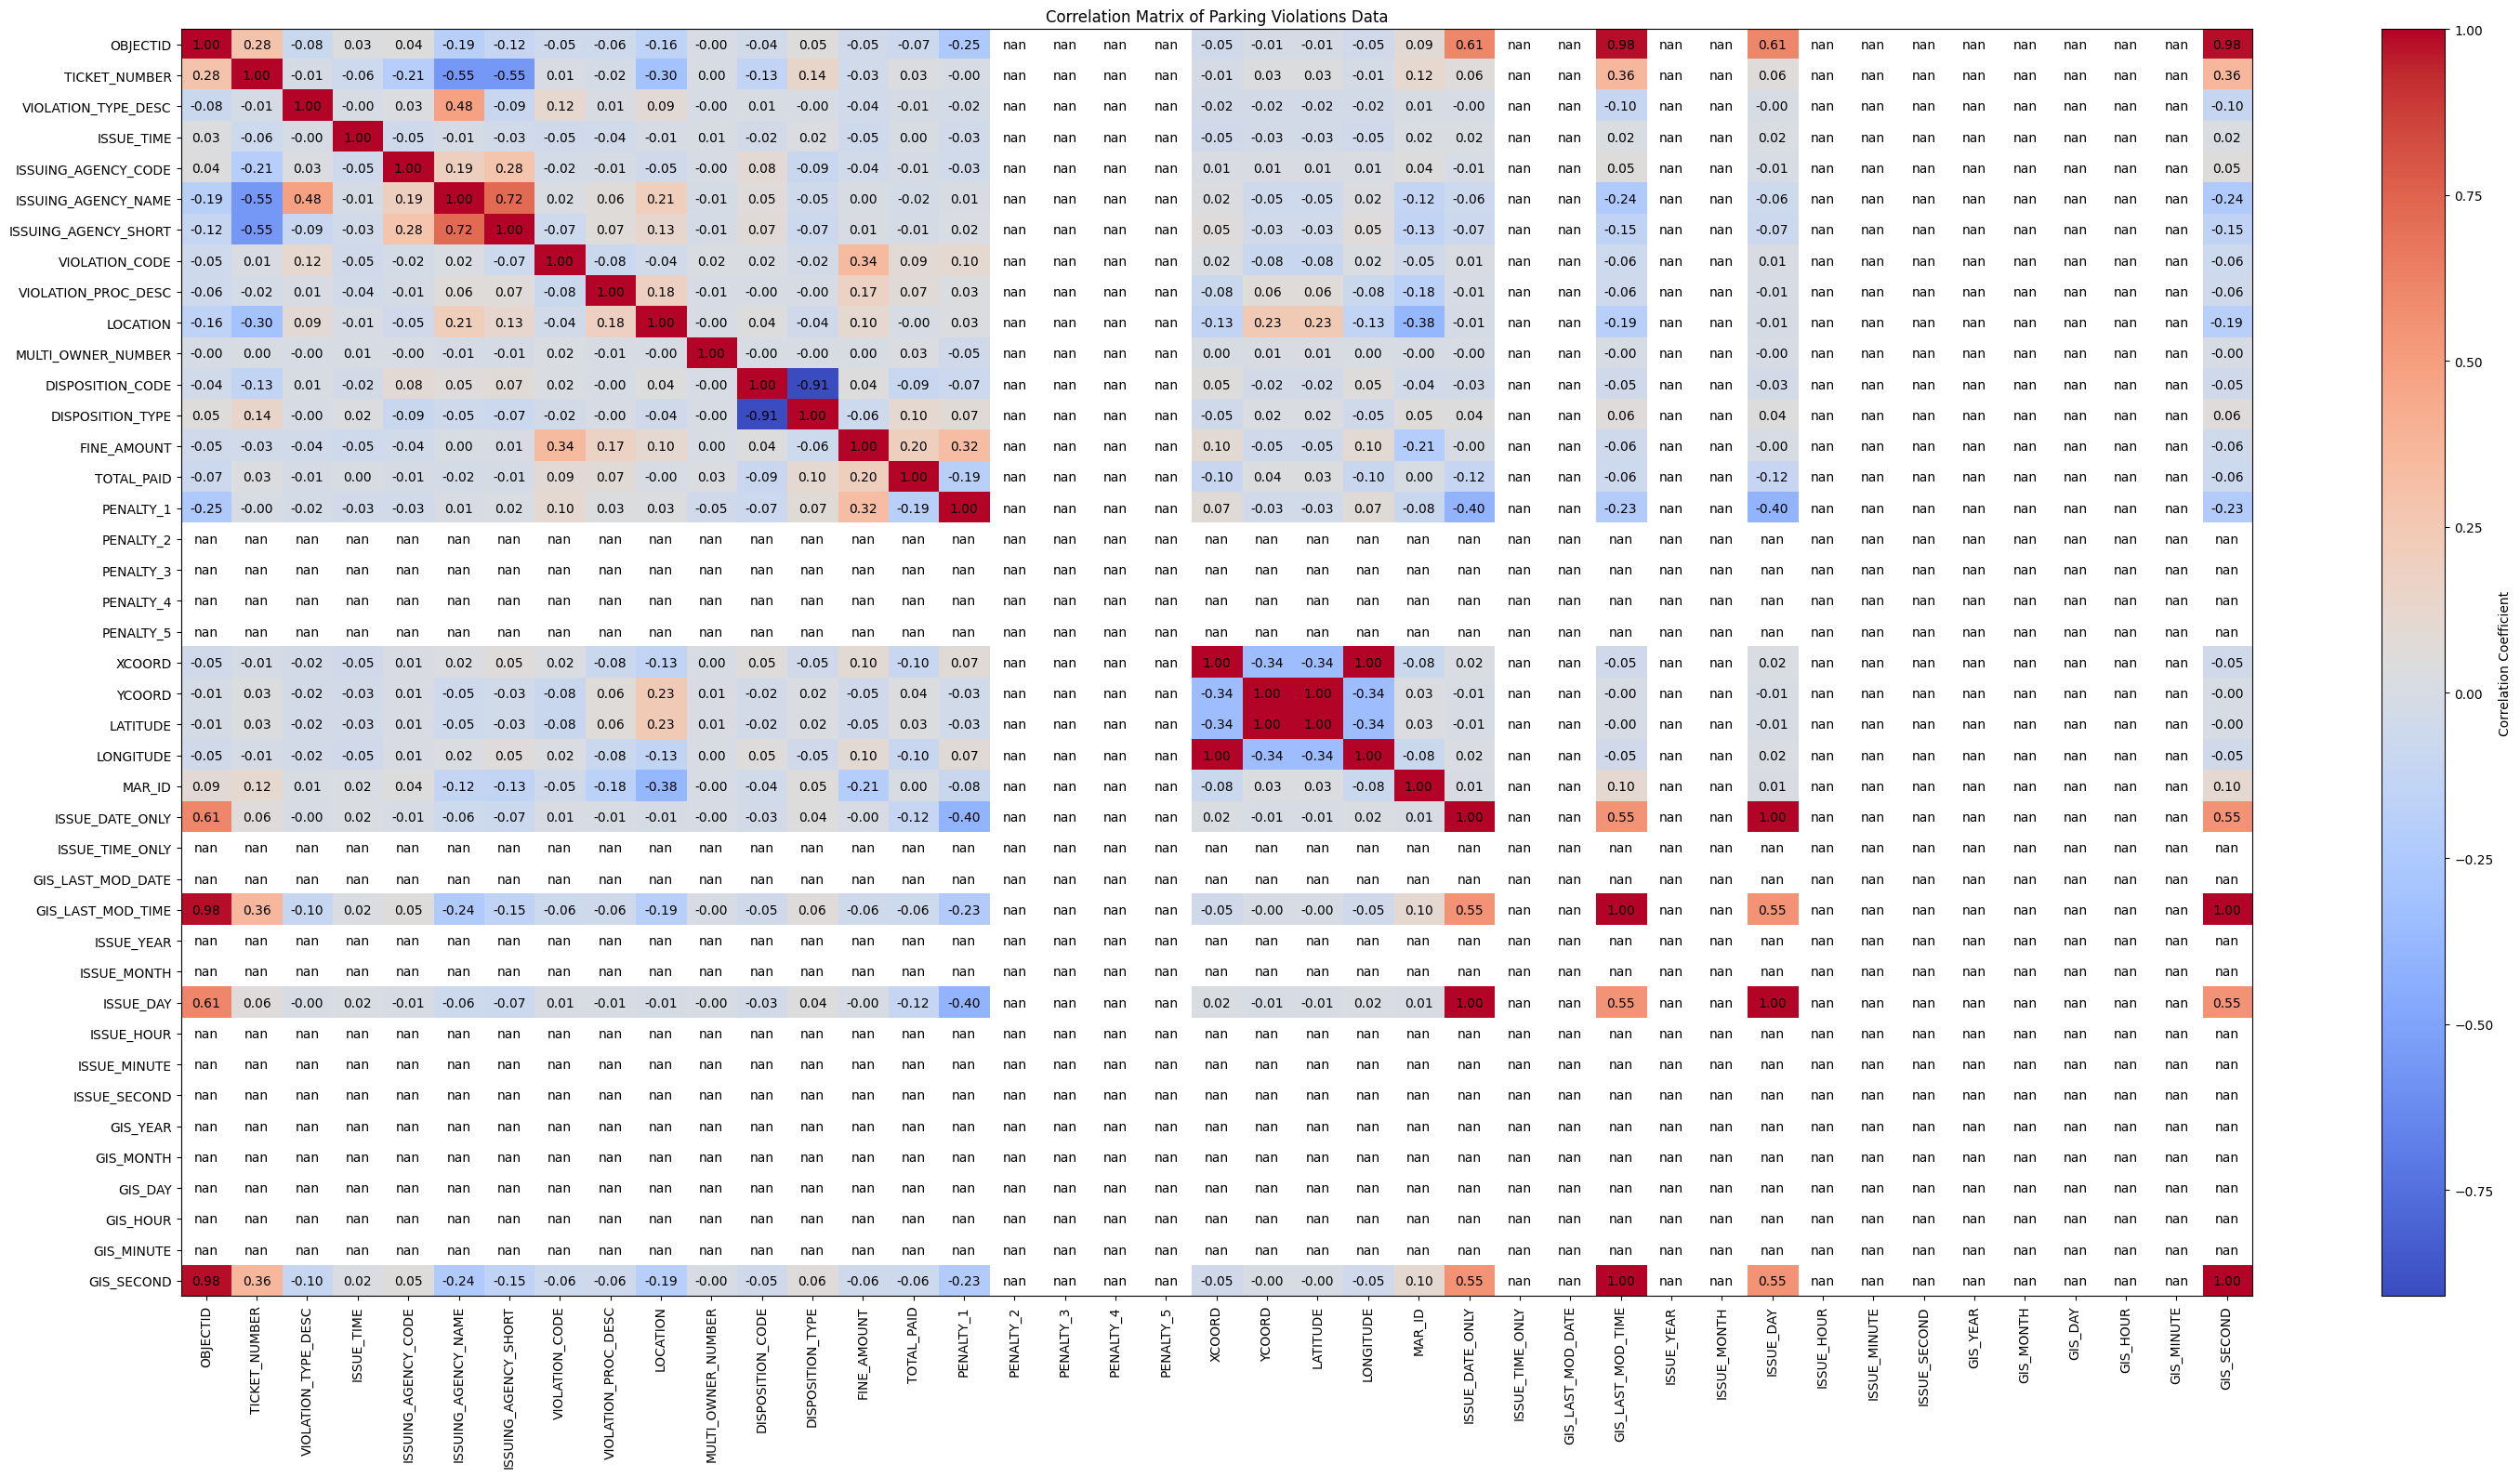

In [160]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

object_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in object_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except TypeError as e:
        print(f"Error encoding column '{col}': {e}")
    except Exception as e:
        print(f"An unexpected error occurred while encoding '{col}': {e}")
correlation_matrix = df.corr()
plt.figure(figsize=(30, 16))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Matrix of Parking Violations Data")
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index)
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

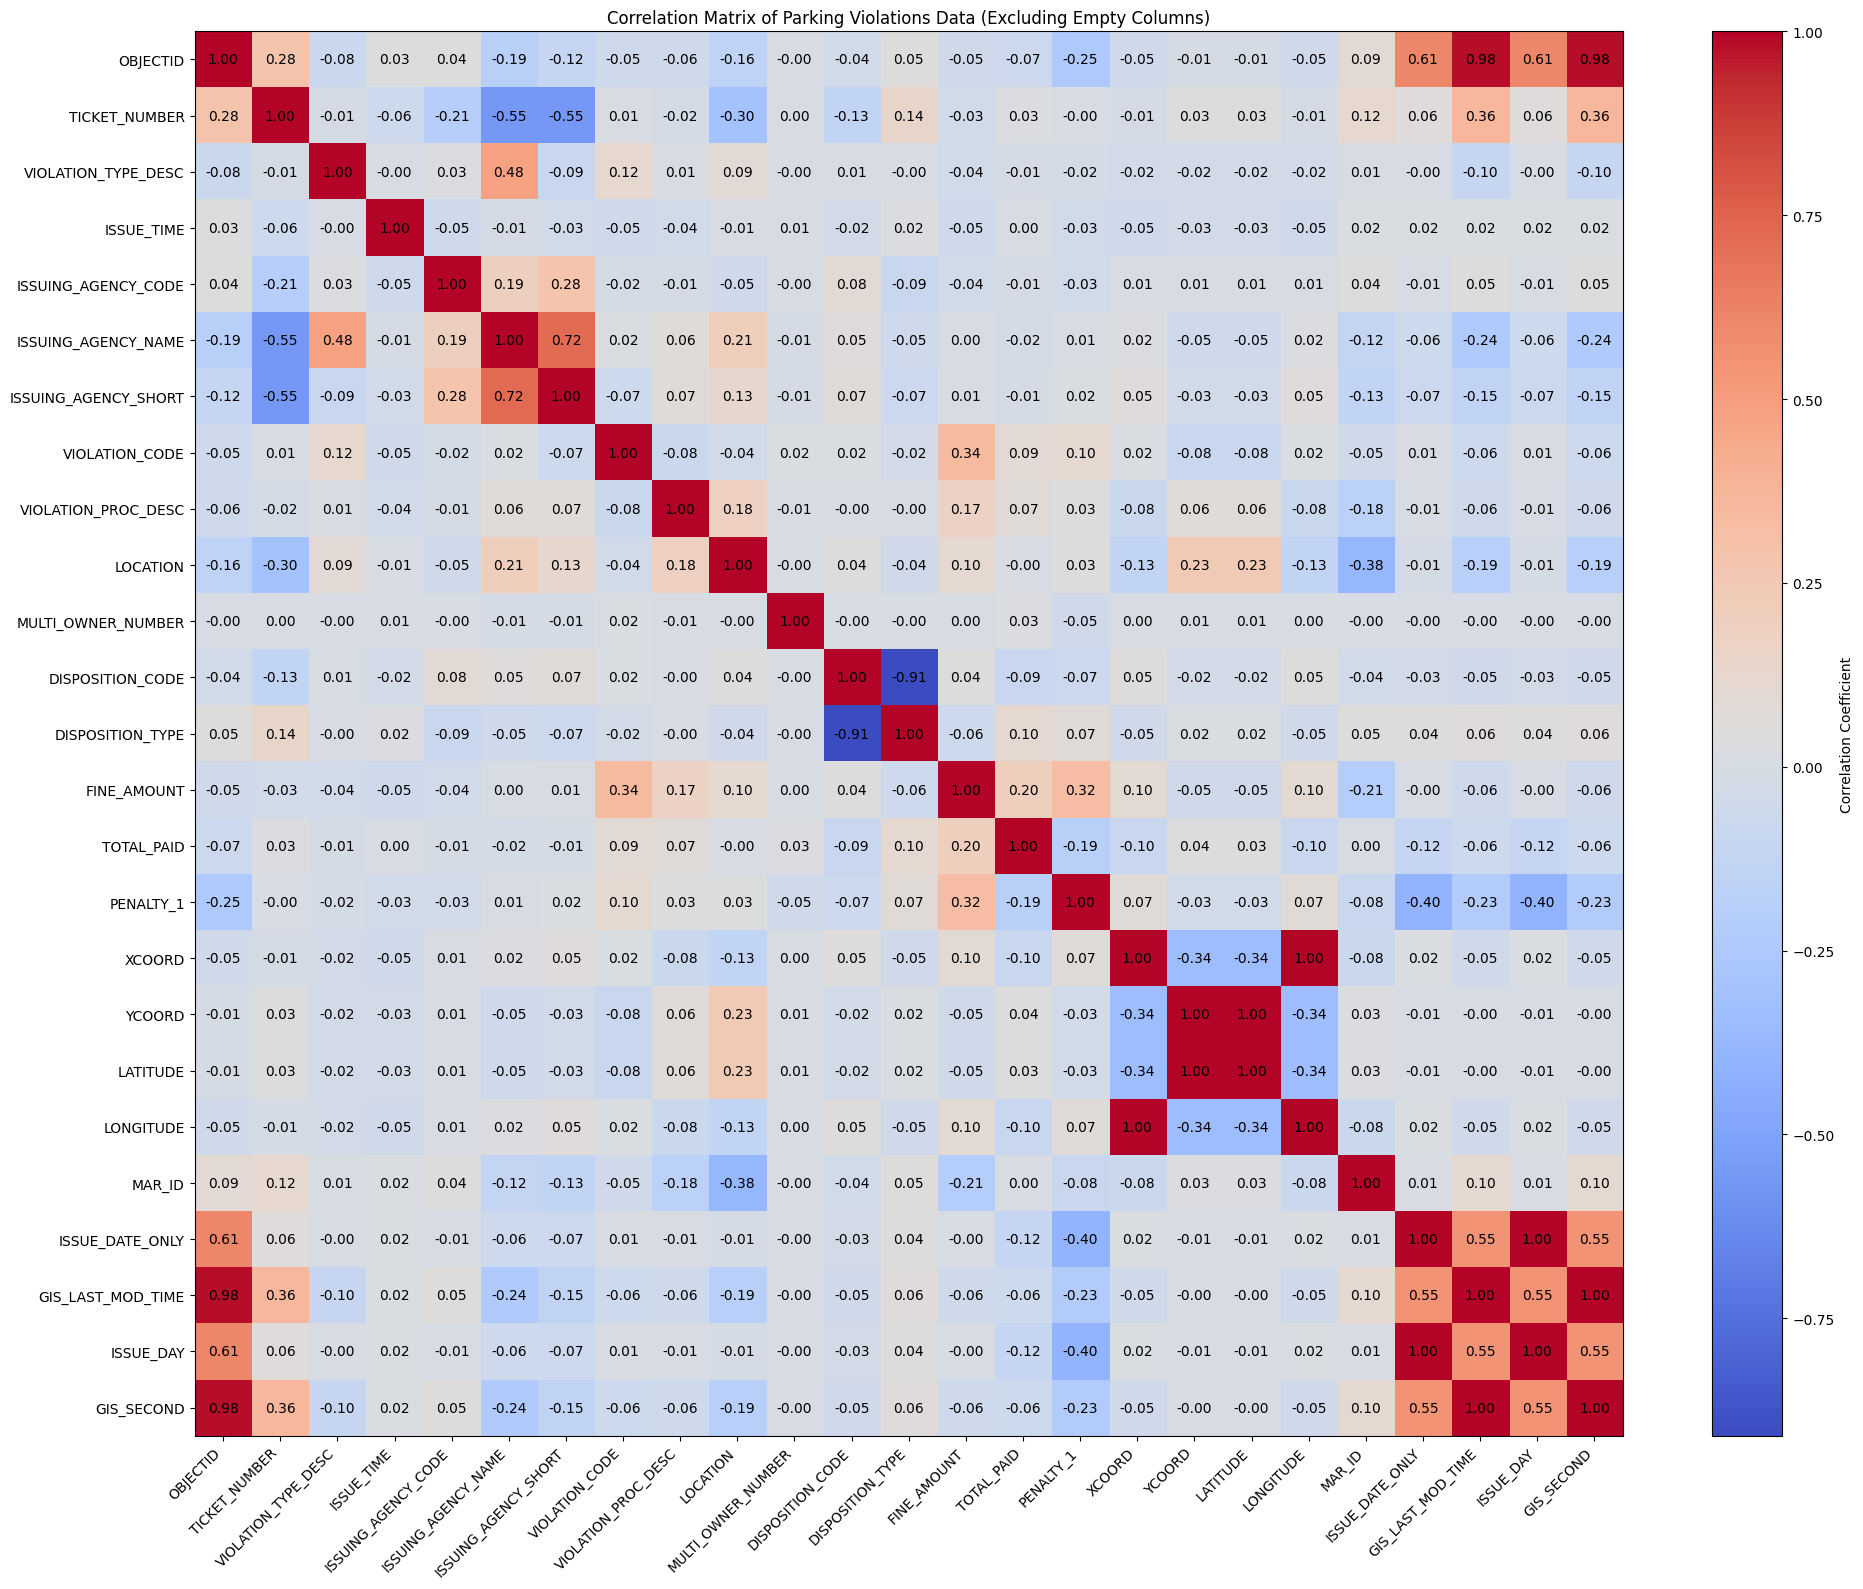

In [161]:
import matplotlib.pyplot as plt
columns_to_exclude = ['PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'ISSUE_TIME_ONLY', 'GIS_LAST_MOD_DATE', 'ISSUE_YEAR', 'ISSUE_MONTH', 'ISSUE_HOUR', 'ISSUE_MINUTE', 'ISSUE_SECOND', 'GIS_YEAR', 'GIS_MONTH', 'GIS_DAY', 'GIS_HOUR', 'GIS_MINUTE']
correlation_matrix = df.drop(columns=columns_to_exclude).corr()

plt.figure(figsize=(20, 16))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Matrix of Parking Violations Data (Excluding Empty Columns)")
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)

for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


In [162]:
positive_mask = (correlation_matrix >= 0.5) & (correlation_matrix != 1.0)
positive_corr = correlation_matrix[positive_mask].unstack()
positive_corr = positive_corr[~positive_corr.isna()].sort_values(ascending=False)

print("Strong Positive Correlations:")
for idx, value in positive_corr.items():
    print(f"{idx[0]} & {idx[1]}: {value:.2f}")

negative_mask = correlation_matrix <= -0.5
negative_corr = correlation_matrix[negative_mask].unstack()
negative_corr = negative_corr[~negative_corr.isna()].sort_values()
print("\nStrong Negative Correlations:")
for idx, value in negative_corr.items():
    print(f"{idx[0]} & {idx[1]}: {value:.2f}")

Strong Positive Correlations:
GIS_SECOND & GIS_LAST_MOD_TIME: 1.00
GIS_LAST_MOD_TIME & GIS_SECOND: 1.00
XCOORD & LONGITUDE: 1.00
LONGITUDE & XCOORD: 1.00
YCOORD & LATITUDE: 1.00
LATITUDE & YCOORD: 1.00
GIS_LAST_MOD_TIME & OBJECTID: 0.98
OBJECTID & GIS_LAST_MOD_TIME: 0.98
GIS_SECOND & OBJECTID: 0.98
OBJECTID & GIS_SECOND: 0.98
ISSUING_AGENCY_NAME & ISSUING_AGENCY_SHORT: 0.72
ISSUING_AGENCY_SHORT & ISSUING_AGENCY_NAME: 0.72
ISSUE_DAY & OBJECTID: 0.61
OBJECTID & ISSUE_DATE_ONLY: 0.61
OBJECTID & ISSUE_DAY: 0.61
ISSUE_DATE_ONLY & OBJECTID: 0.61
GIS_LAST_MOD_TIME & ISSUE_DATE_ONLY: 0.55
GIS_LAST_MOD_TIME & ISSUE_DAY: 0.55
ISSUE_DATE_ONLY & GIS_LAST_MOD_TIME: 0.55
ISSUE_DAY & GIS_LAST_MOD_TIME: 0.55
GIS_SECOND & ISSUE_DATE_ONLY: 0.55
ISSUE_DATE_ONLY & GIS_SECOND: 0.55
ISSUE_DAY & GIS_SECOND: 0.55
GIS_SECOND & ISSUE_DAY: 0.55

Strong Negative Correlations:
DISPOSITION_CODE & DISPOSITION_TYPE: -0.91
DISPOSITION_TYPE & DISPOSITION_CODE: -0.91
TICKET_NUMBER & ISSUING_AGENCY_SHORT: -0.55
ISSUING_A

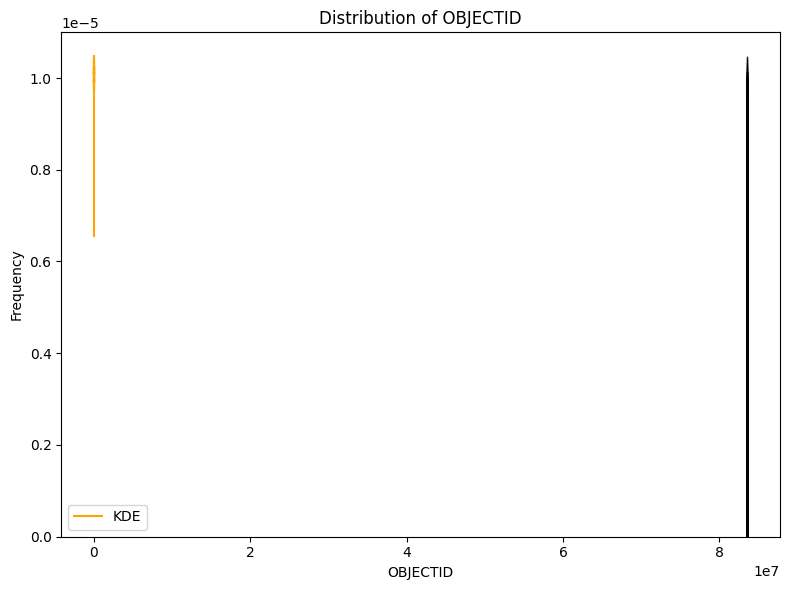

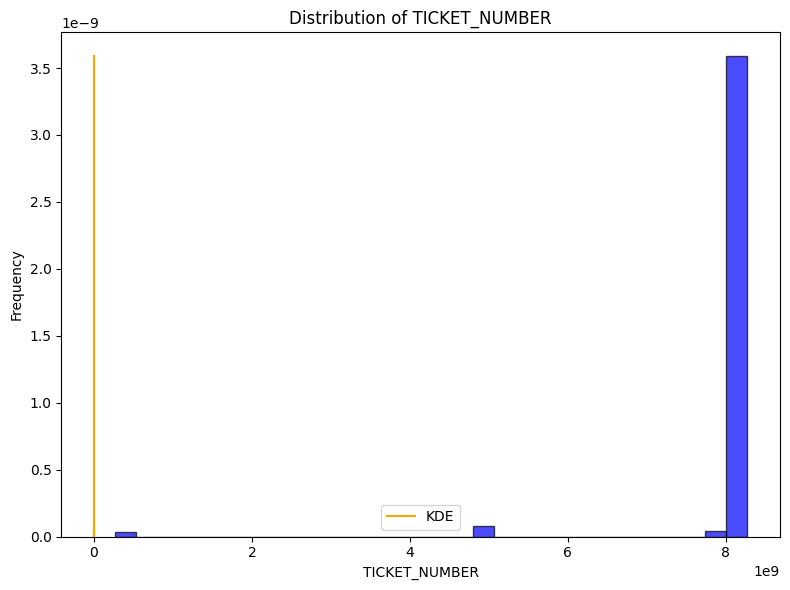

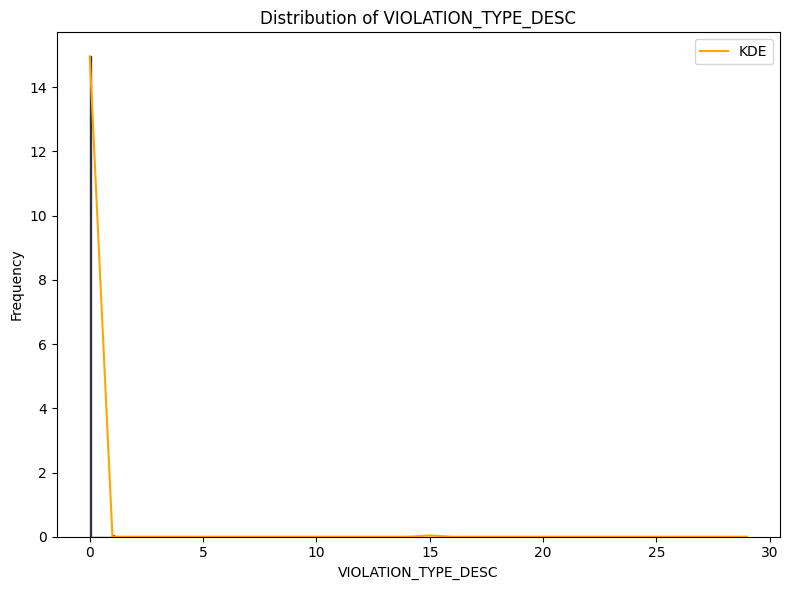

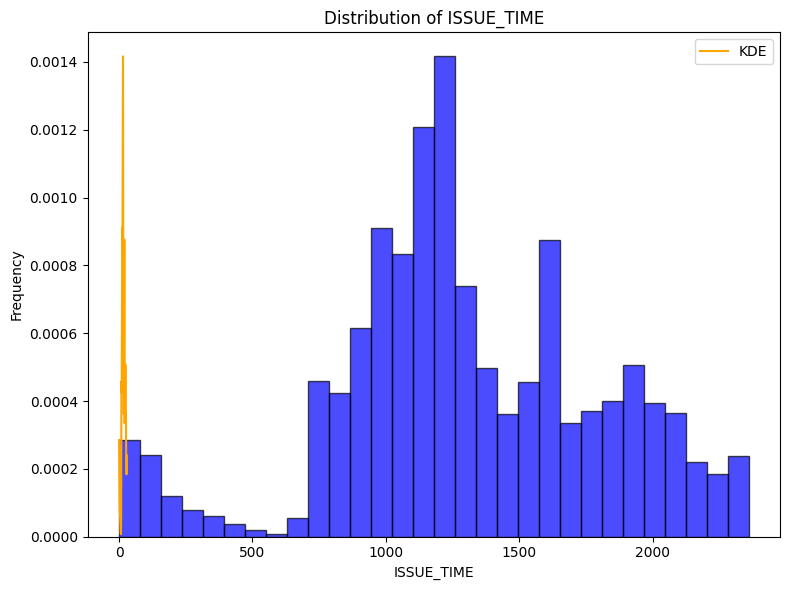

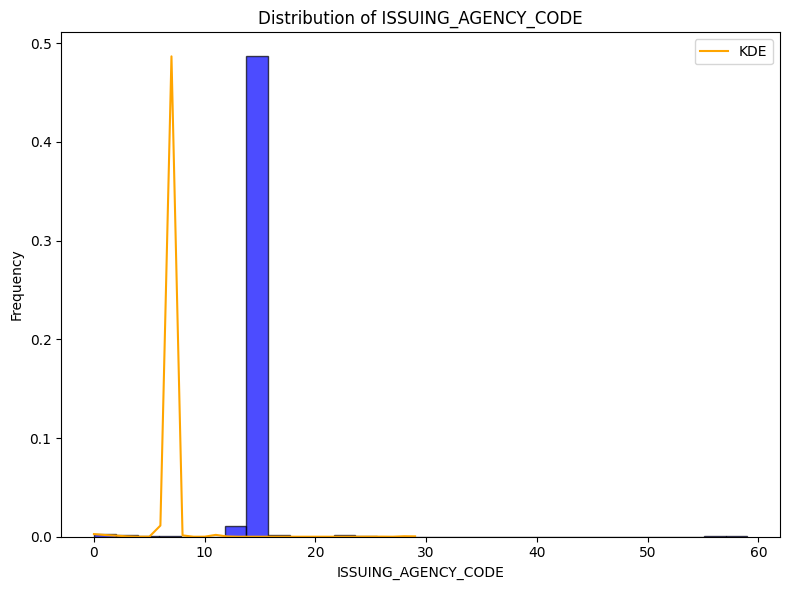

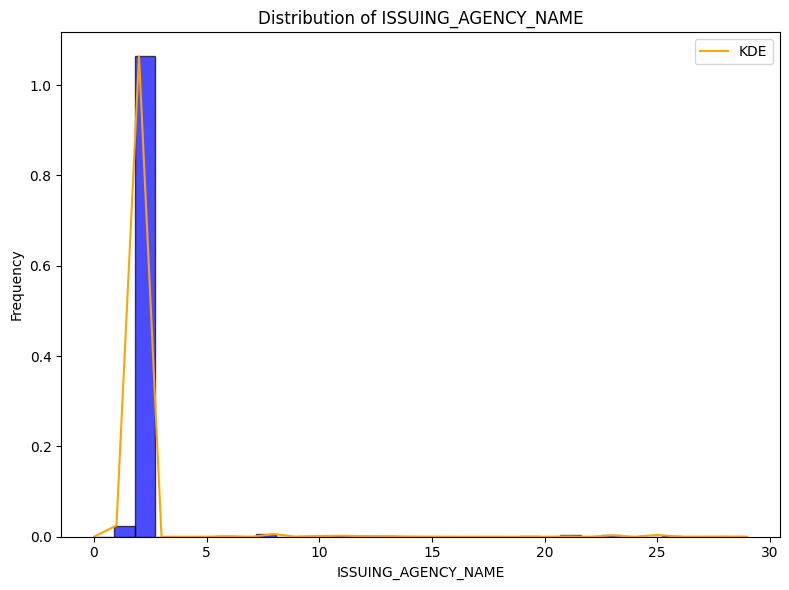

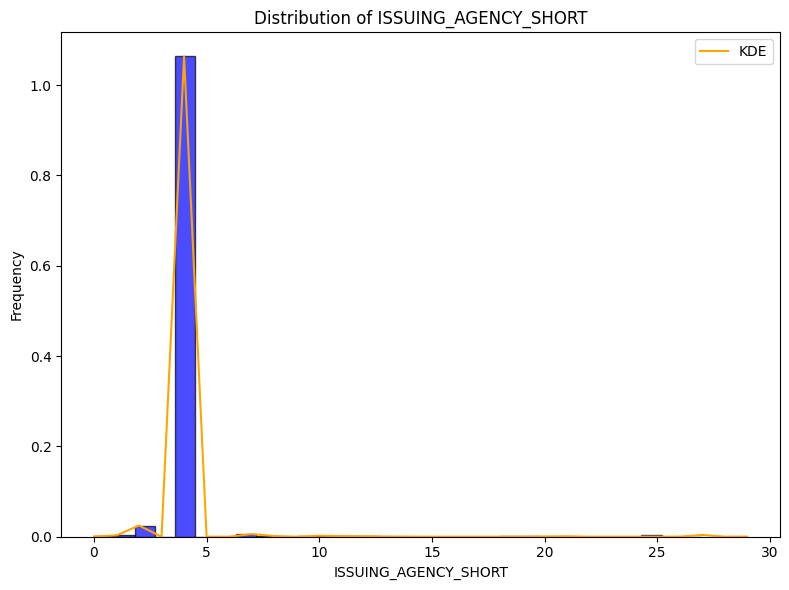

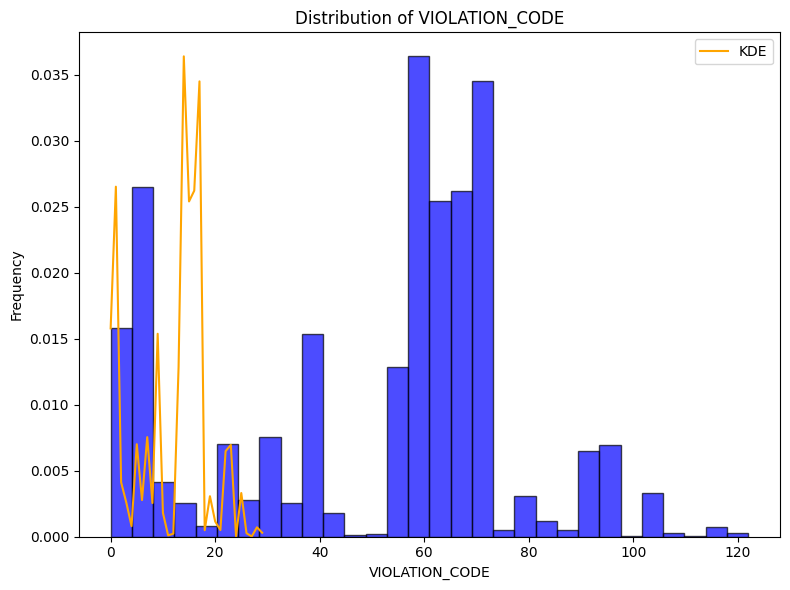

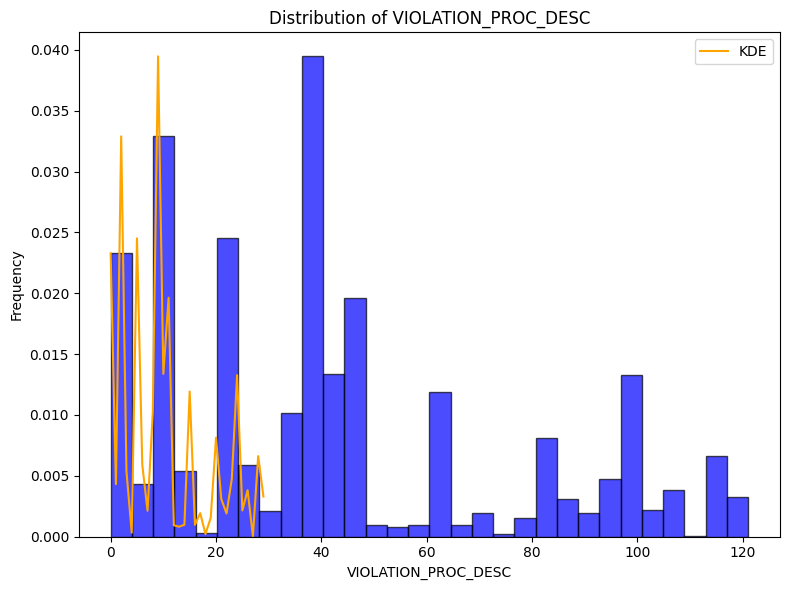

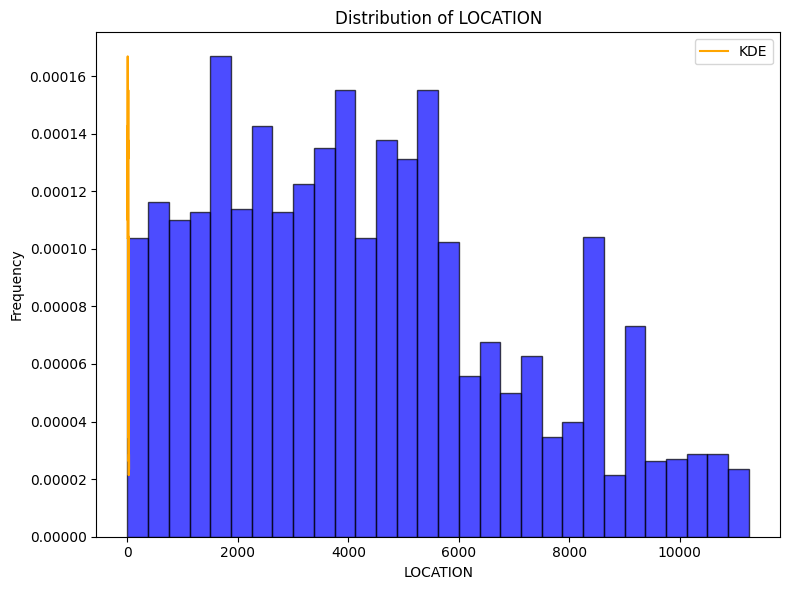

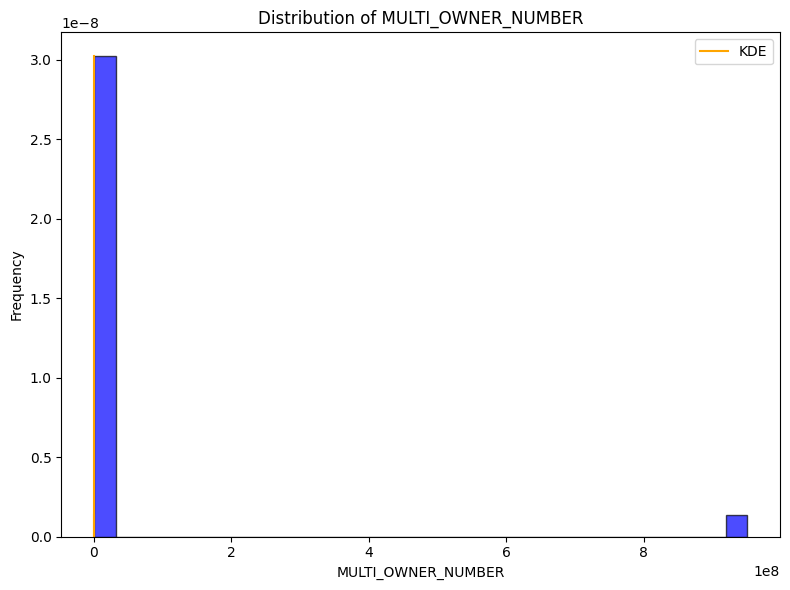

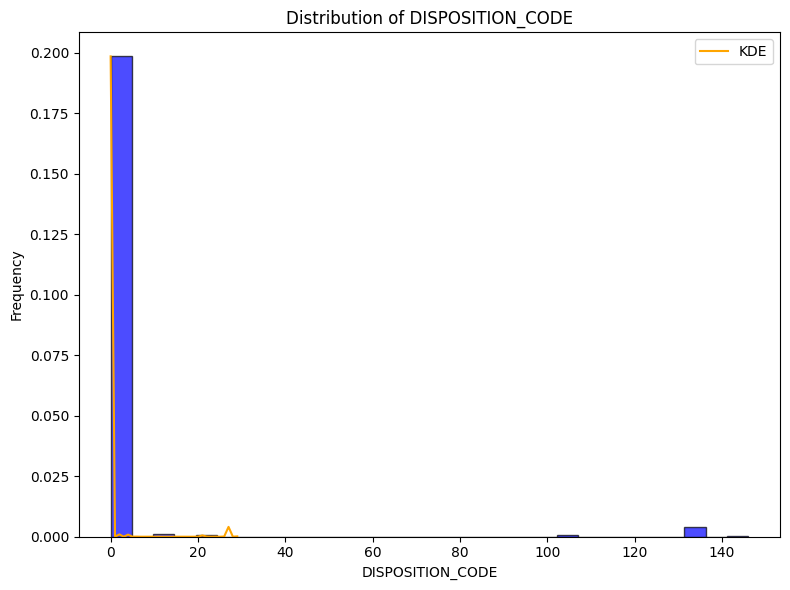

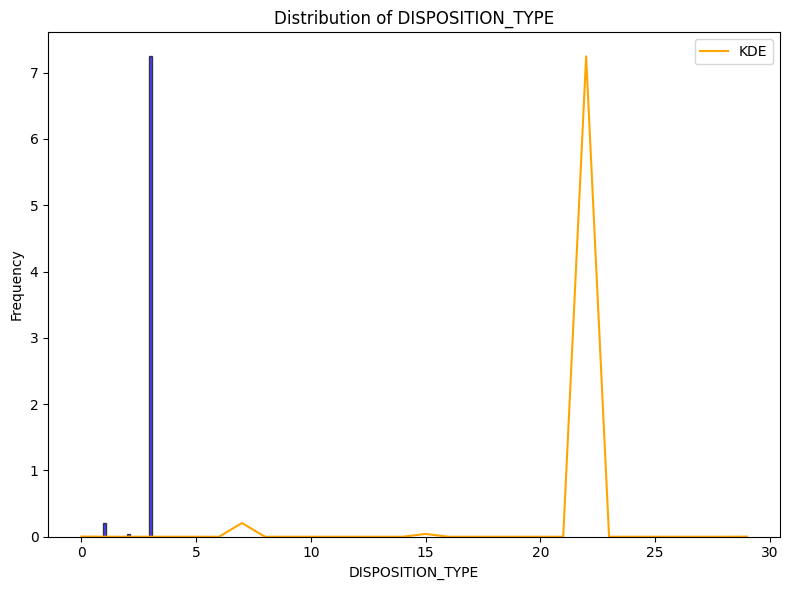

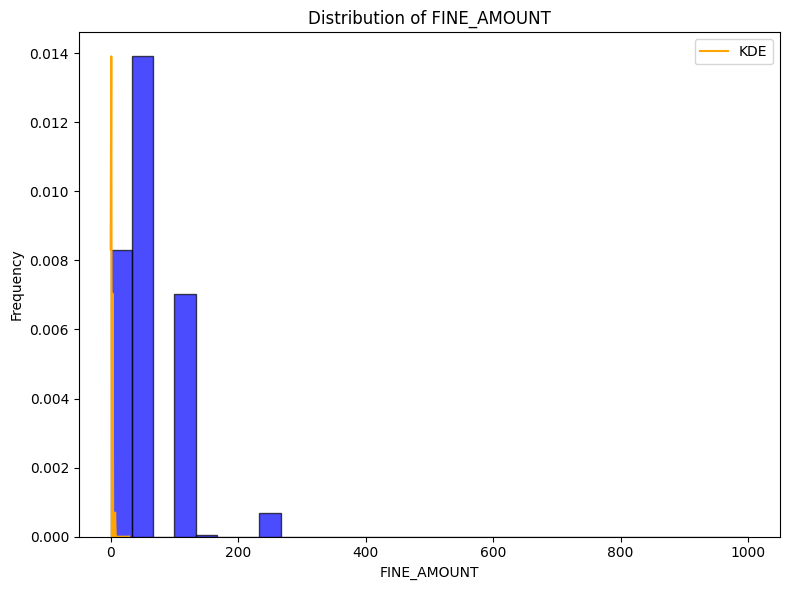

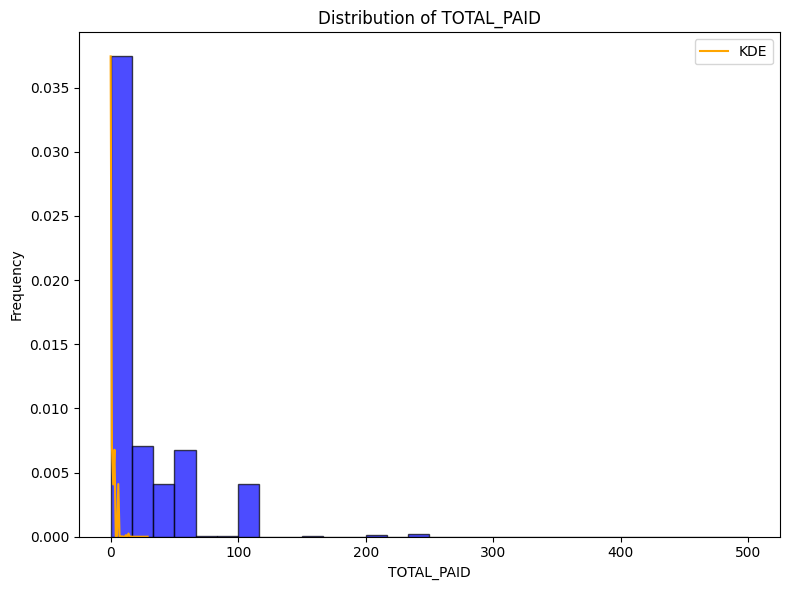

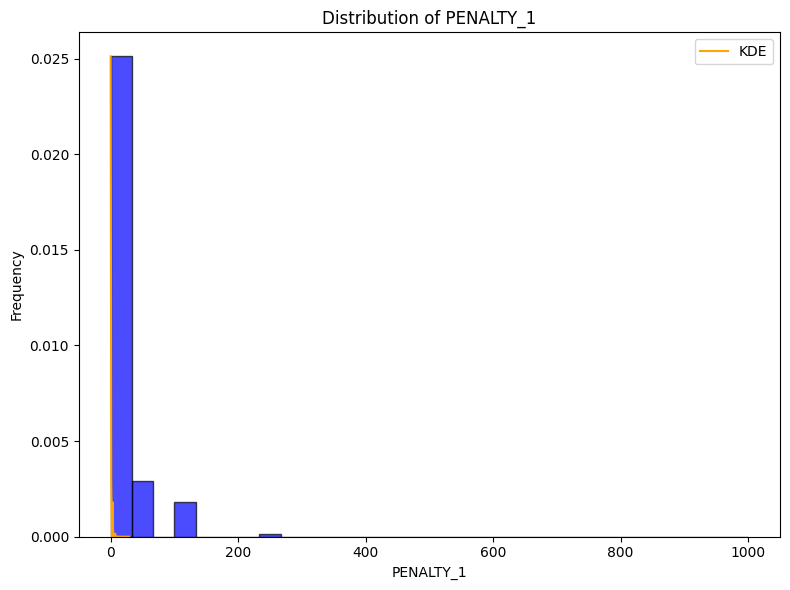

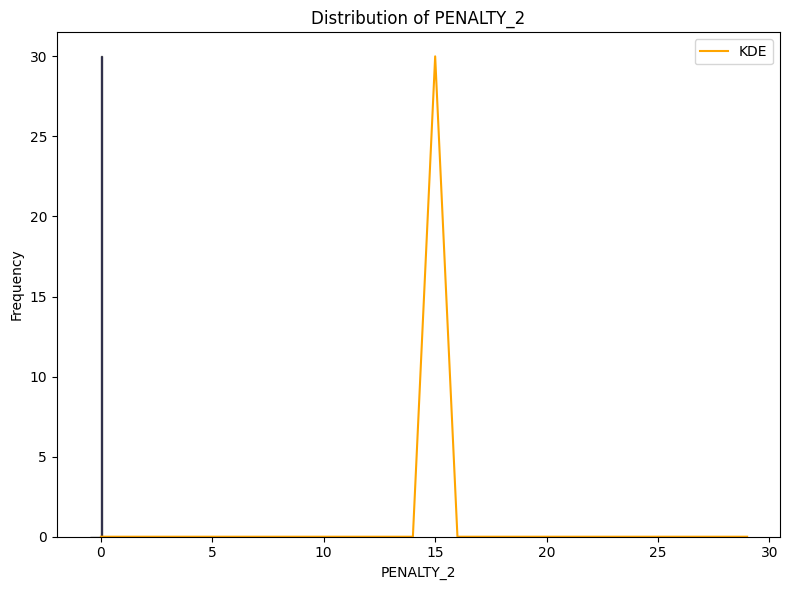

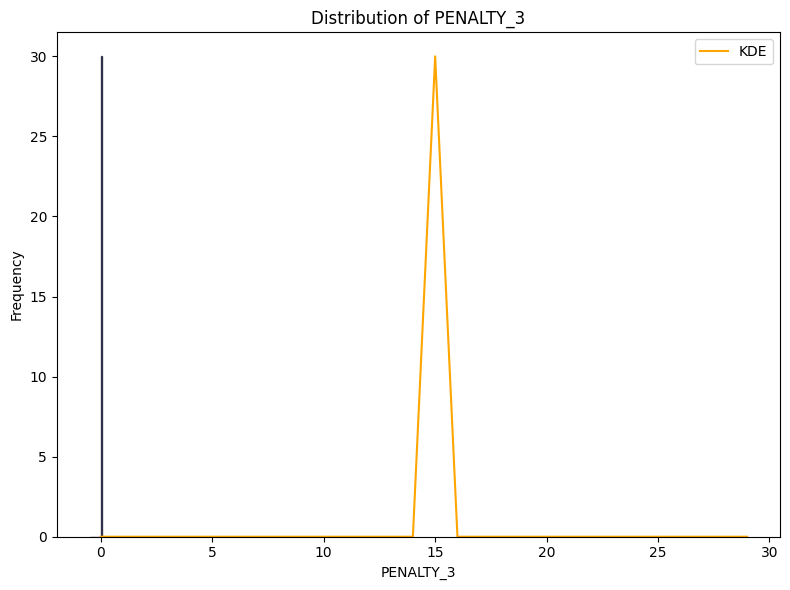

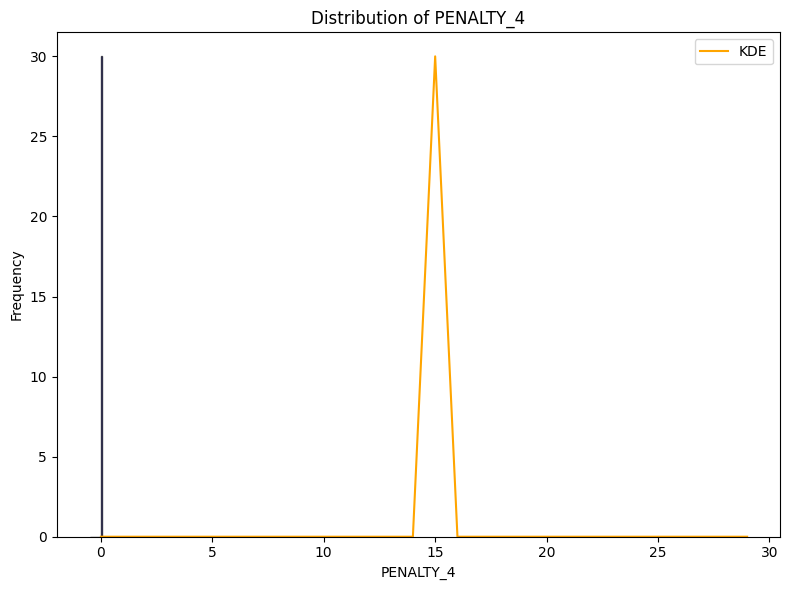

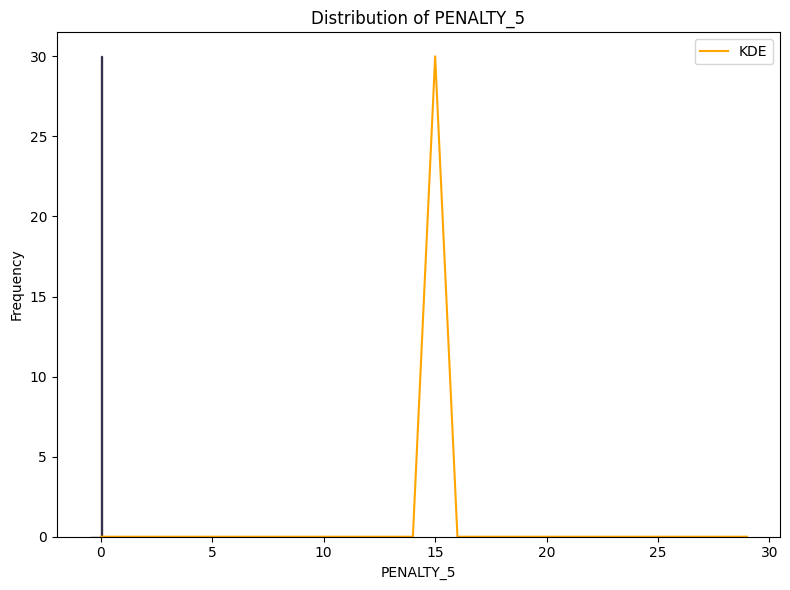

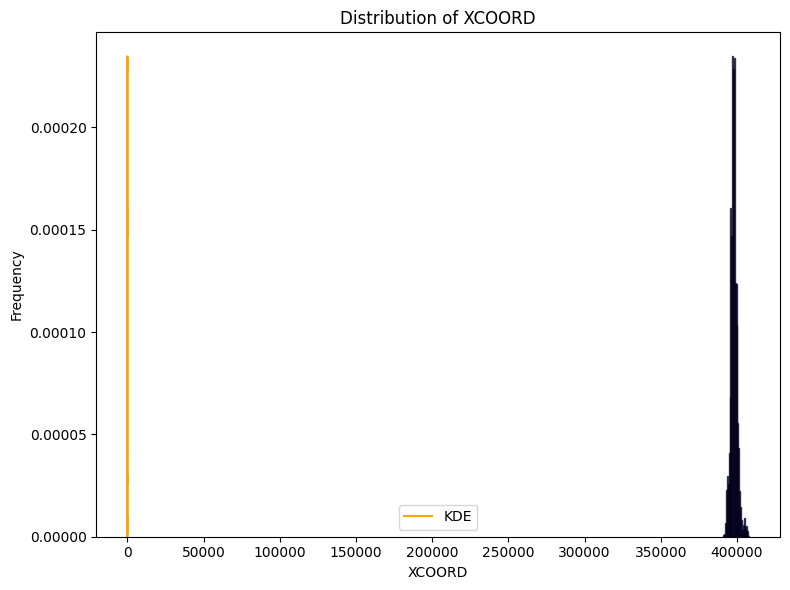

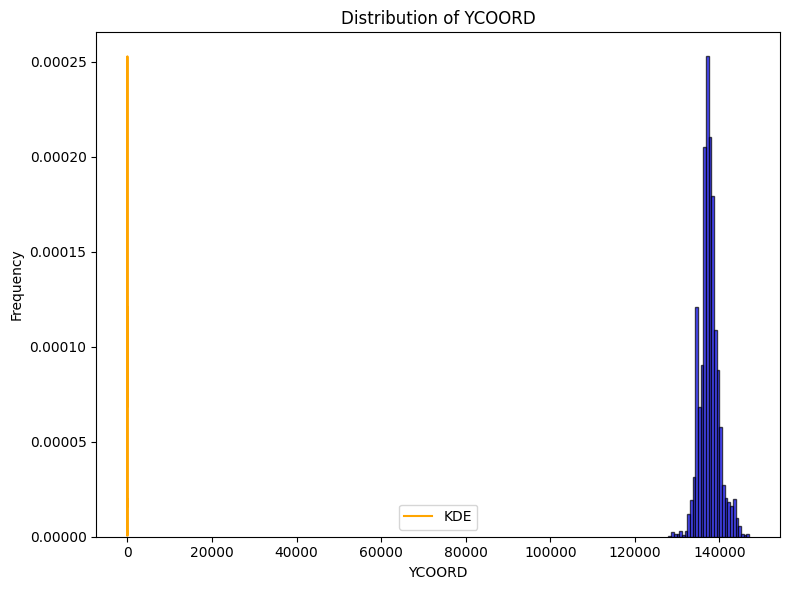

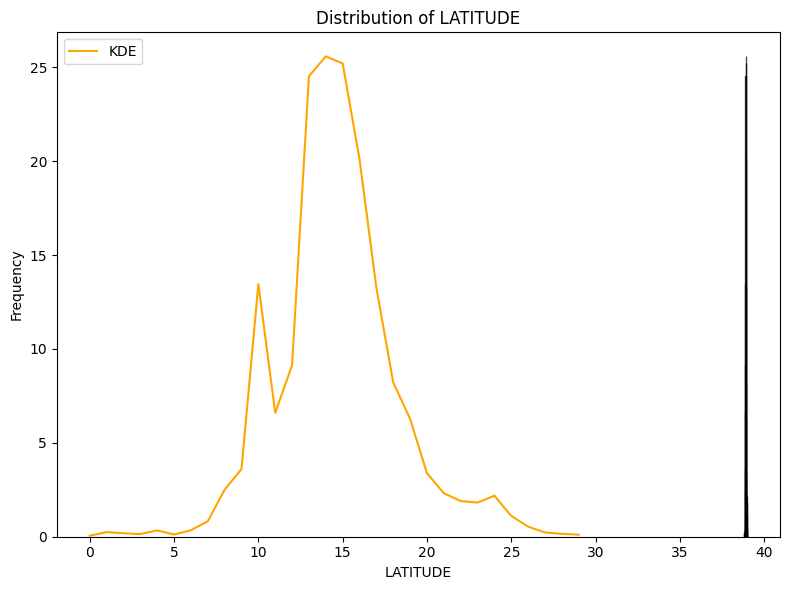

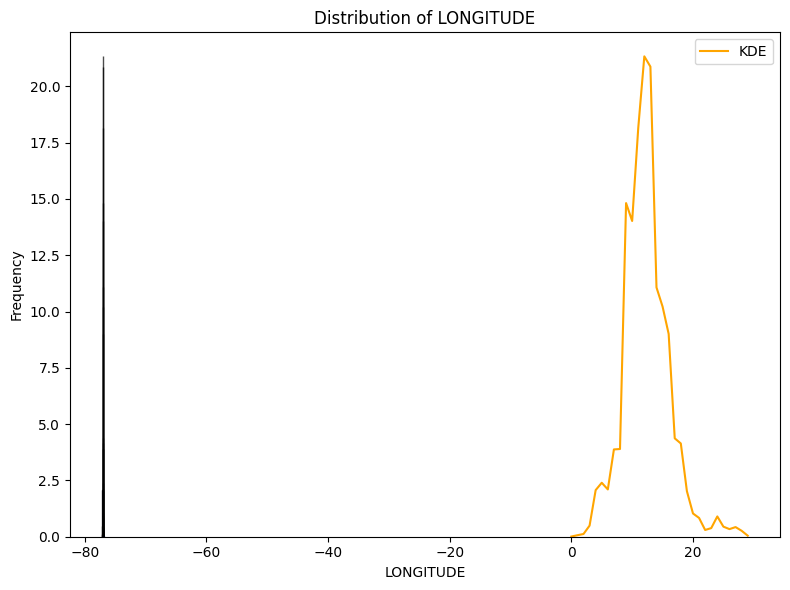

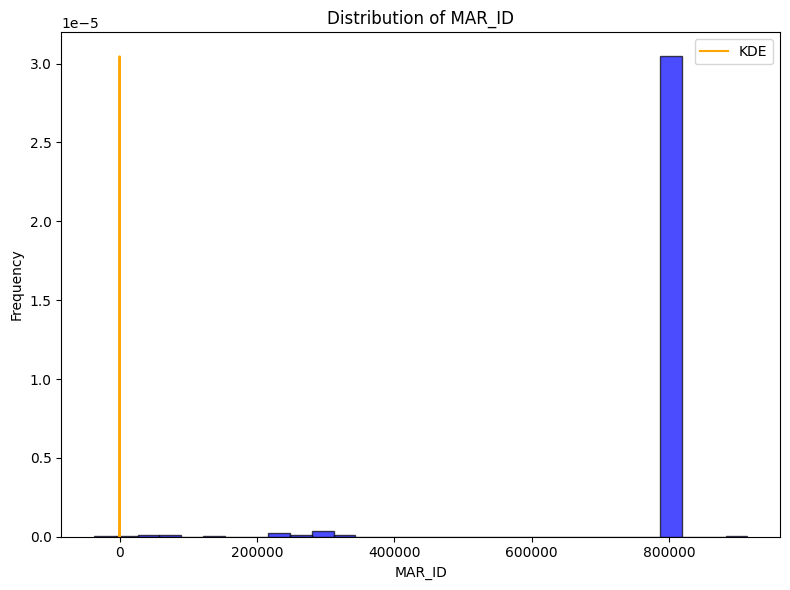

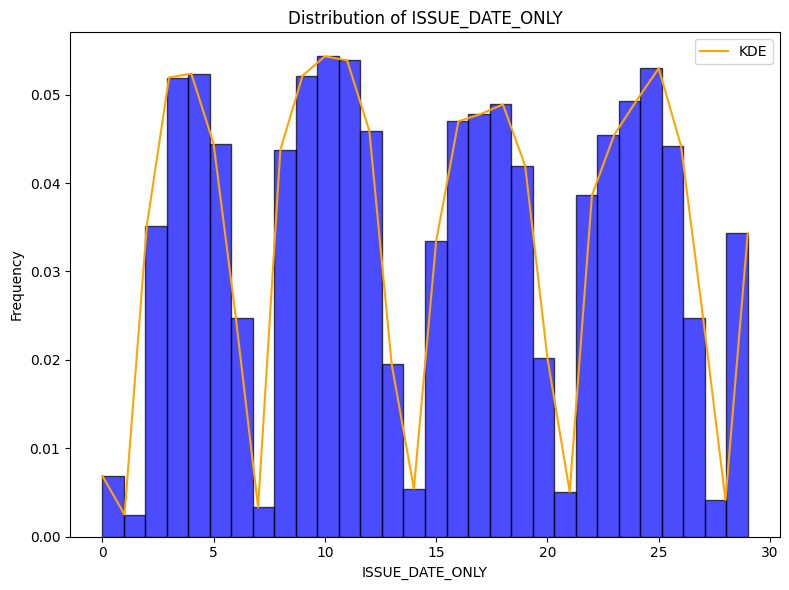

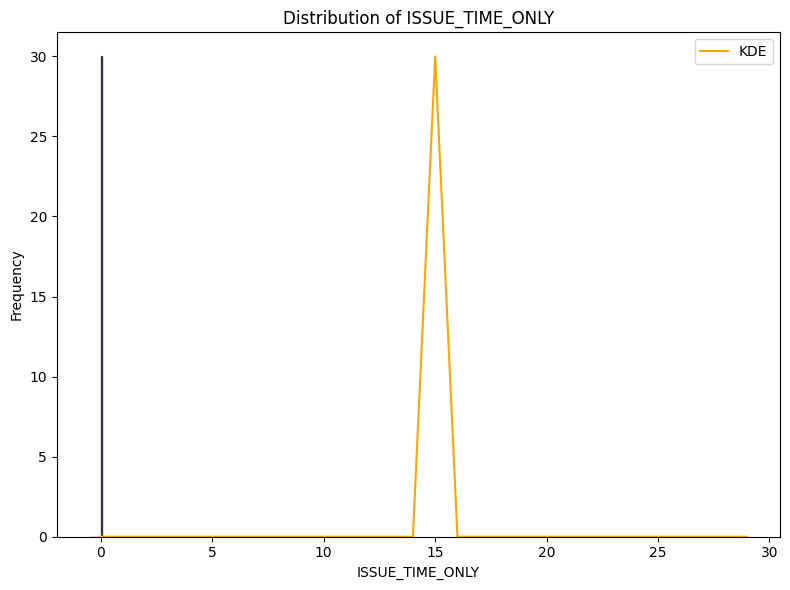

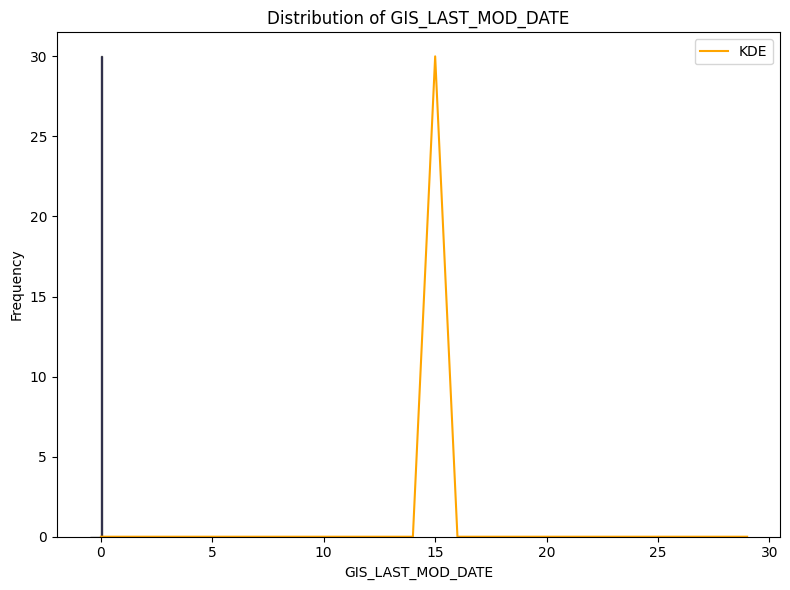

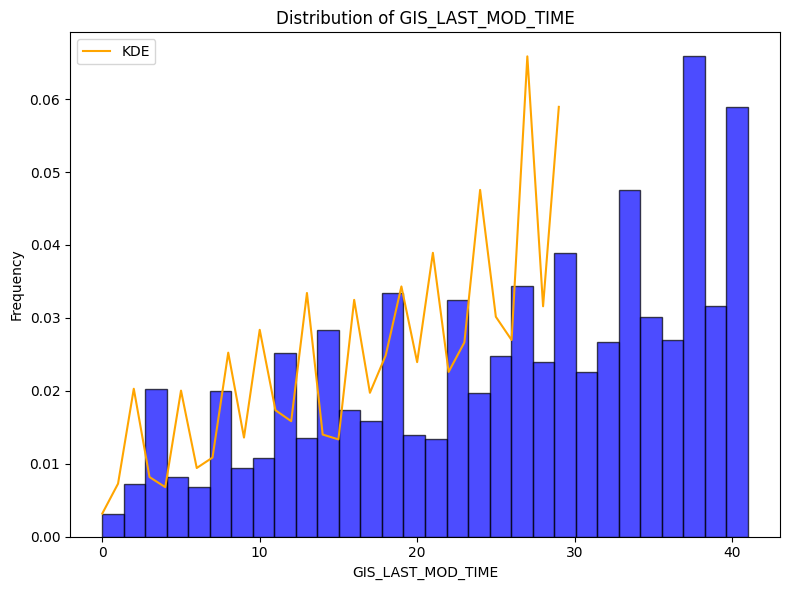

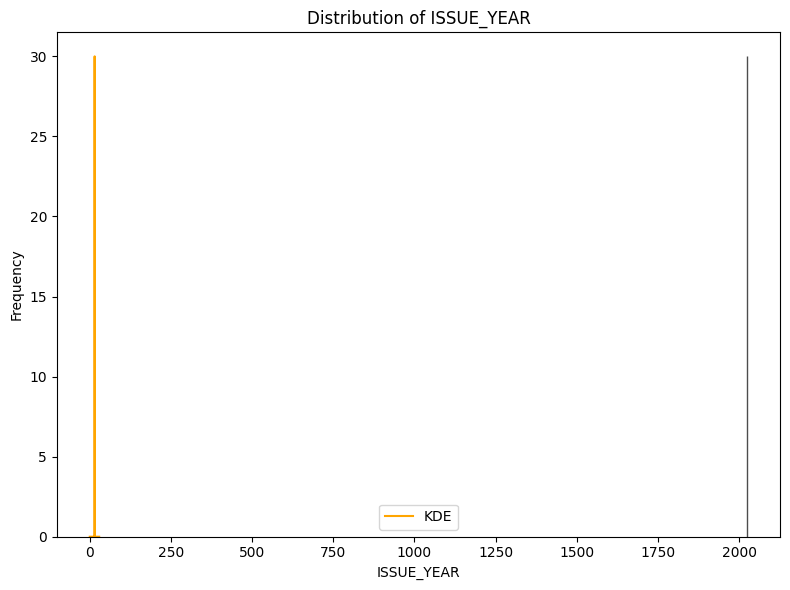

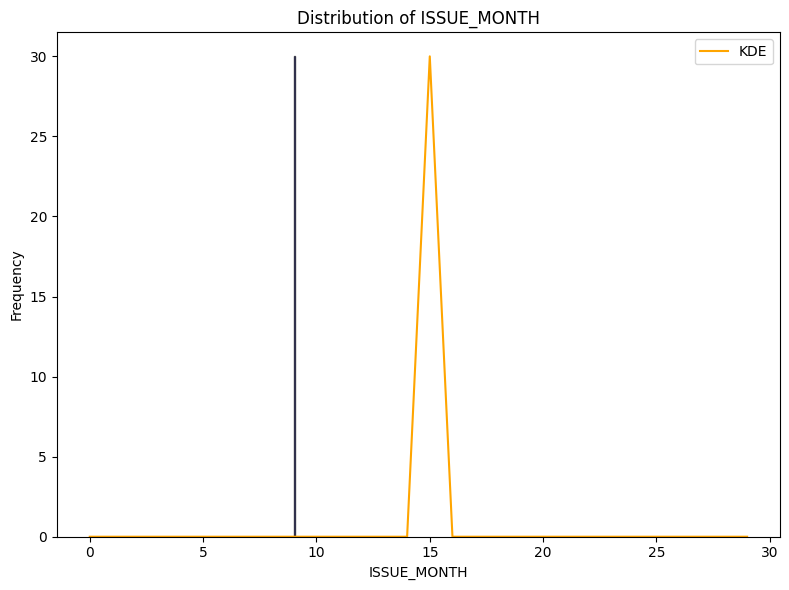

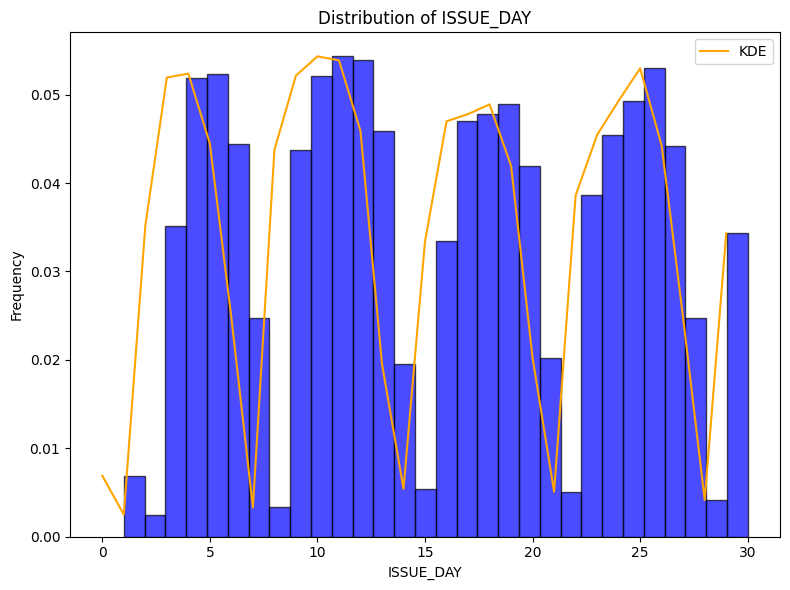

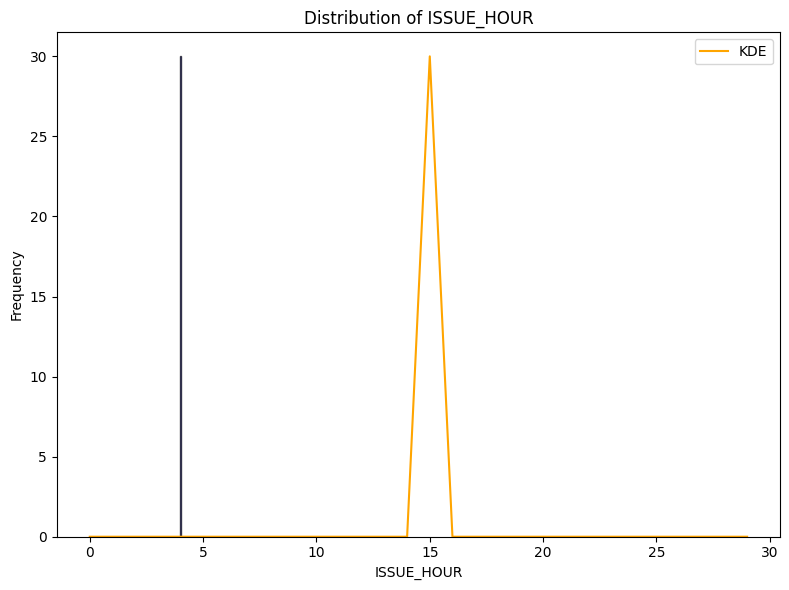

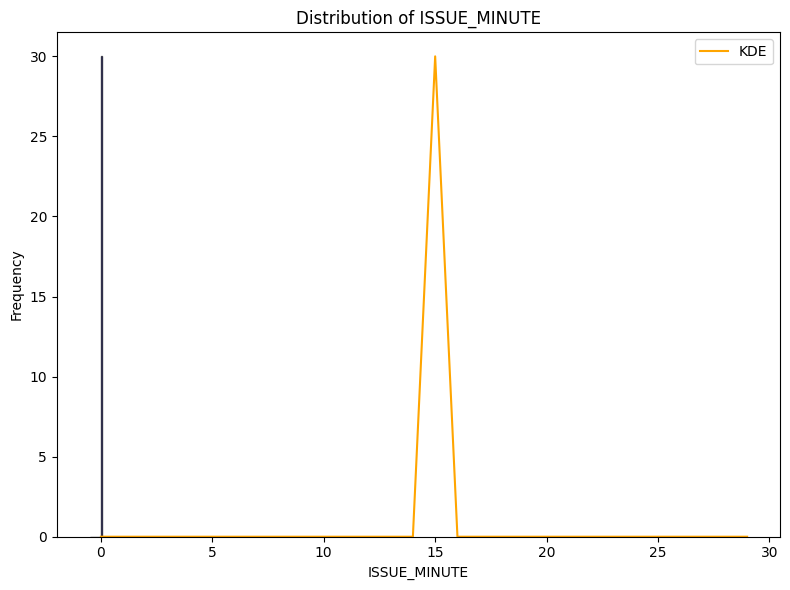

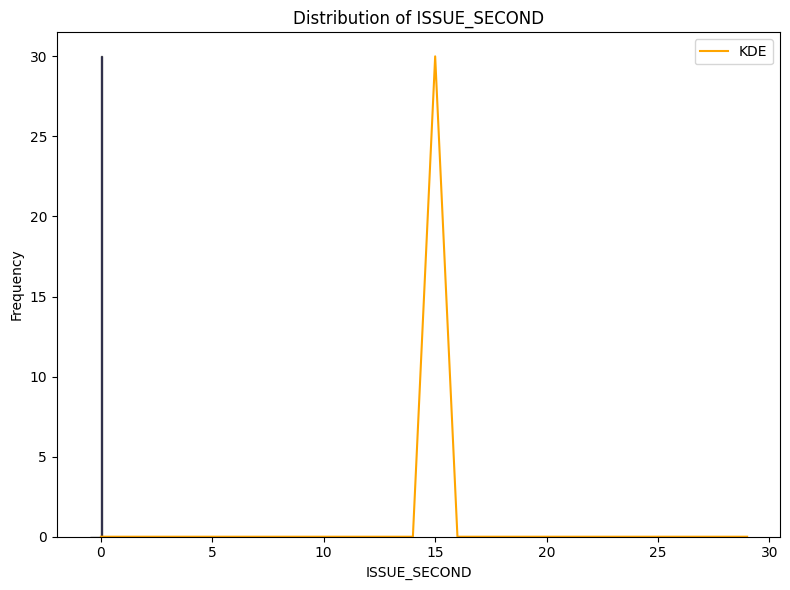

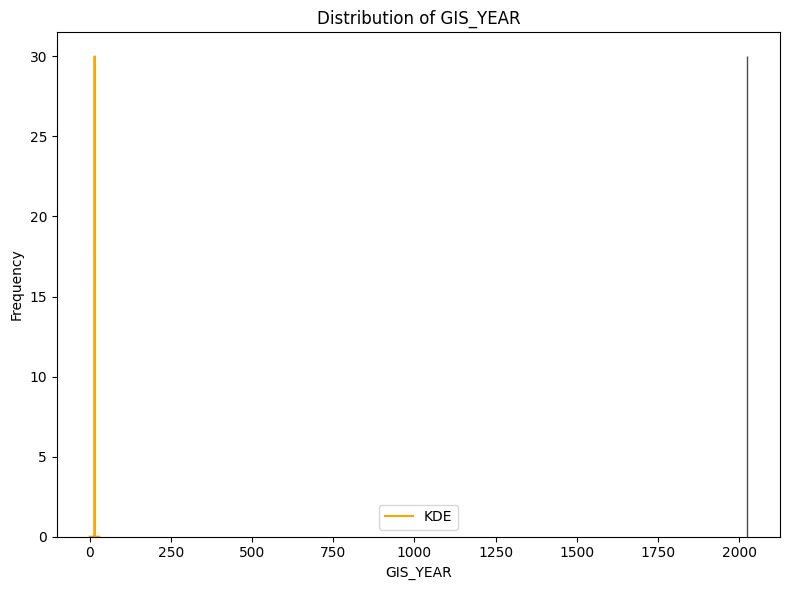

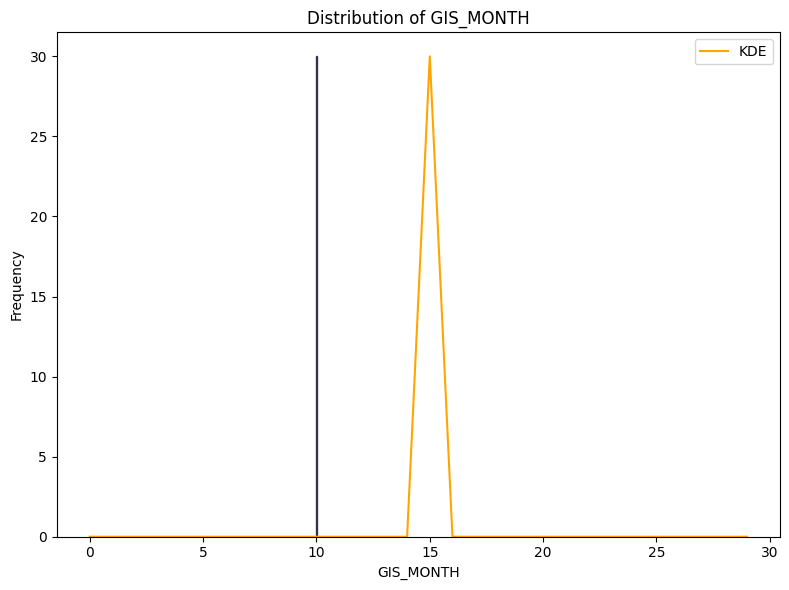

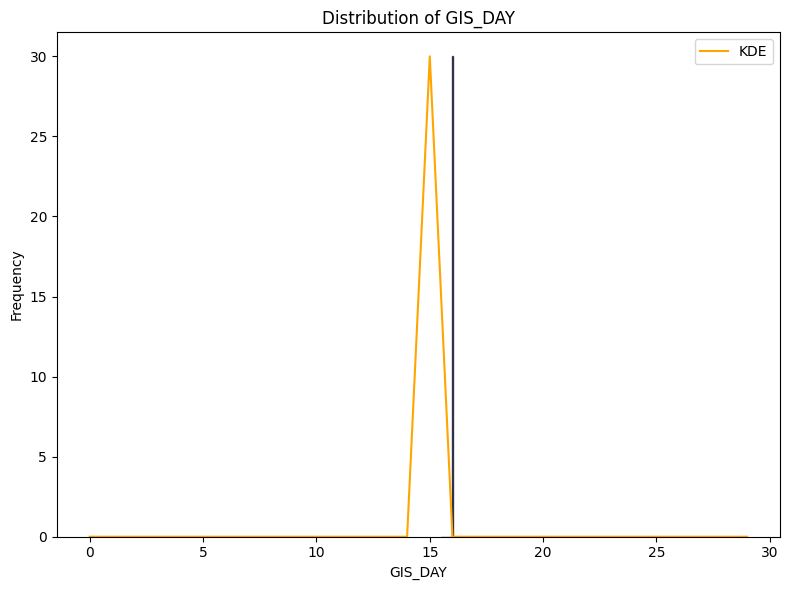

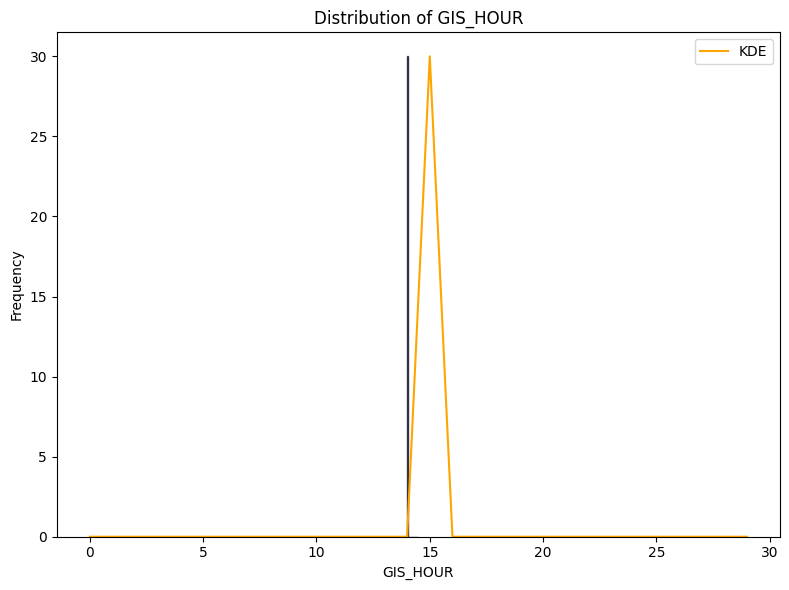

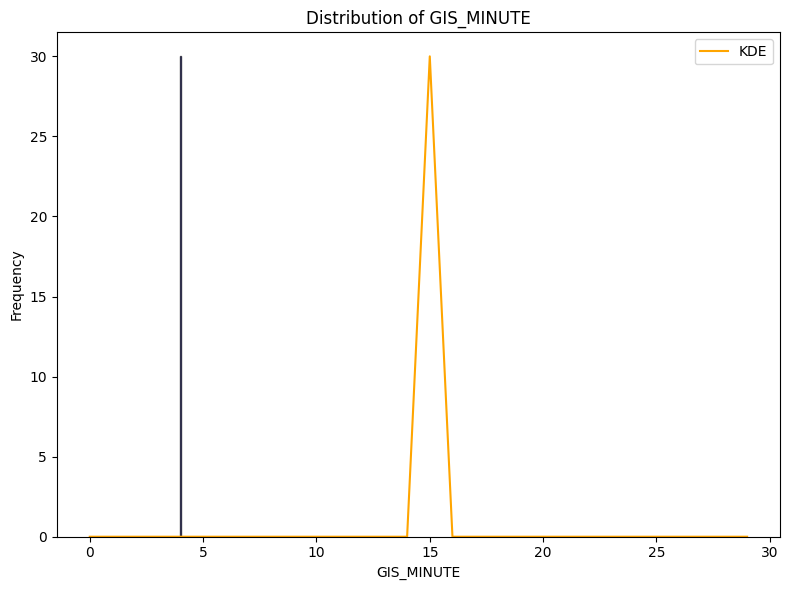

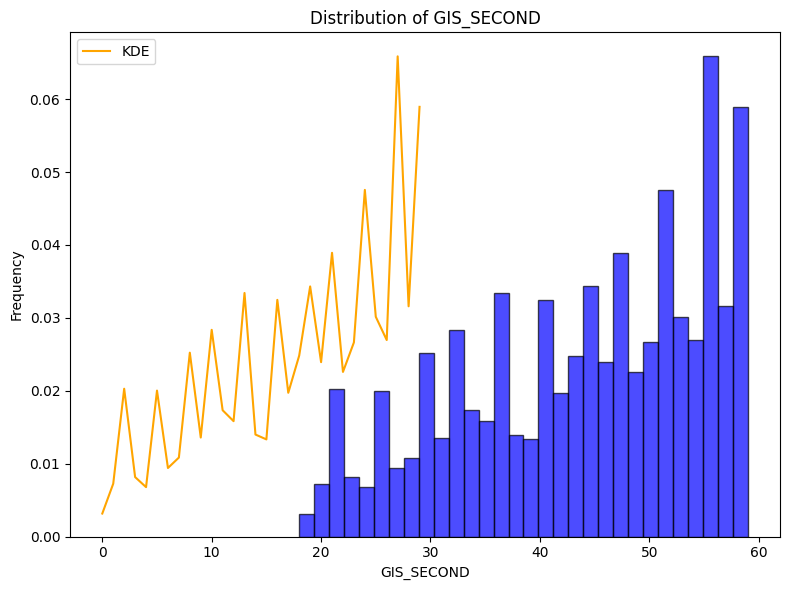

In [172]:
import matplotlib.pyplot as plt
import numpy as np
numerical_cols = df.select_dtypes(include=['number'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    # Plot histogram
    plt.hist(df[col], bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)

    # Plot kernel density estimate (KDE)
    kde = np.histogram(df[col], bins=30, density=True)[0]
    plt.plot(kde, label='KDE', color='orange')

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [163]:
for column in df.columns:
  print(f"{column}: {df[column].dtype}")


OBJECTID: int64
TICKET_NUMBER: int64
VIOLATION_TYPE_DESC: int64
ISSUE_TIME: int64
ISSUING_AGENCY_CODE: int64
ISSUING_AGENCY_NAME: int64
ISSUING_AGENCY_SHORT: int64
VIOLATION_CODE: int64
VIOLATION_PROC_DESC: int64
LOCATION: int64
MULTI_OWNER_NUMBER: int64
DISPOSITION_CODE: int64
DISPOSITION_TYPE: int64
FINE_AMOUNT: int64
TOTAL_PAID: int64
PENALTY_1: int64
PENALTY_2: int64
PENALTY_3: int64
PENALTY_4: int64
PENALTY_5: int64
XCOORD: float64
YCOORD: float64
LATITUDE: float64
LONGITUDE: float64
MAR_ID: float64
ISSUE_DATE_ONLY: int64
ISSUE_TIME_ONLY: int64
GIS_LAST_MOD_DATE: int64
GIS_LAST_MOD_TIME: int64
ISSUE_YEAR: int32
ISSUE_MONTH: int32
ISSUE_DAY: int32
ISSUE_HOUR: int32
ISSUE_MINUTE: int32
ISSUE_SECOND: int32
GIS_YEAR: int32
GIS_MONTH: int32
GIS_DAY: int32
GIS_HOUR: int32
GIS_MINUTE: int32
GIS_SECOND: int32


In [164]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('FINE_AMOUNT', axis=1)
y = df['FINE_AMOUNT']
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['VIOLATION_TYPE_DESC', 'ISSUE_TIME', 'ISSUING_AGENCY_NAME',
       'VIOLATION_CODE', 'VIOLATION_PROC_DESC', 'TOTAL_PAID', 'PENALTY_1',
       'YCOORD', 'LATITUDE', 'MAR_ID'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15 16 17 18 25 26 28 29 31 32 33 34 35 36 37 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [165]:
scores = selector.scores_
feature_scores = list(zip(X.columns, scores))
feature_scores.sort(key=lambda x: x[1], reverse=True)
print("Feature Scores:")
for feature, score in feature_scores:
    print(f"{feature}: {score}")

Feature Scores:
VIOLATION_CODE: 7179.1340518192155
VIOLATION_PROC_DESC: 4295.808279777306
PENALTY_1: 746.9193641565348
PENALTY_2: nan
PENALTY_3: nan
PENALTY_4: nan
PENALTY_5: nan
MAR_ID: 611.5080322359962
ISSUING_AGENCY_NAME: 483.9928703469985
YCOORD: 402.9508806890088
LATITUDE: 402.6589346296968
VIOLATION_TYPE_DESC: 388.1567810820476
TOTAL_PAID: 346.6974900021206
ISSUE_TIME: 241.90627096615563
LOCATION: 201.58048855937943
TICKET_NUMBER: 193.6471141021905
XCOORD: 176.99214635942715
LONGITUDE: 176.58547747314947
ISSUING_AGENCY_SHORT: 174.37640348760715
OBJECTID: 69.95880976616374
ISSUING_AGENCY_CODE: 68.80660105251651
DISPOSITION_TYPE: 37.49555790418327
DISPOSITION_CODE: 21.17375639964662
MULTI_OWNER_NUMBER: 9.350262665068033
ISSUE_DATE_ONLY: 4.158152925701544
ISSUE_TIME_ONLY: nan
GIS_LAST_MOD_DATE: nan
GIS_LAST_MOD_TIME: 90.39430459905734
ISSUE_YEAR: nan
ISSUE_MONTH: nan
ISSUE_DAY: 4.158152925697738
ISSUE_HOUR: nan
ISSUE_MINUTE: nan
ISSUE_SECOND: nan
GIS_YEAR: nan
GIS_MONTH: nan
GIS_DA

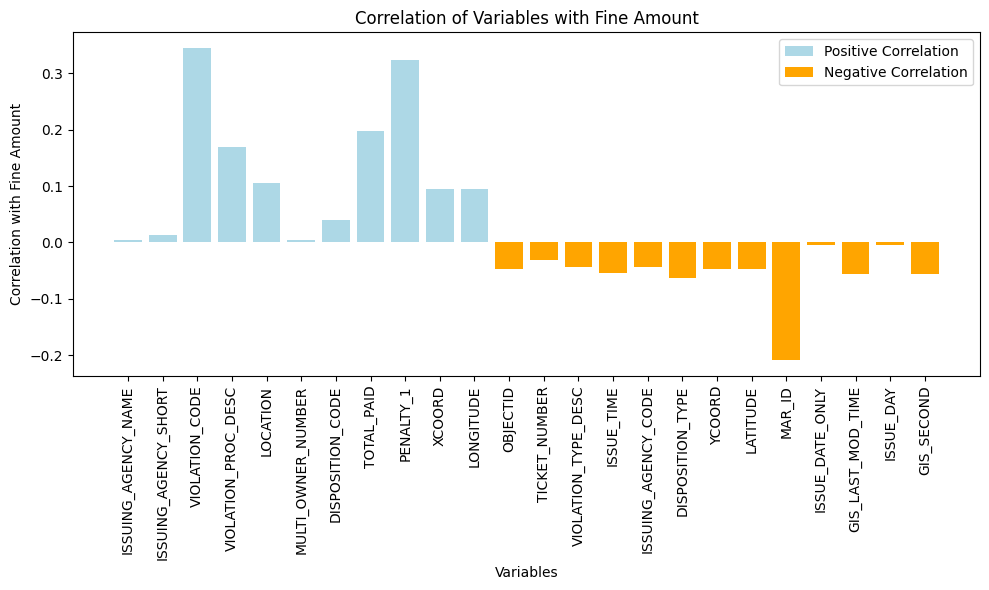

In [166]:
import matplotlib.pyplot as plt
fine_amount_correlations = correlation_matrix['FINE_AMOUNT'].drop('FINE_AMOUNT')
positive_correlations = fine_amount_correlations[fine_amount_correlations > 0]
negative_correlations = fine_amount_correlations[fine_amount_correlations < 0]
plt.figure(figsize=(10, 6))
plt.bar(positive_correlations.index, positive_correlations.values, color='lightblue', label='Positive Correlation')
plt.bar(negative_correlations.index, negative_correlations.values, color='orange', label='Negative Correlation')
plt.xlabel('Variables')
plt.ylabel('Correlation with Fine Amount')
plt.title('Correlation of Variables with Fine Amount')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [167]:
df.to_csv('cleaned_parking_violations.csv', index=False)

In [168]:
len(df.columns)

41

In [169]:
df.columns

Index(['OBJECTID', 'TICKET_NUMBER', 'VIOLATION_TYPE_DESC', 'ISSUE_TIME',
       'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME', 'ISSUING_AGENCY_SHORT',
       'VIOLATION_CODE', 'VIOLATION_PROC_DESC', 'LOCATION',
       'MULTI_OWNER_NUMBER', 'DISPOSITION_CODE', 'DISPOSITION_TYPE',
       'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1', 'PENALTY_2', 'PENALTY_3',
       'PENALTY_4', 'PENALTY_5', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE',
       'MAR_ID', 'ISSUE_DATE_ONLY', 'ISSUE_TIME_ONLY', 'GIS_LAST_MOD_DATE',
       'GIS_LAST_MOD_TIME', 'ISSUE_YEAR', 'ISSUE_MONTH', 'ISSUE_DAY',
       'ISSUE_HOUR', 'ISSUE_MINUTE', 'ISSUE_SECOND', 'GIS_YEAR', 'GIS_MONTH',
       'GIS_DAY', 'GIS_HOUR', 'GIS_MINUTE', 'GIS_SECOND'],
      dtype='object')

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

file_path = '/content/cleaned_parking_violations (1).csv'
violations_df = pd.read_csv(file_path)

violations_df = violations_df[['LOCATION', 'VIOLATION_TYPE_DESC', 'VIOLATION_CODE', 'FINE_AMOUNT']].dropna()

label_encoder_location = LabelEncoder()
label_encoder_description = LabelEncoder()
violations_df['LOCATION_ENC'] = label_encoder_location.fit_transform(violations_df['LOCATION'])
violations_df['VIOLATION_DESCRIPTION_ENC'] = label_encoder_description.fit_transform(violations_df['VIOLATION_TYPE_DESC'])

X_code = violations_df[['LOCATION_ENC', 'VIOLATION_DESCRIPTION_ENC']]
y_code = violations_df['VIOLATION_CODE']
X_train_code, X_test_code, y_train_code, y_test_code = train_test_split(X_code, y_code, test_size=0.2, random_state=42)

code_model = RandomForestClassifier(random_state=42)
code_model.fit(X_train_code, y_train_code)
y_pred_code = code_model.predict(X_test_code)
print("Violation Code Prediction Accuracy:", accuracy_score(y_test_code, y_pred_code))

X_fine = X_code
y_fine = violations_df['FINE_AMOUNT']
X_train_fine, X_test_fine, y_train_fine, y_test_fine = train_test_split(X_fine, y_fine, test_size=0.2, random_state=42)

fine_model = LinearRegression()
fine_model.fit(X_train_fine, y_train_fine)
y_pred_fine = fine_model.predict(X_test_fine)
print("Fine Amount Prediction MSE:", mean_squared_error(y_test_fine, y_pred_fine))

Violation Code Prediction Accuracy: 0.5422877682630299
Fine Amount Prediction MSE: 1618.357487484031


In [171]:
import numpy as np
test_location = '8872'
test_violation_desc = '0'
encoded_location = label_encoder_location.transform([test_location])[0]
encoded_description = label_encoder_description.transform([test_violation_desc])[0]
test_data = np.array([[encoded_location, encoded_description]])
pred_violation_code = code_model.predict(test_data)
print("Predicted Violation Code:", pred_violation_code[0])
pred_fine_amount = fine_model.predict(test_data)
print("Predicted Fine Amount:", round(pred_fine_amount[0], 2))

Predicted Violation Code: 8
Predicted Fine Amount: 67.29


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
